# Data Glacier Internship 

**Problem Statement:**  XYZ credit union in Latin America is performing very well in selling the Banking products (eg: Credit card, deposit account, retirement account, safe deposit box etc) but their existing customer is not not buying more than 1 product which means bank is not performing good in cross selling (Bank is not able to sell their other offerings to existing customer). XYZ Credit Union decided to approach ABC analytics to solve their problem.

## Author: Lauro Ribeiro, Buse Güngör, Salmah

In [1]:
##### Import packages
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Functions

# Create labels on charts
def autolabel(plot):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center',
                       fontsize = 18,
                       xytext = (0, 9), 
                       textcoords = 'offset points') 
        
def countplot(column, values = True):
    plt.figure(figsize=(35, 10))
    count = df[column].dropna().value_counts()[:15]
    plot = sns.barplot(count.index, count.values)
    plt.title(f'{column} variability', fontsize = 18)
    max_value = max(df[column].value_counts())
    plot.set(ylim = (None,(max_value+max_value*0.1)), ylabel = None, yticklabels = [])
    plot.tick_params(left=False)
    if max([len(str(i)) for i in count.index]) >= 6:
        plt.xticks(rotation=90, fontsize = 16)
    else:
        plt.xticks(fontsize = 16)
    if values == True:
        autolabel(plot)
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataGlacier-GroupProject/Train.csv',dtype={"sexo":str, "ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str})

In [4]:
##### Brief statistic of the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,8.086722e-02,9.474175e-03,9.726606e-03,1.290083e-01,4.330583e-02,1.778739e-03,1.660987e-03,4.296679e-02,8.274357e-02,1.848599e-02,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,2.726311e-01,9.687320e-02,9.814275e-02,3.352091e-01,2.035447e-01,4.213757e-02,4.072135e-02,2.027823e-01,2.754942e-01,1.347006e-01,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


################## ind_empleado ##################


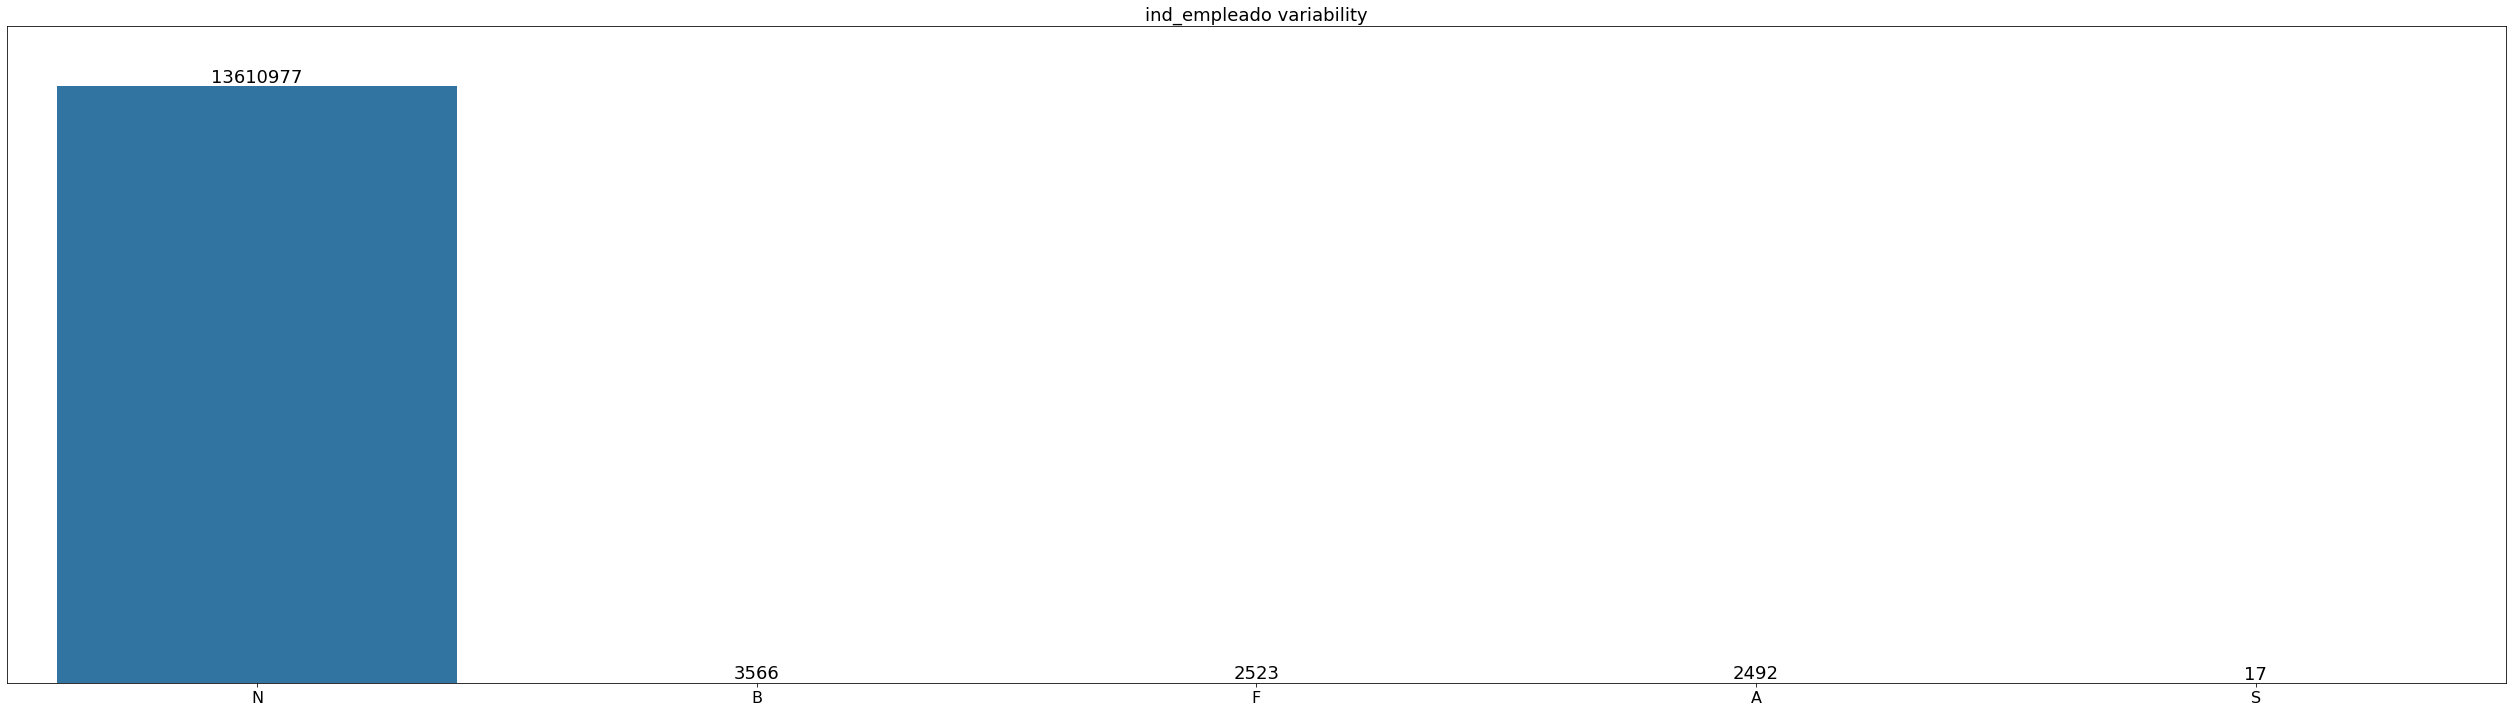

###################### sexo ######################


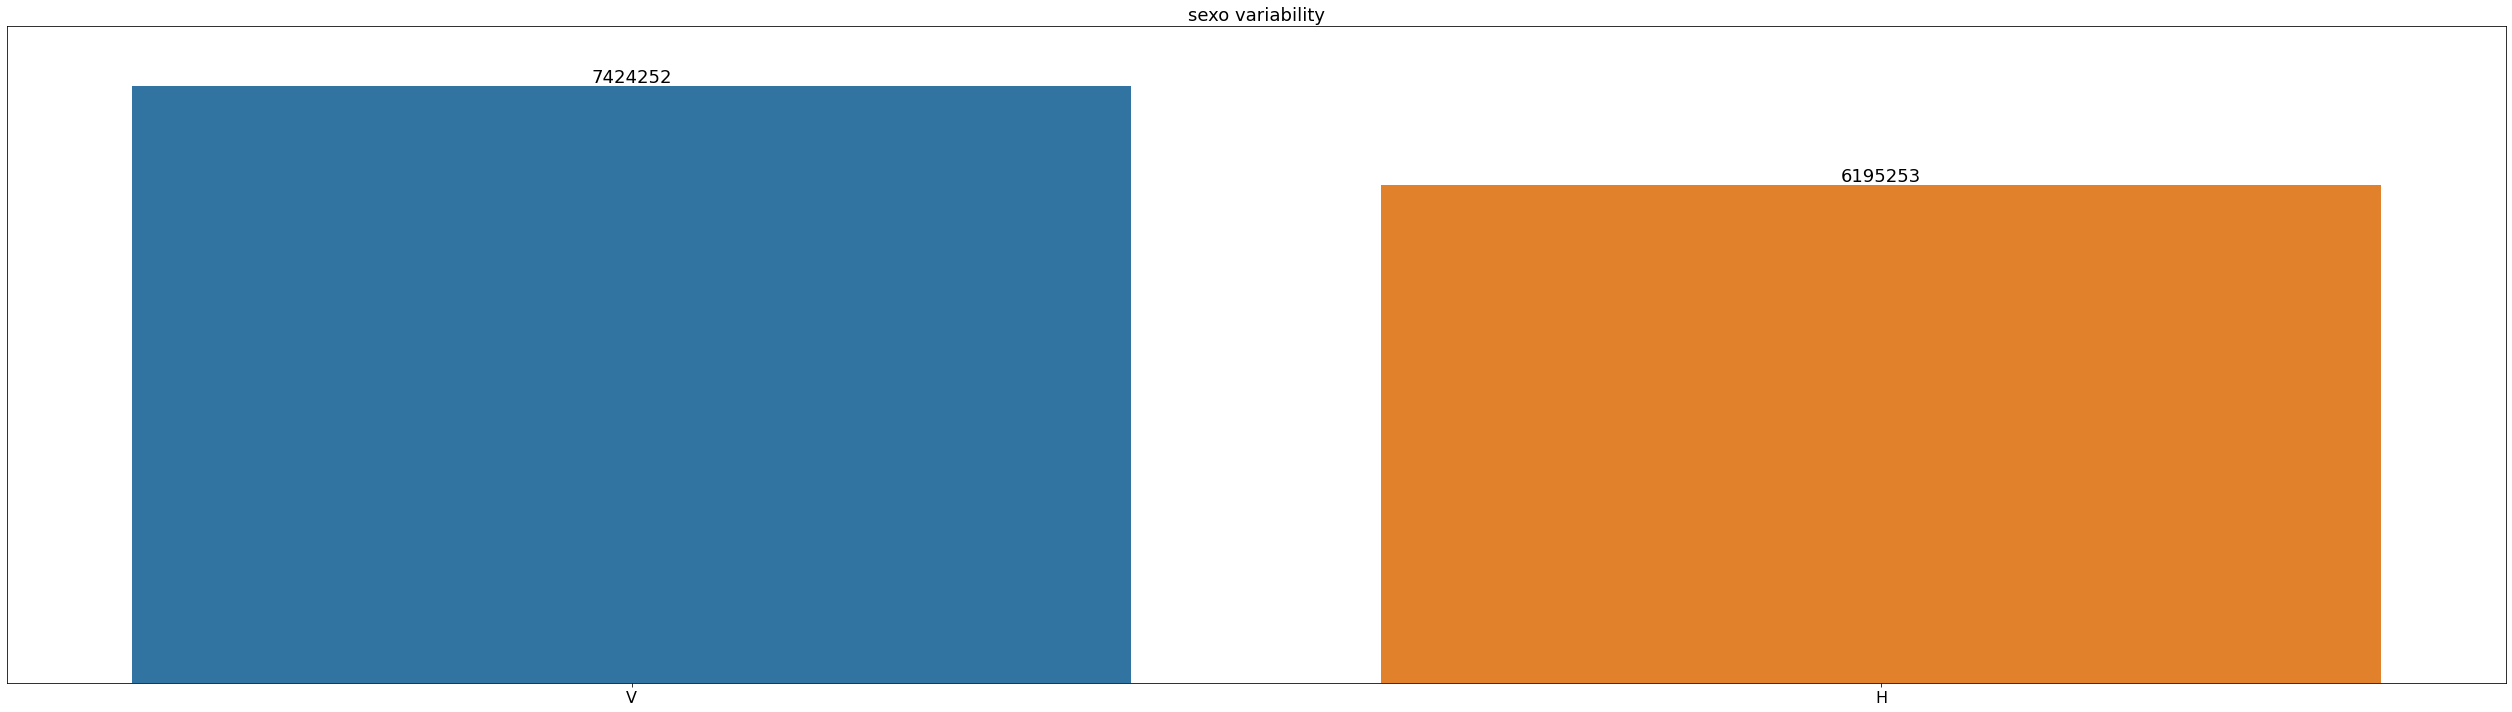

###################### age #######################


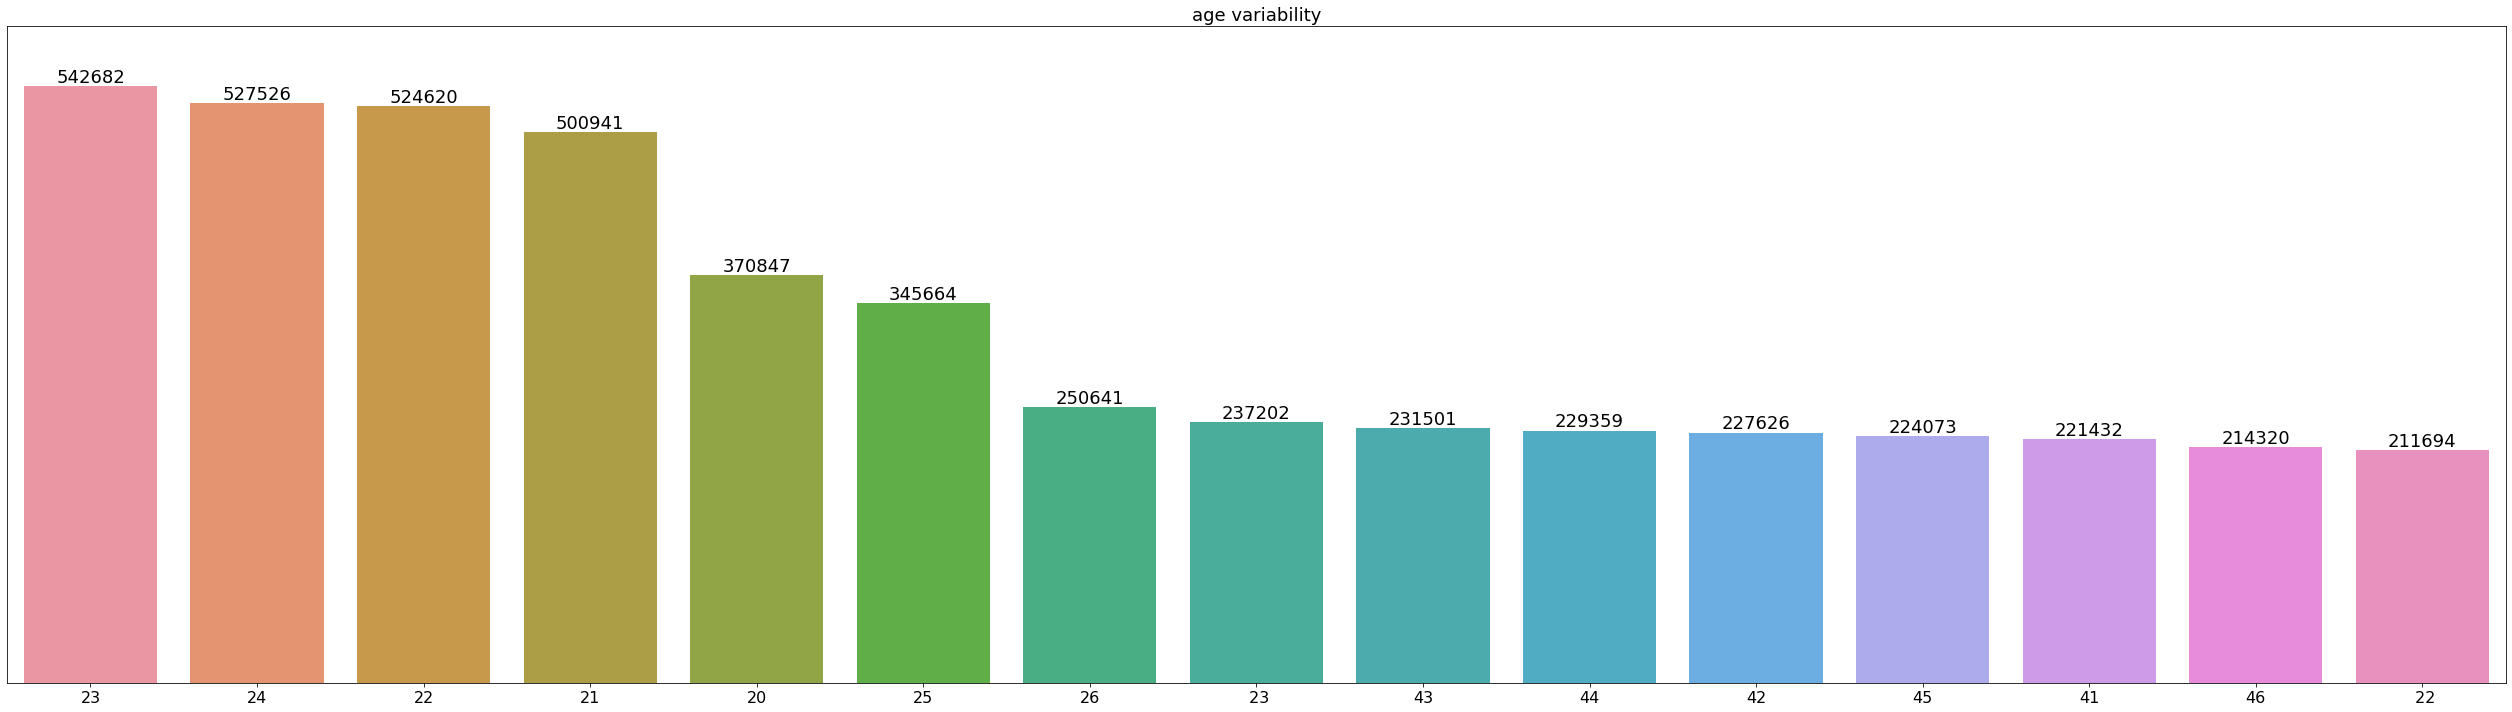

################### ind_nuevo ####################


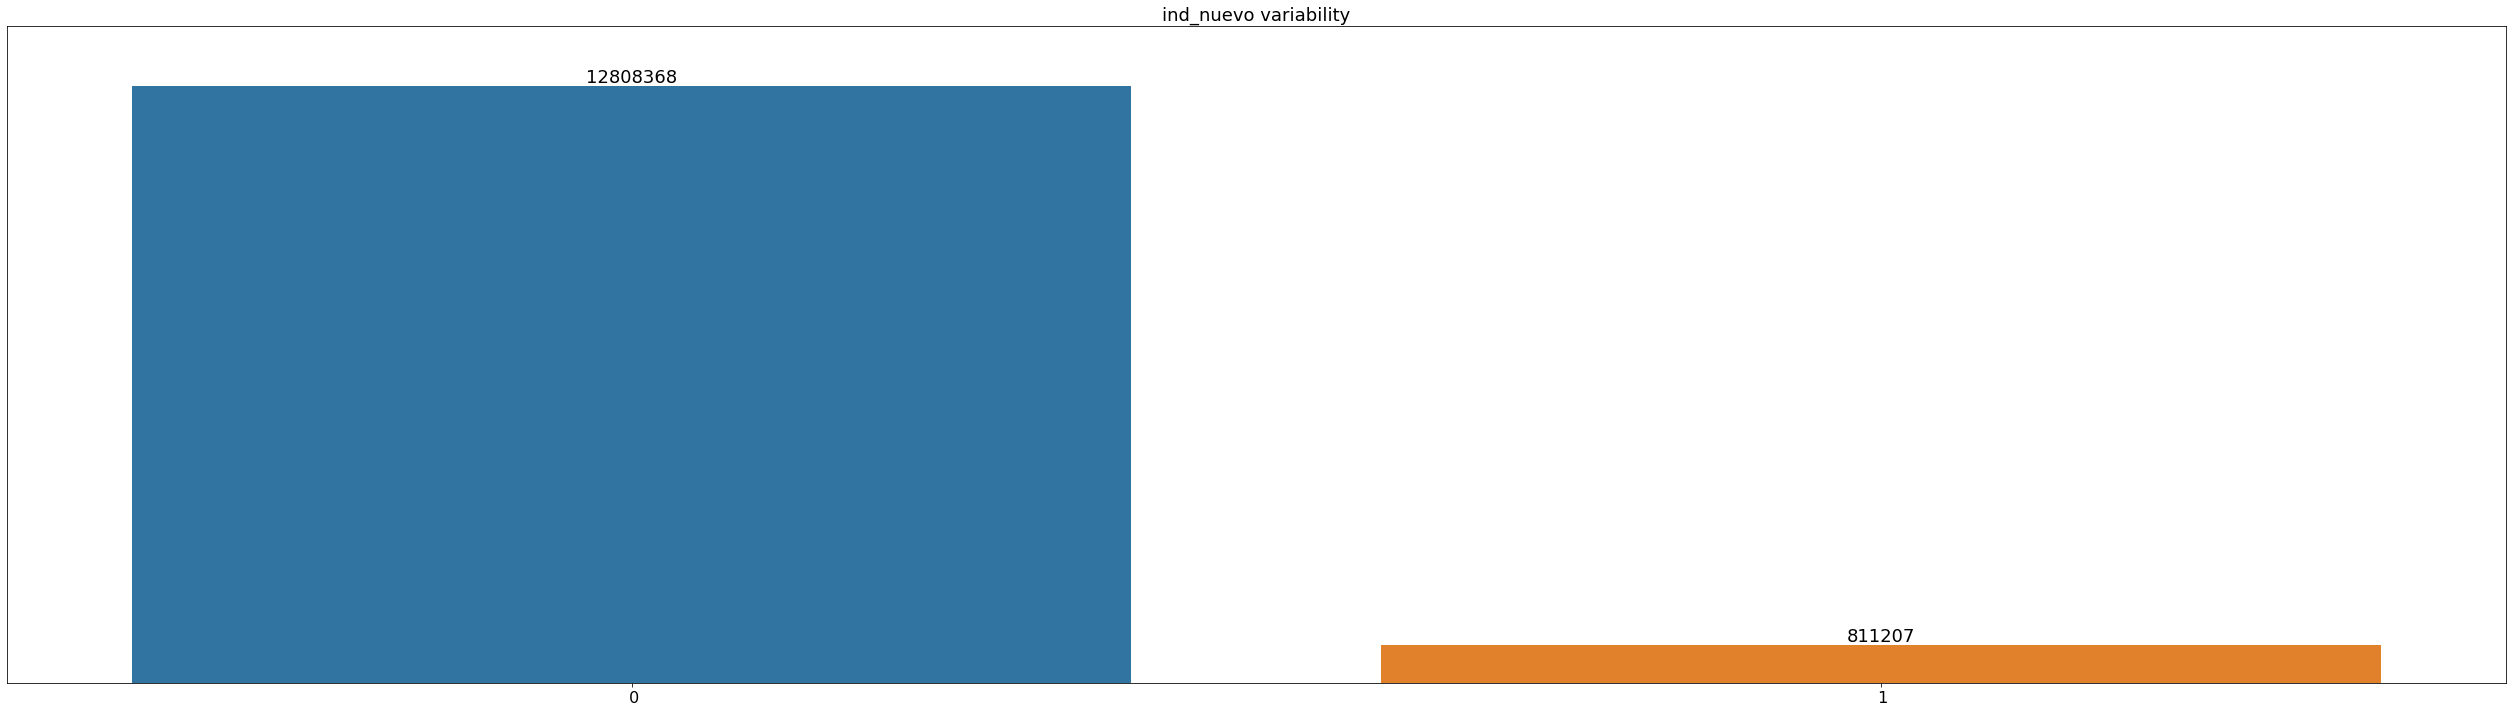

################### antiguedad ###################


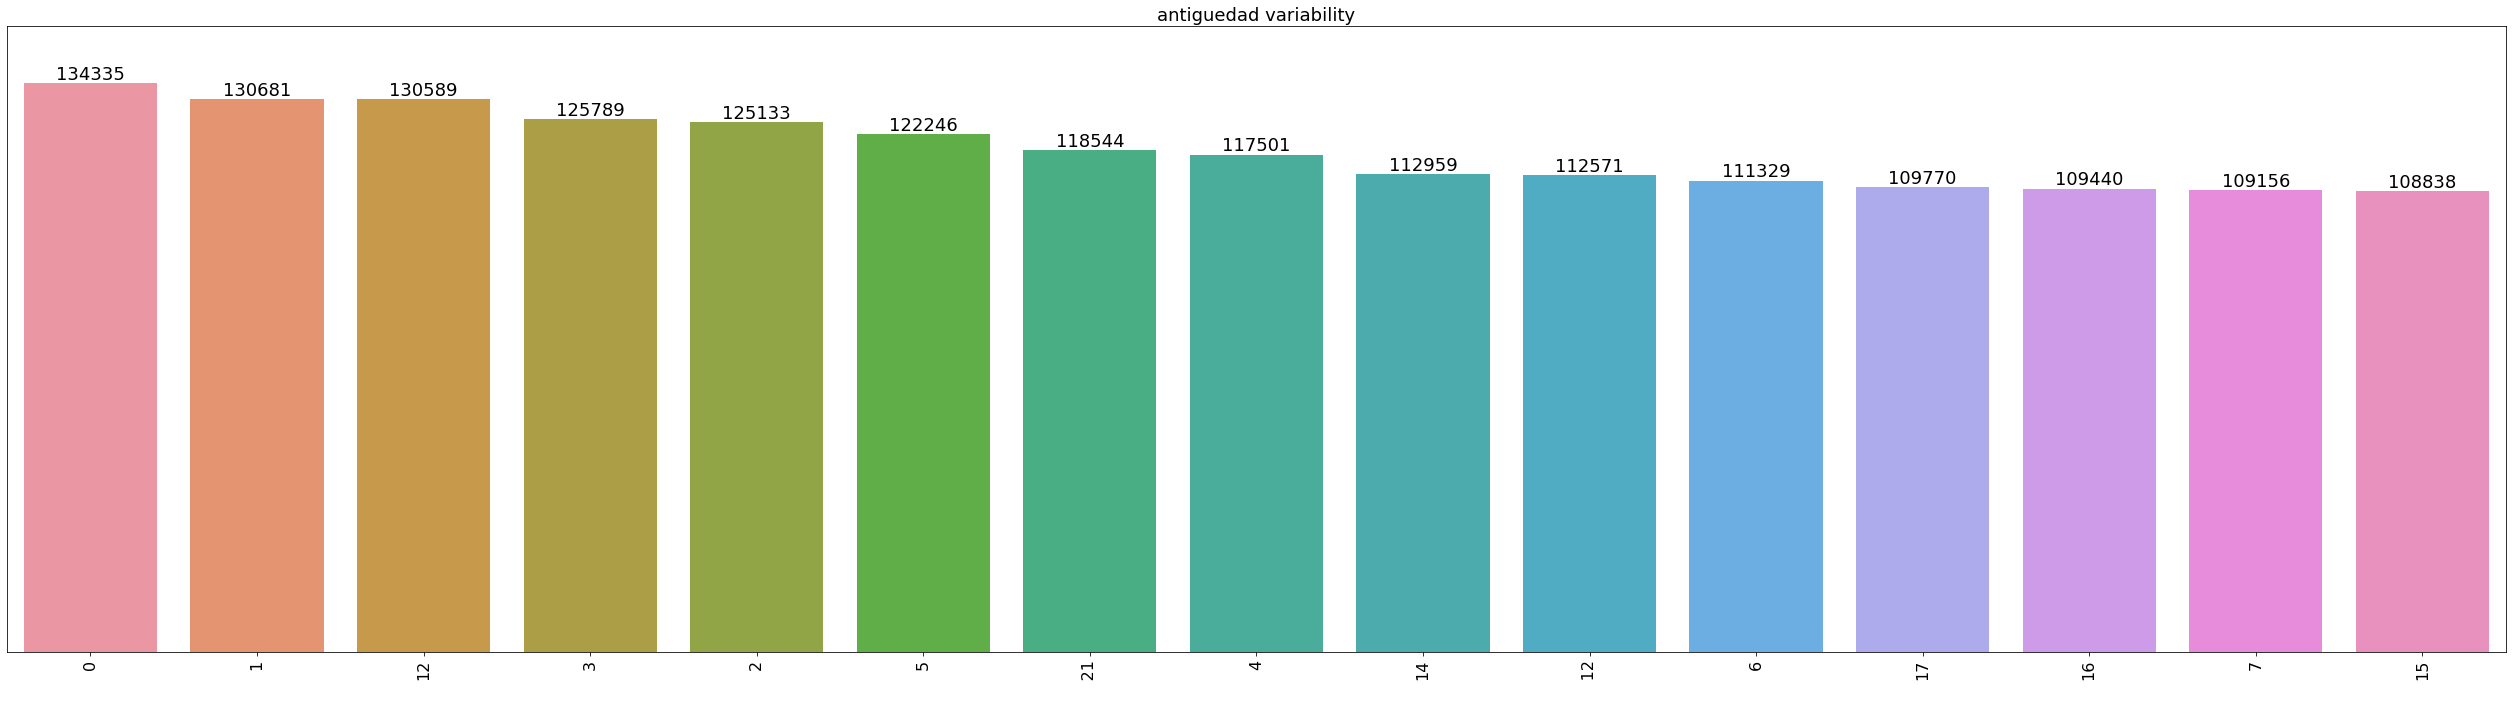

##################### indrel #####################


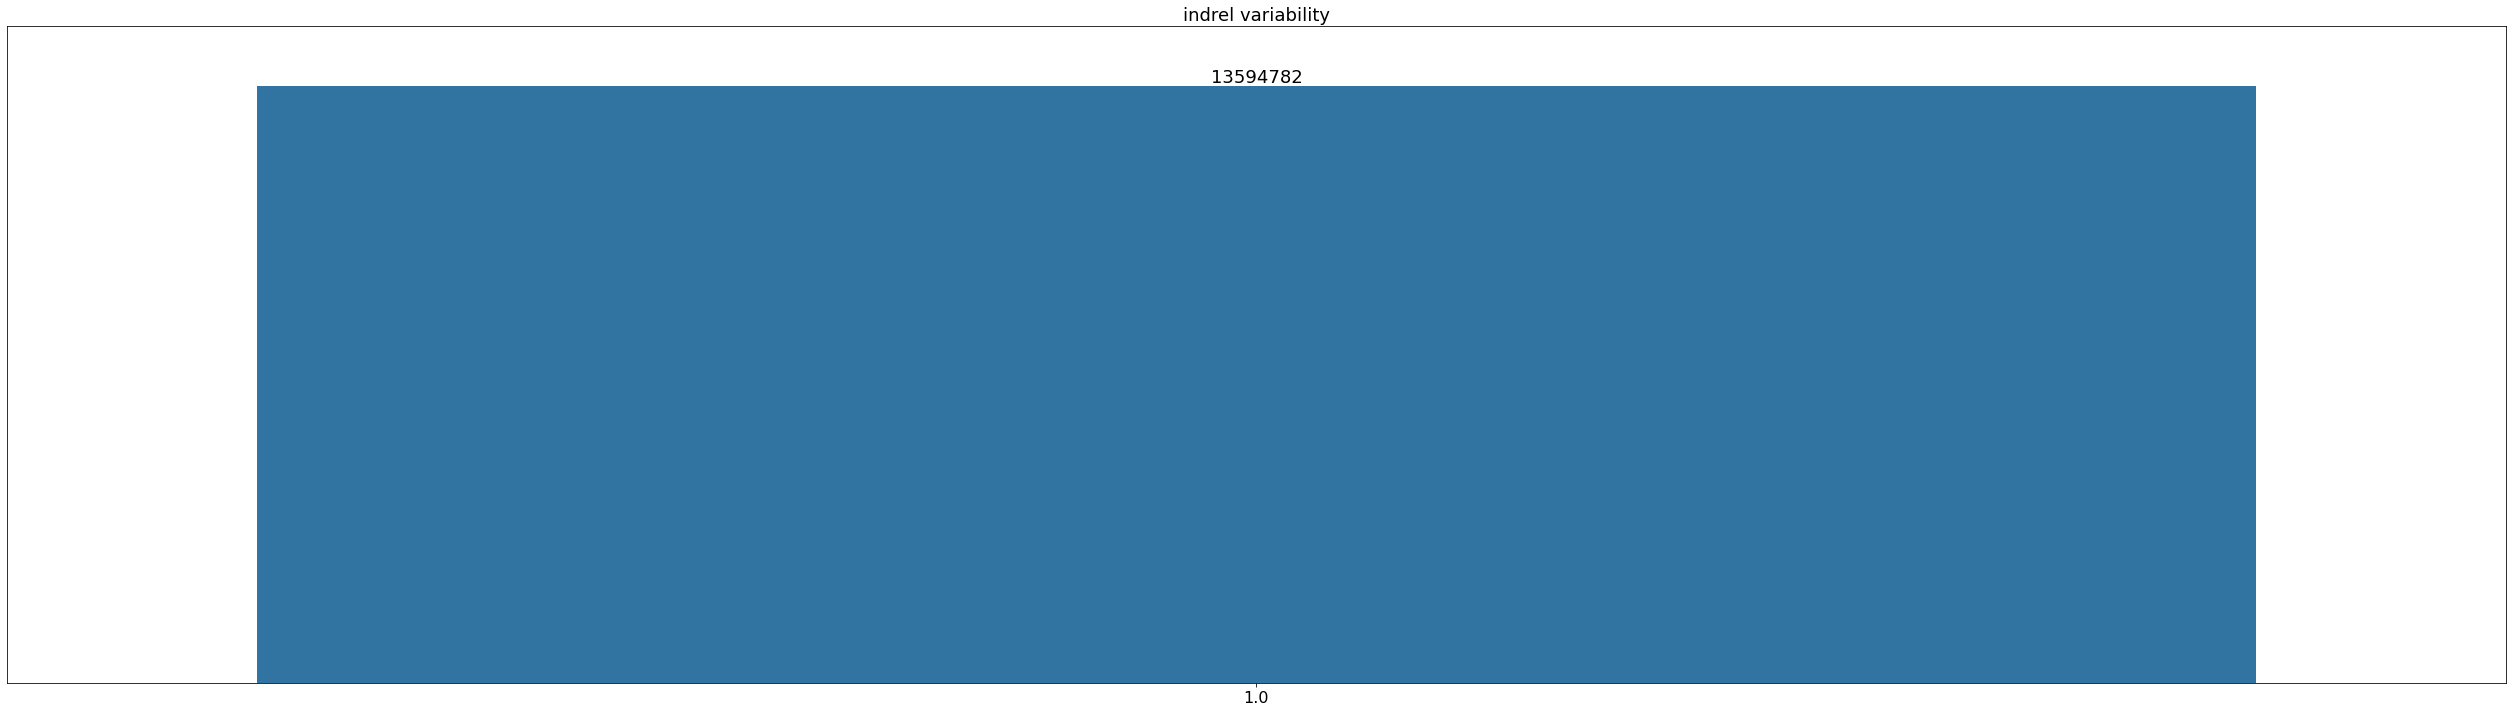

################# ult_fec_cli_1t #################


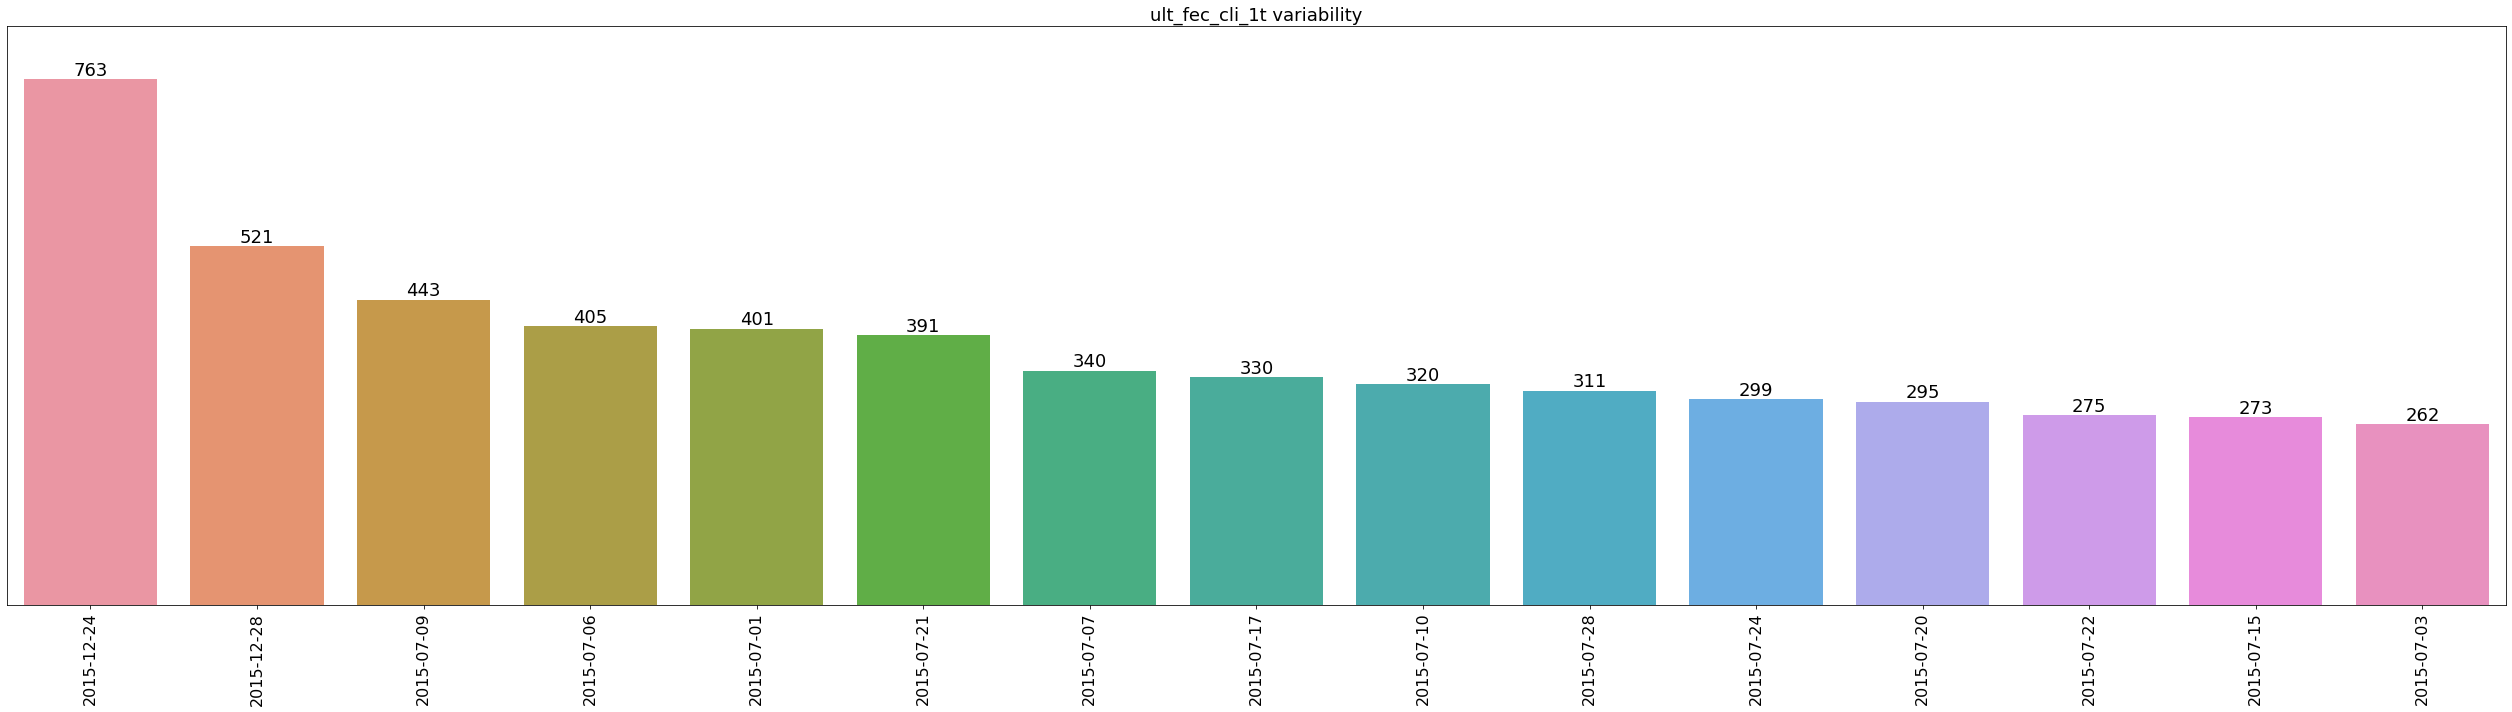

################## indrel_1mes ###################


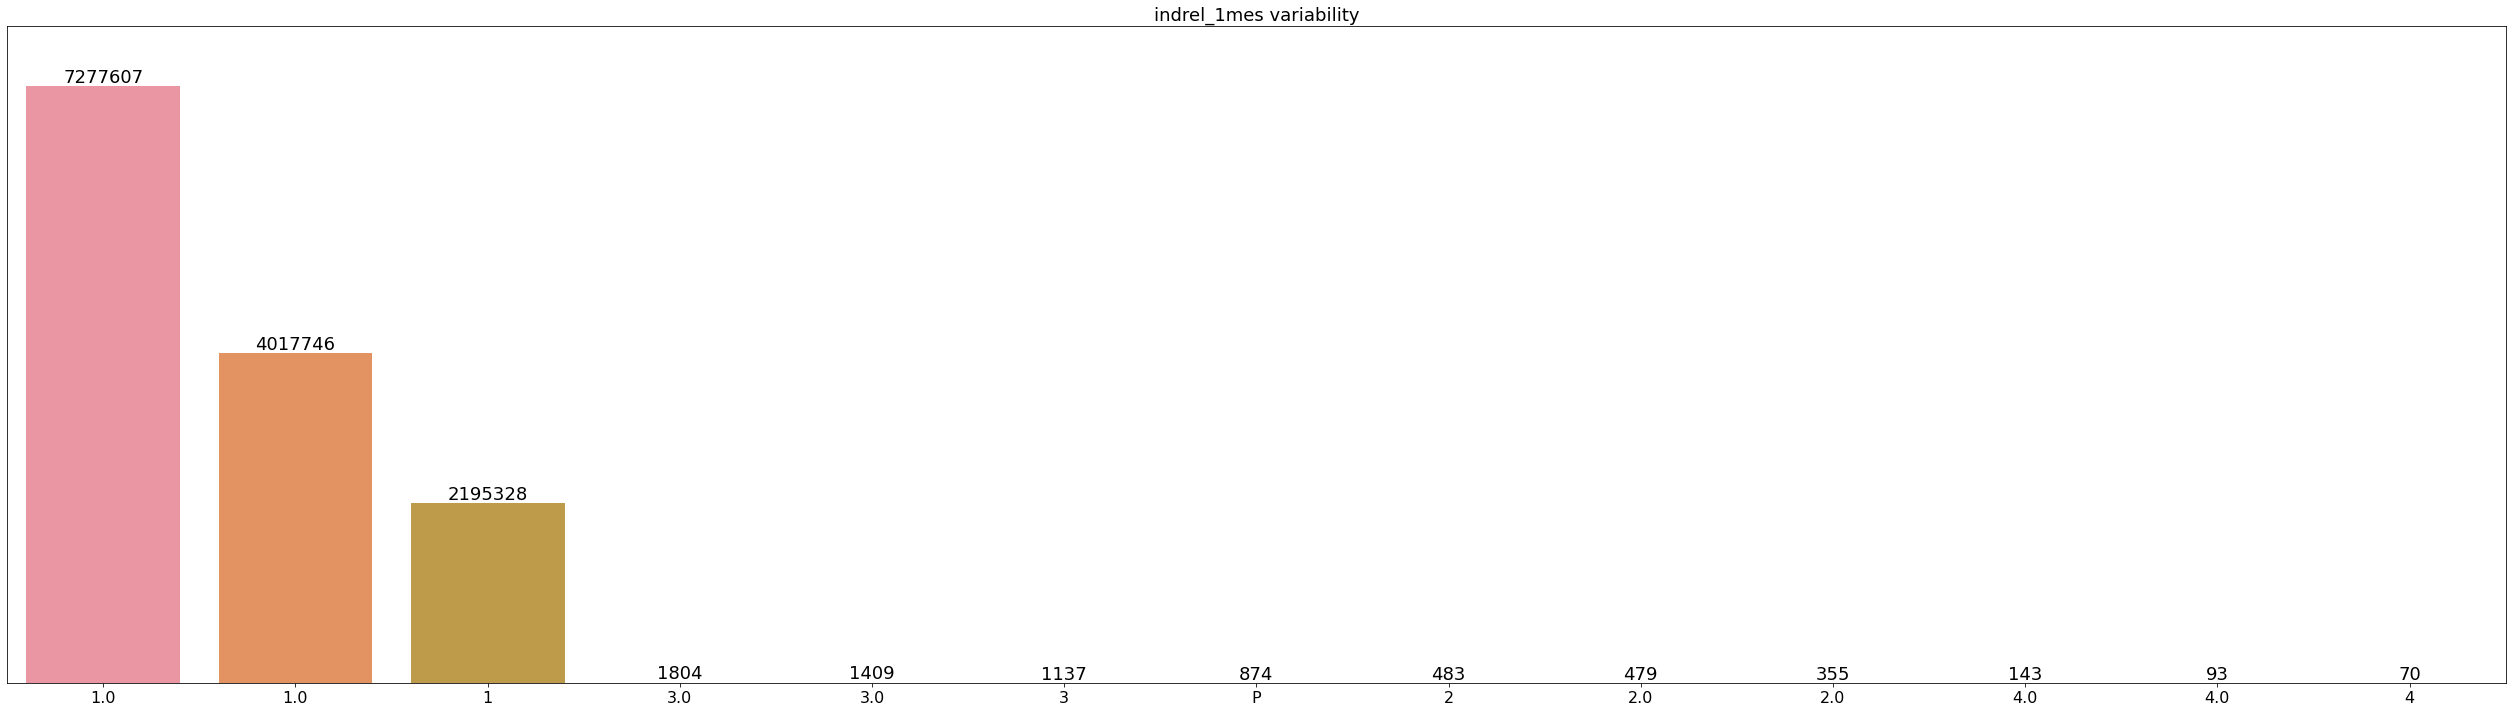

################## tiprel_1mes ###################


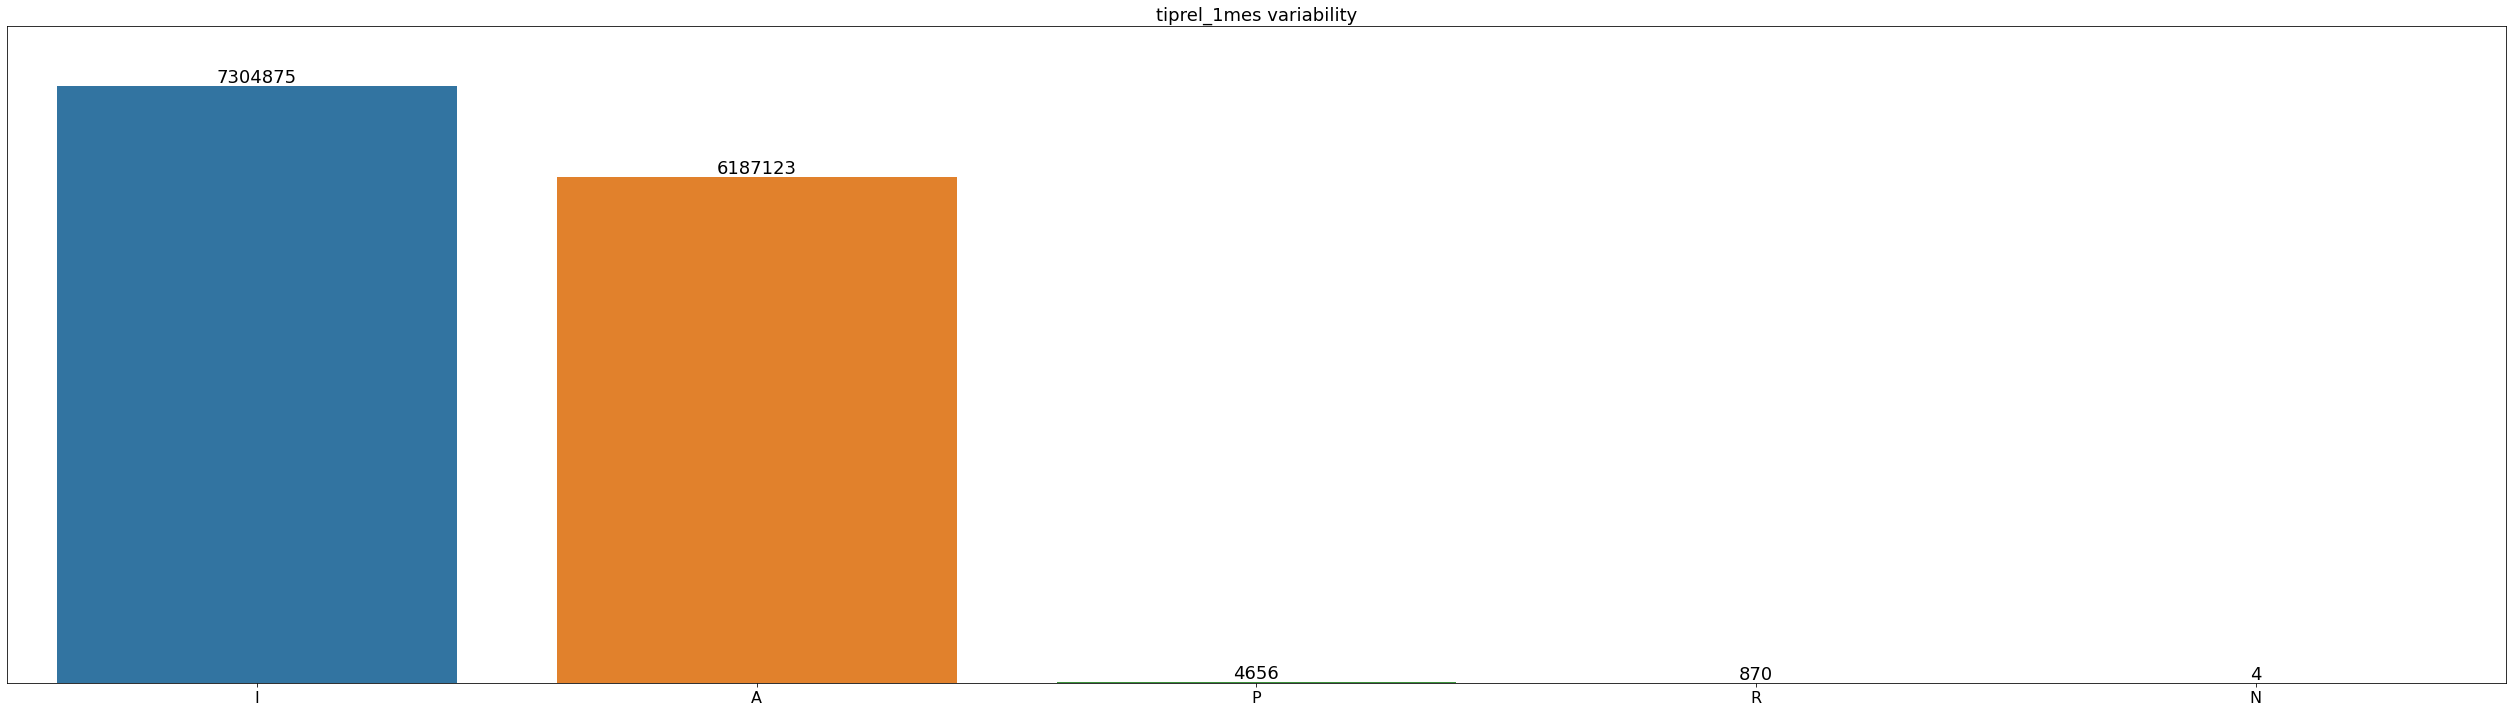

#################### indresi #####################


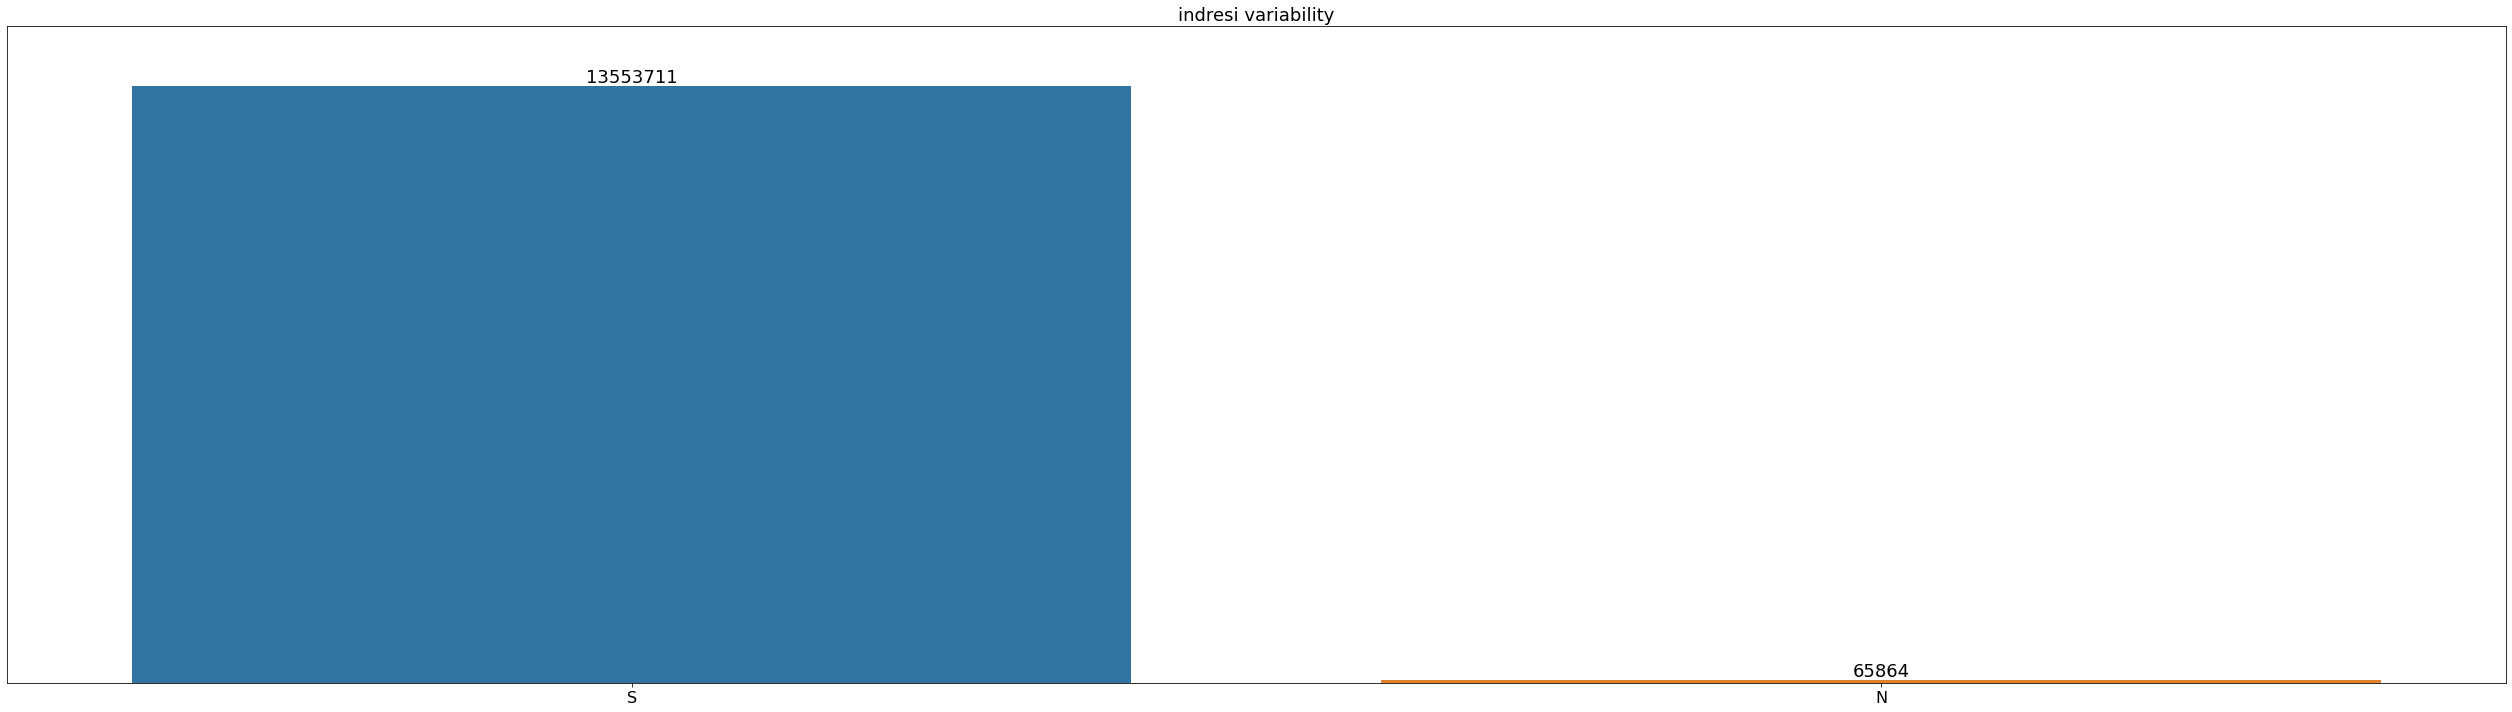

##################### indext #####################


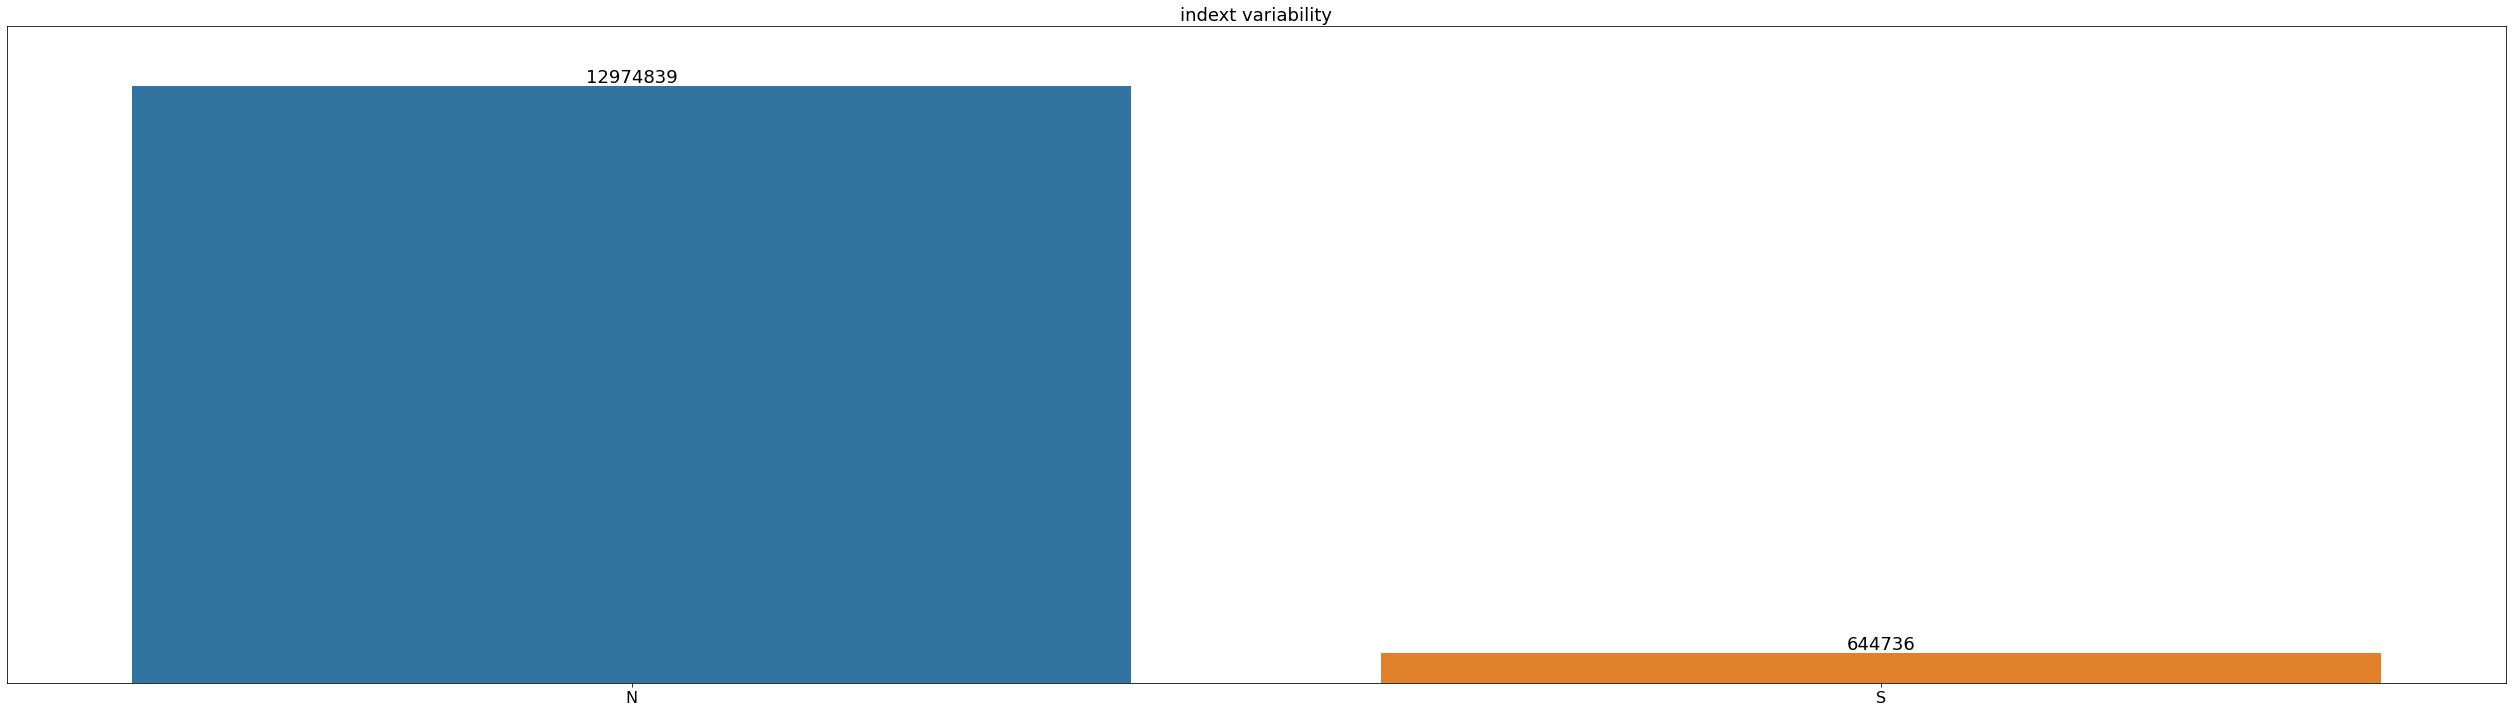

#################### conyuemp ####################


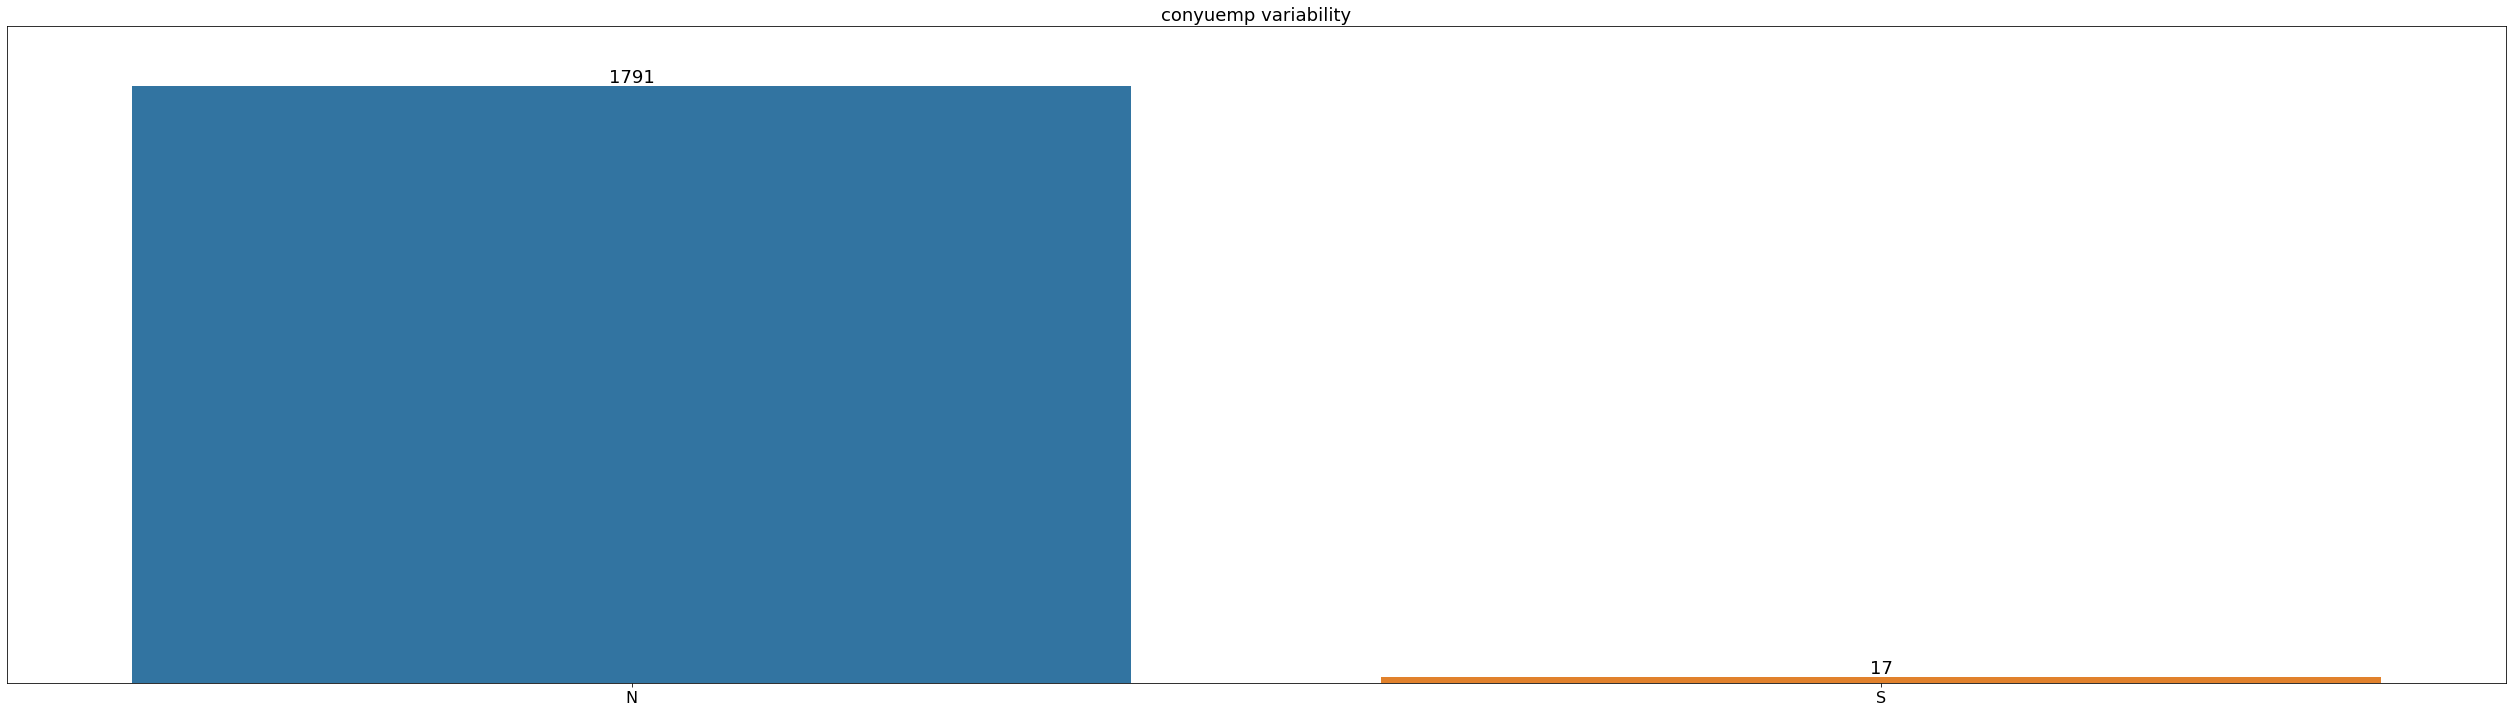

################# canal_entrada ##################


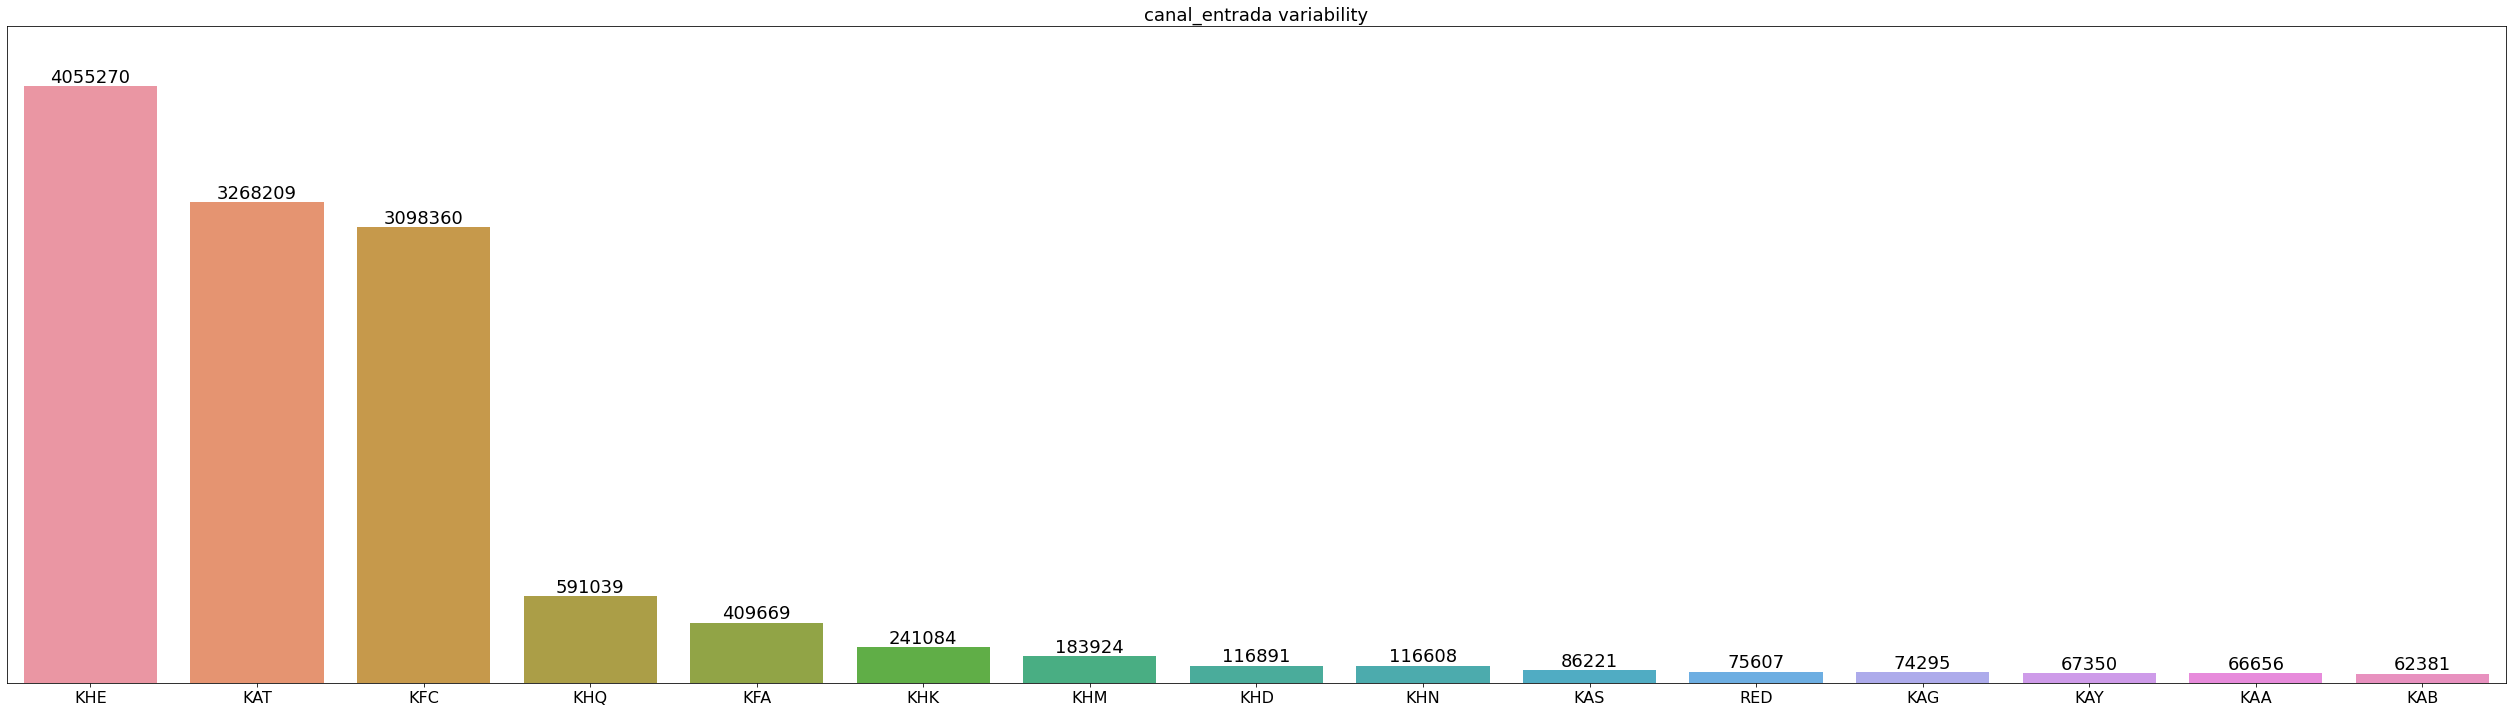

#################### indfall #####################


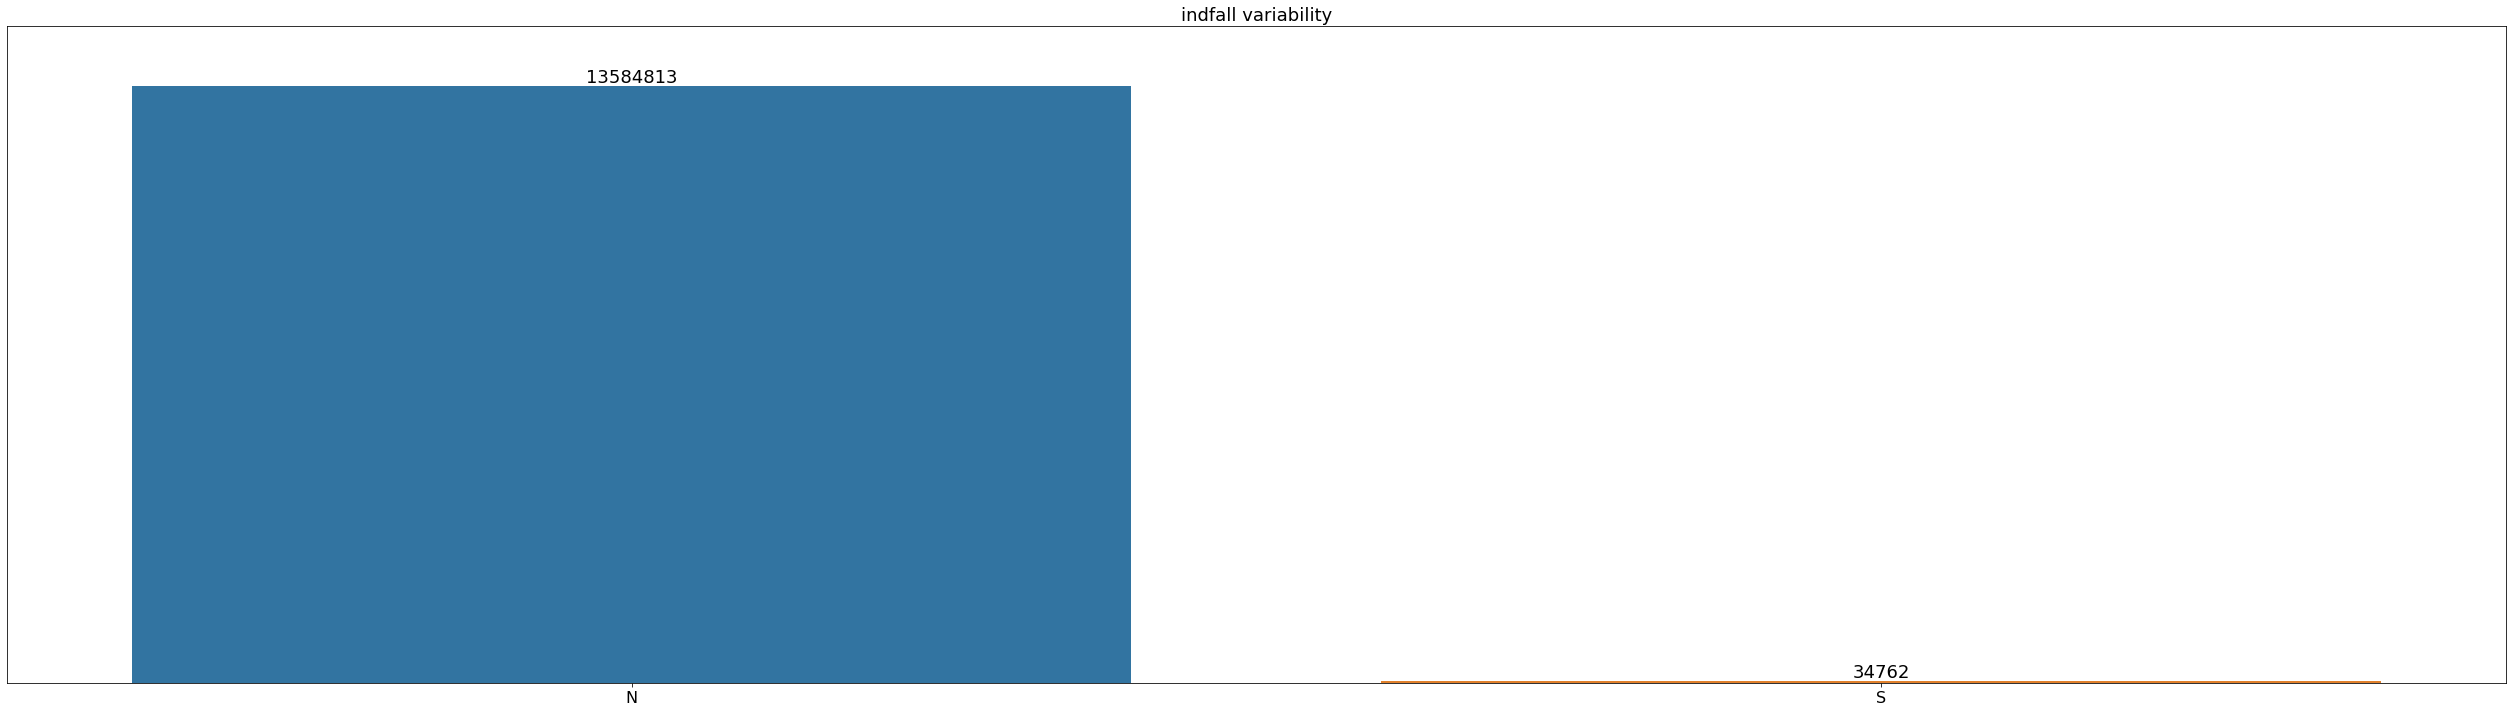

#################### tipodom #####################


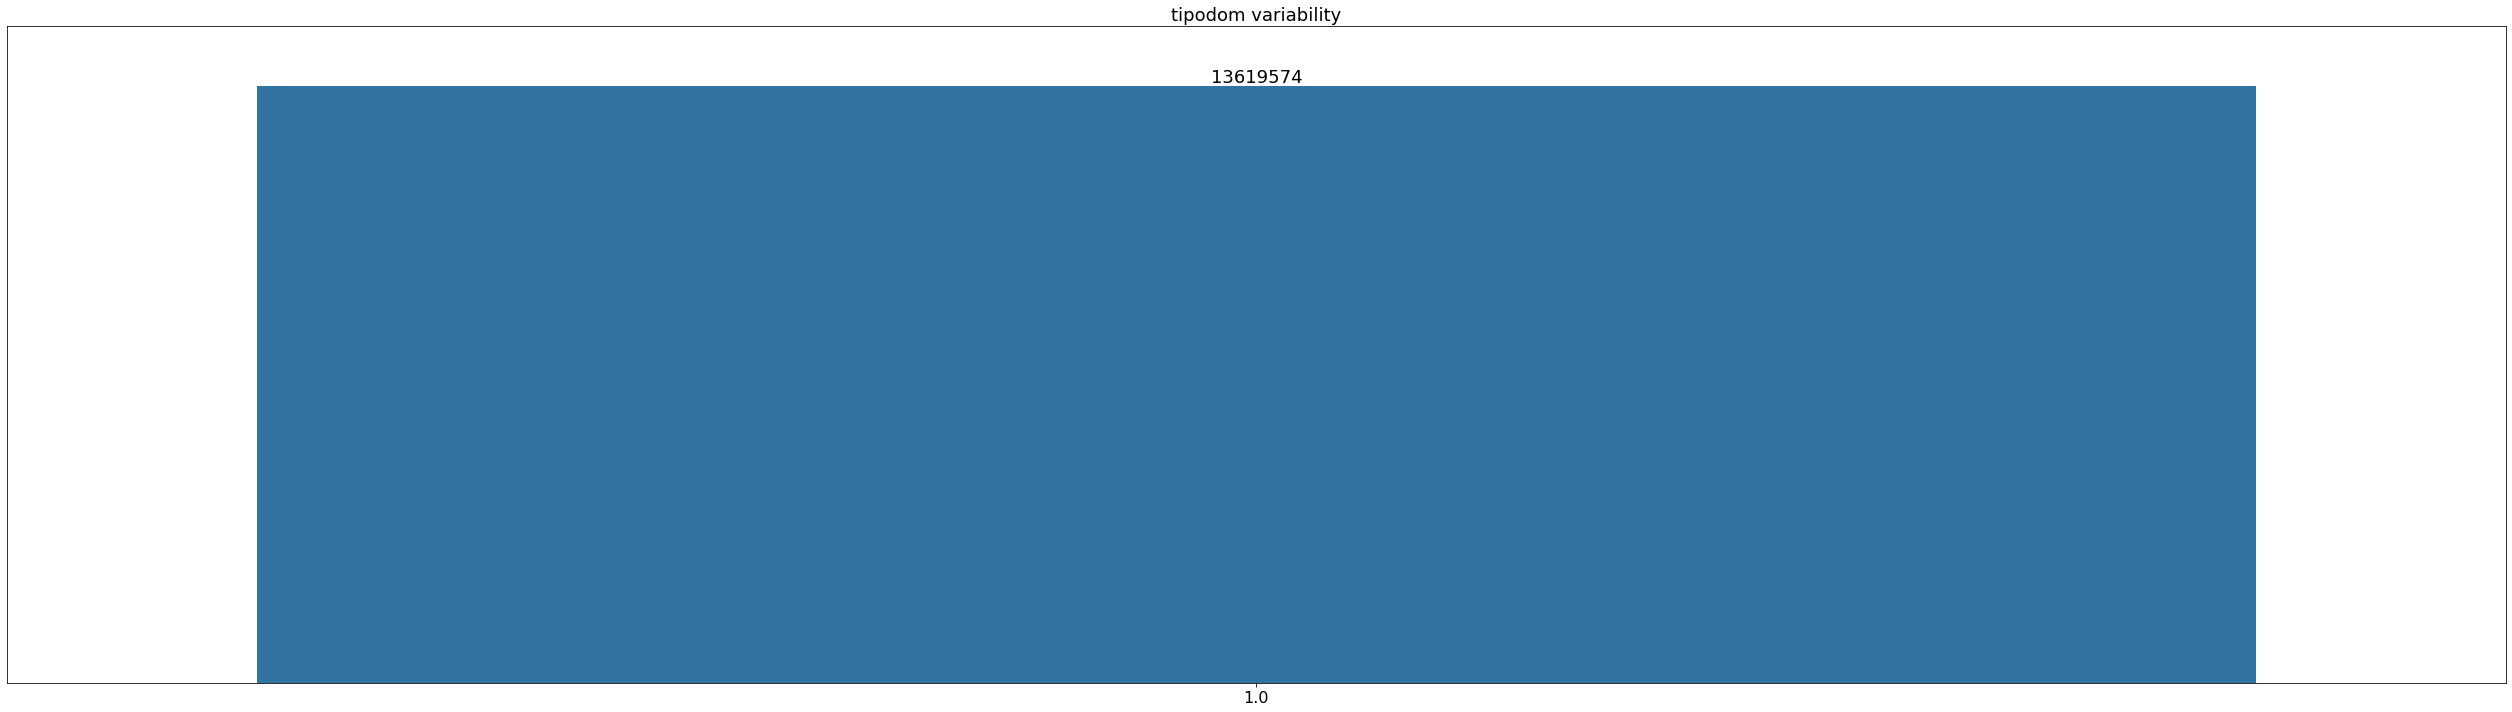

#################### cod_prov ####################


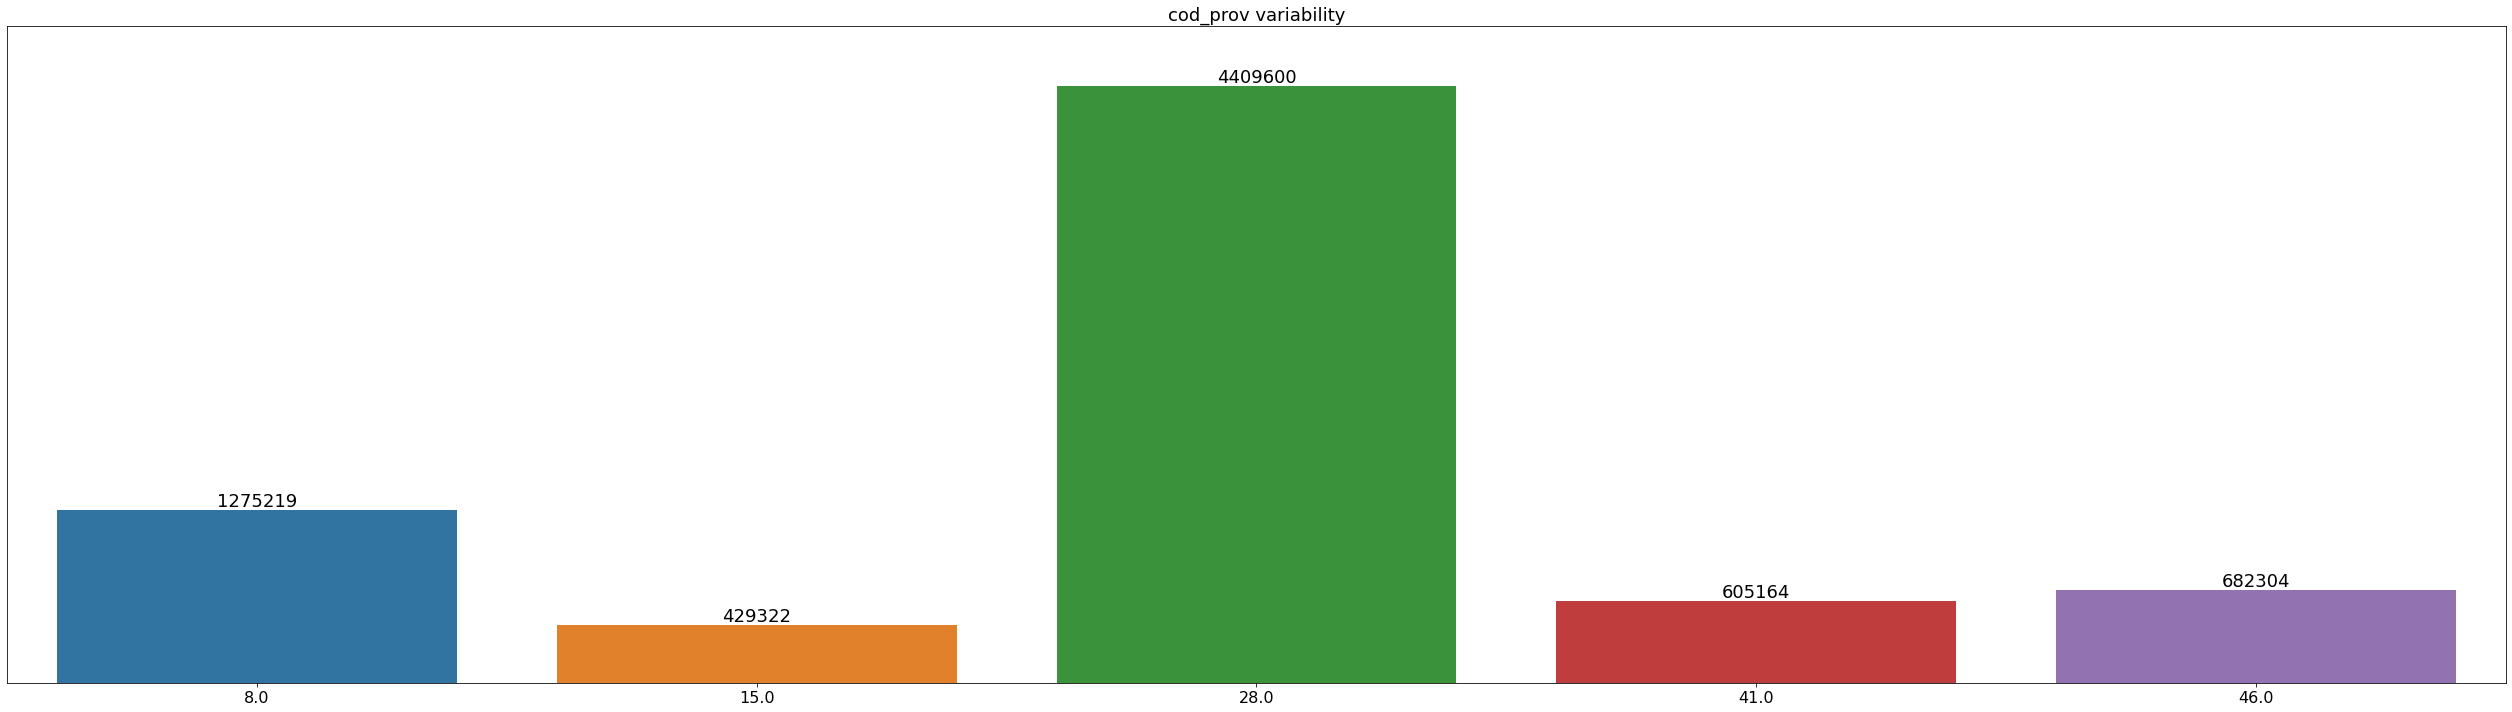

#################### nomprov #####################


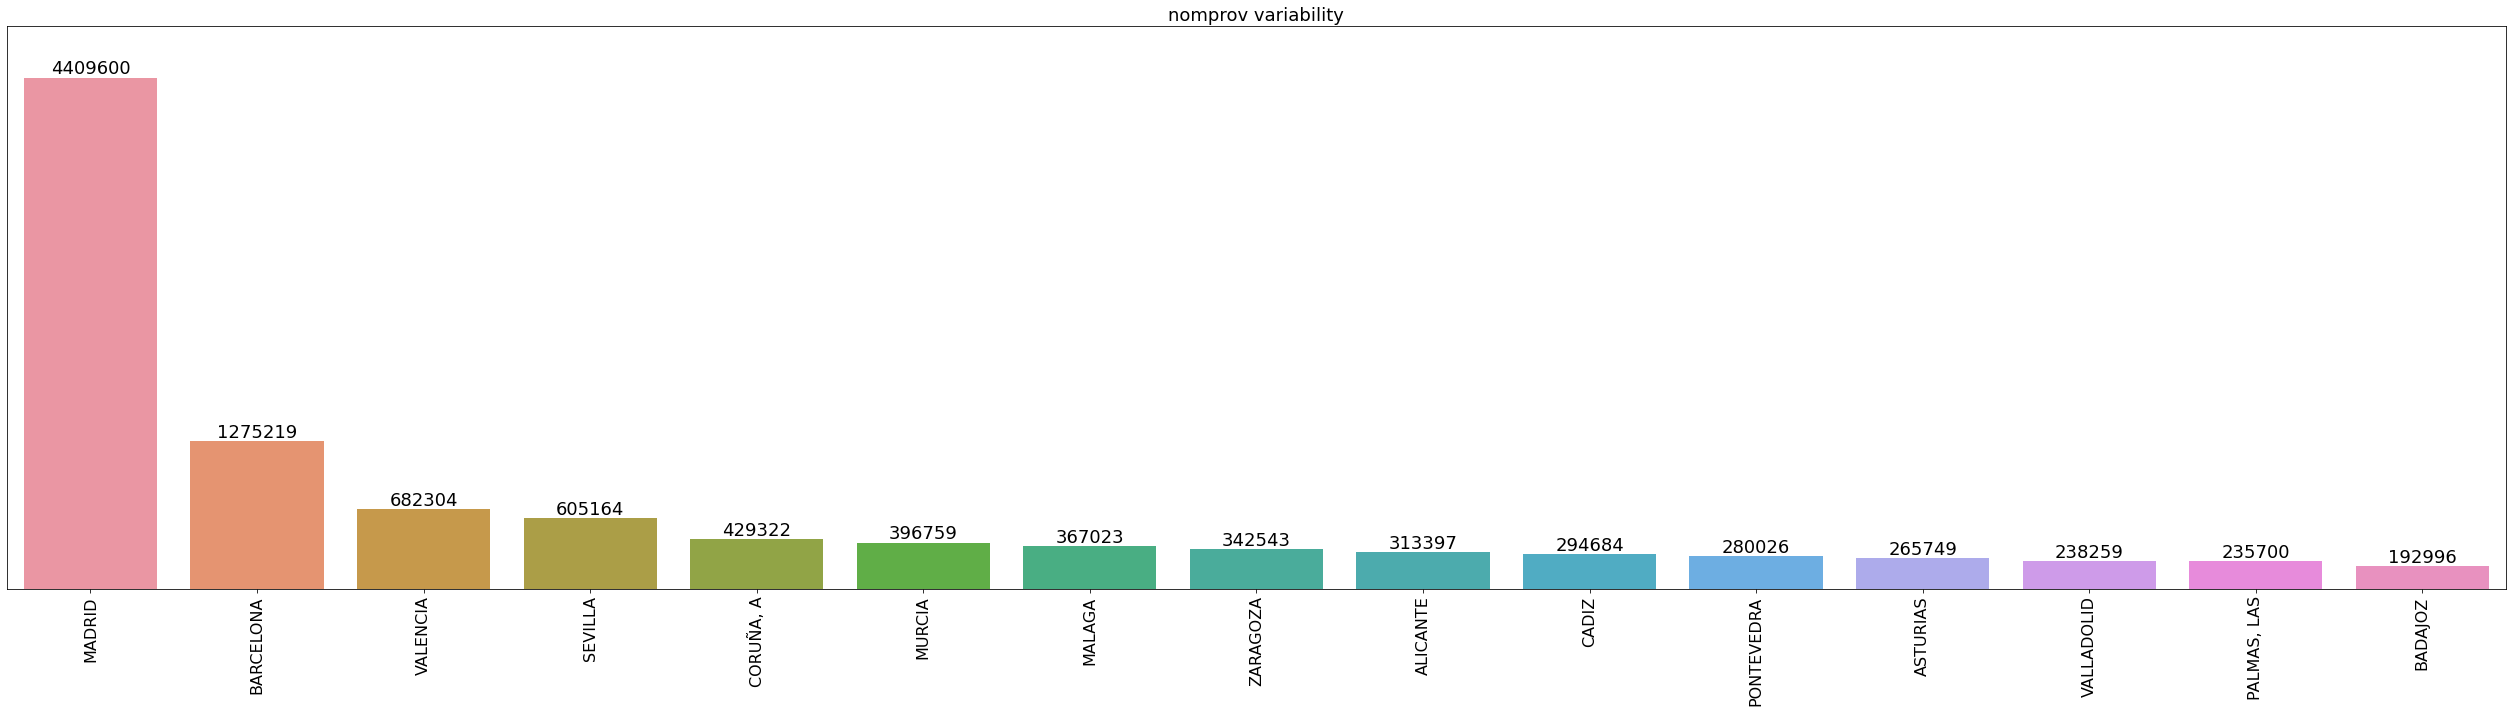

############# ind_actividad_cliente ##############


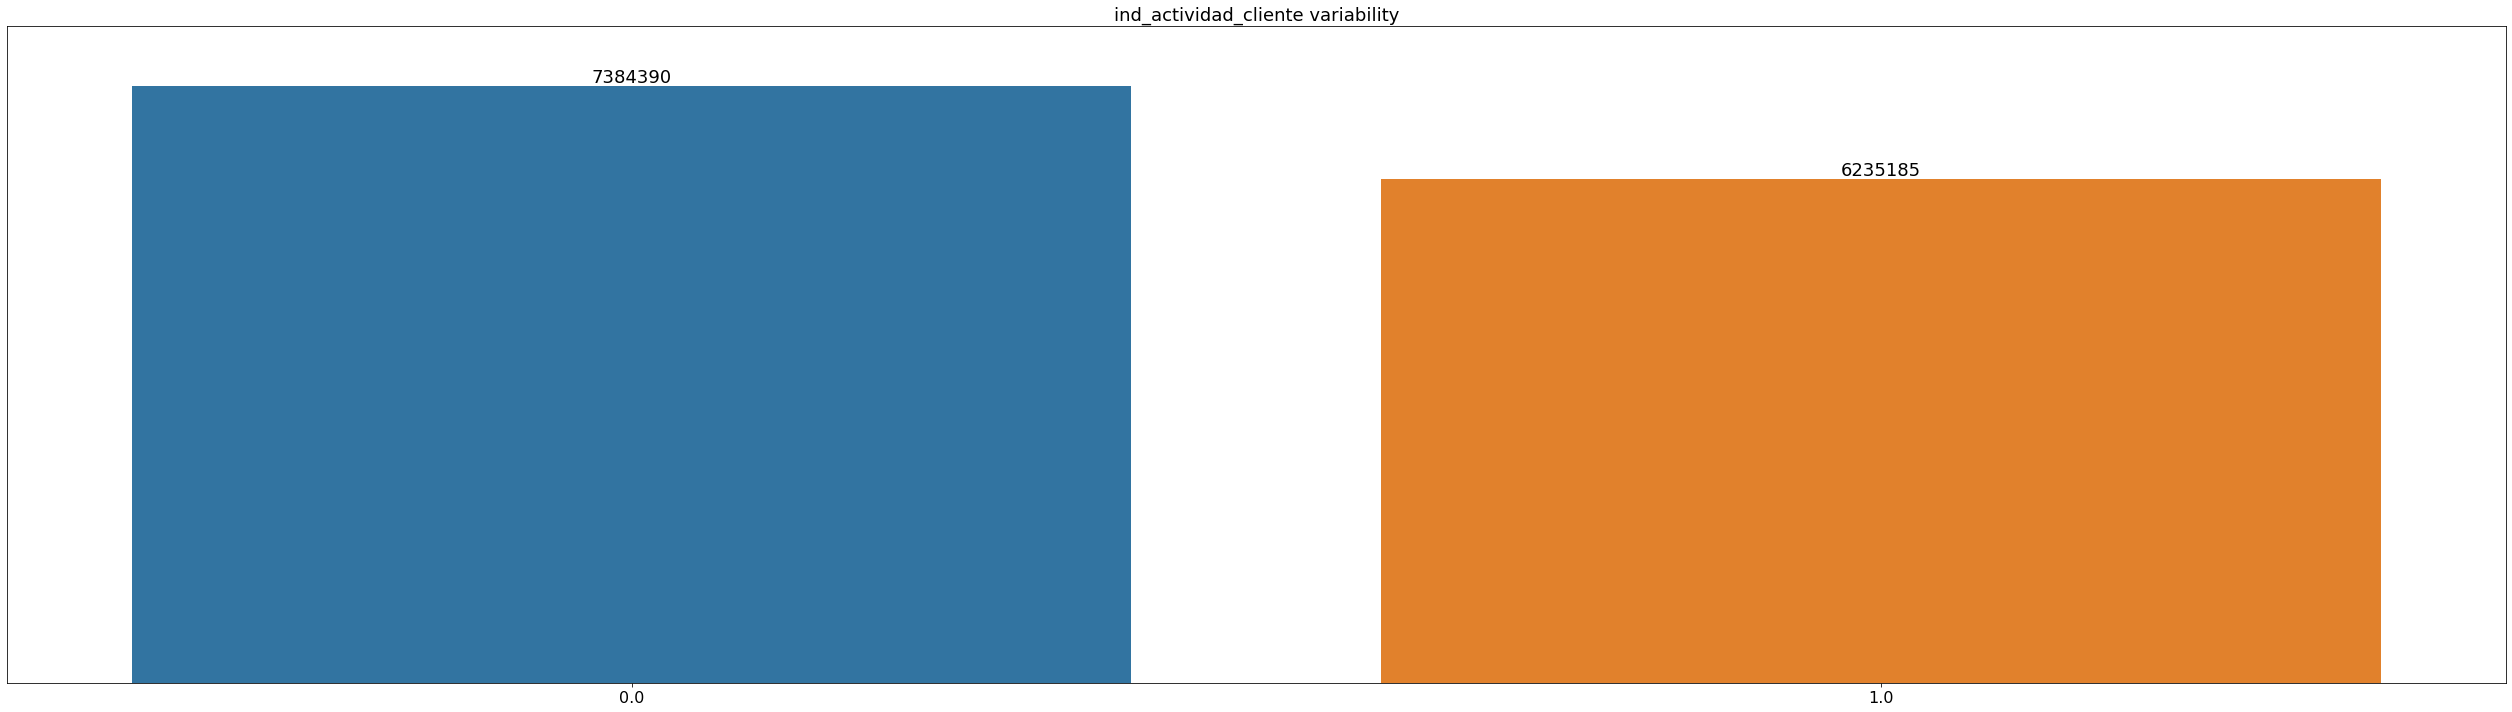

#################### segmento ####################


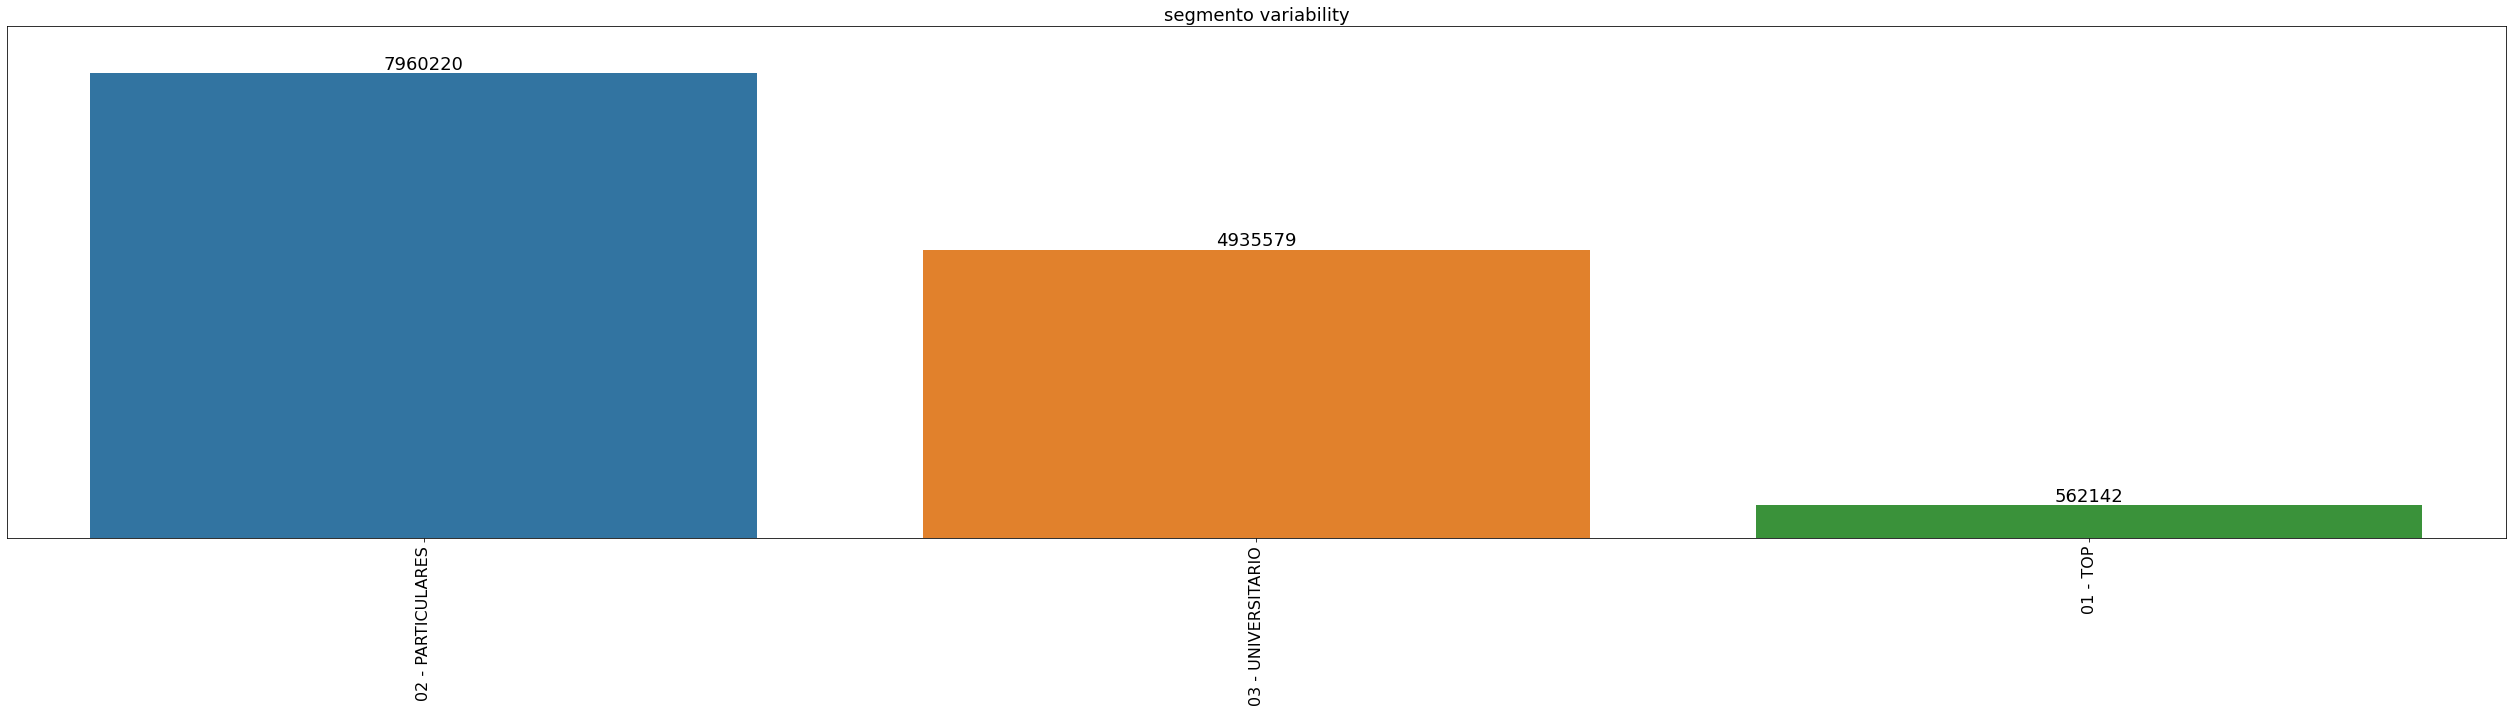

############### ind_ahor_fin_ult1 ################


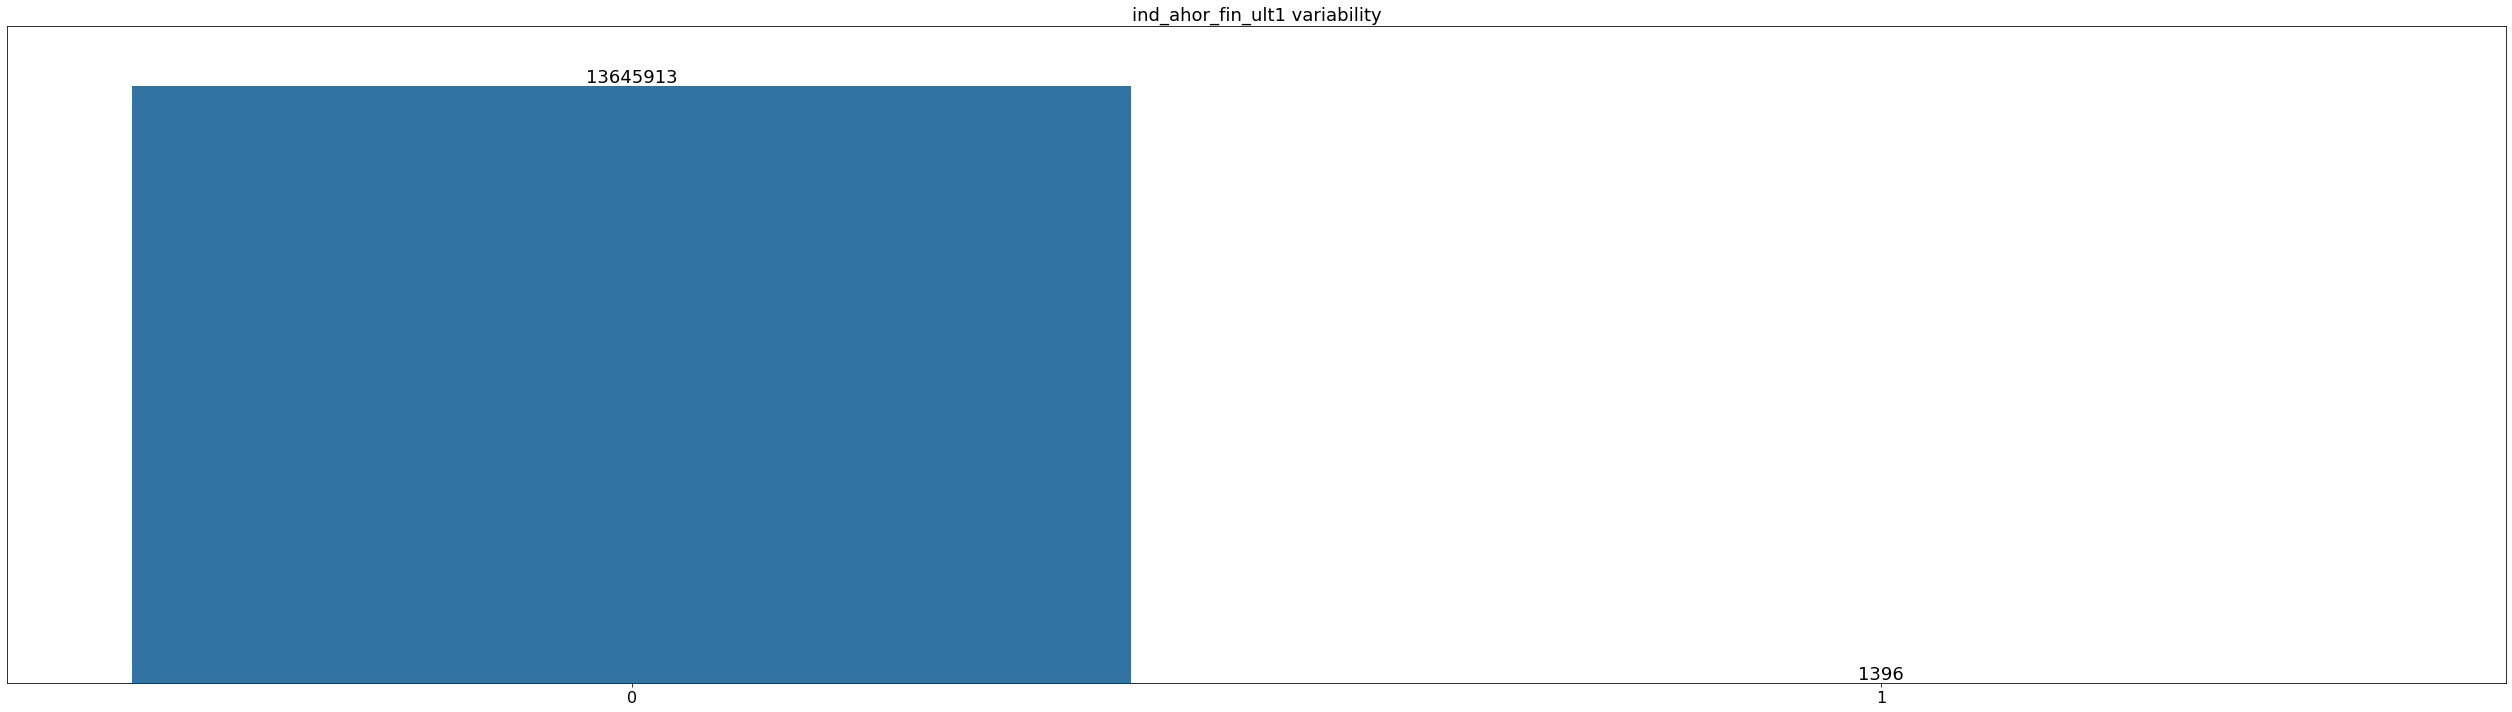

############### ind_aval_fin_ult1 ################


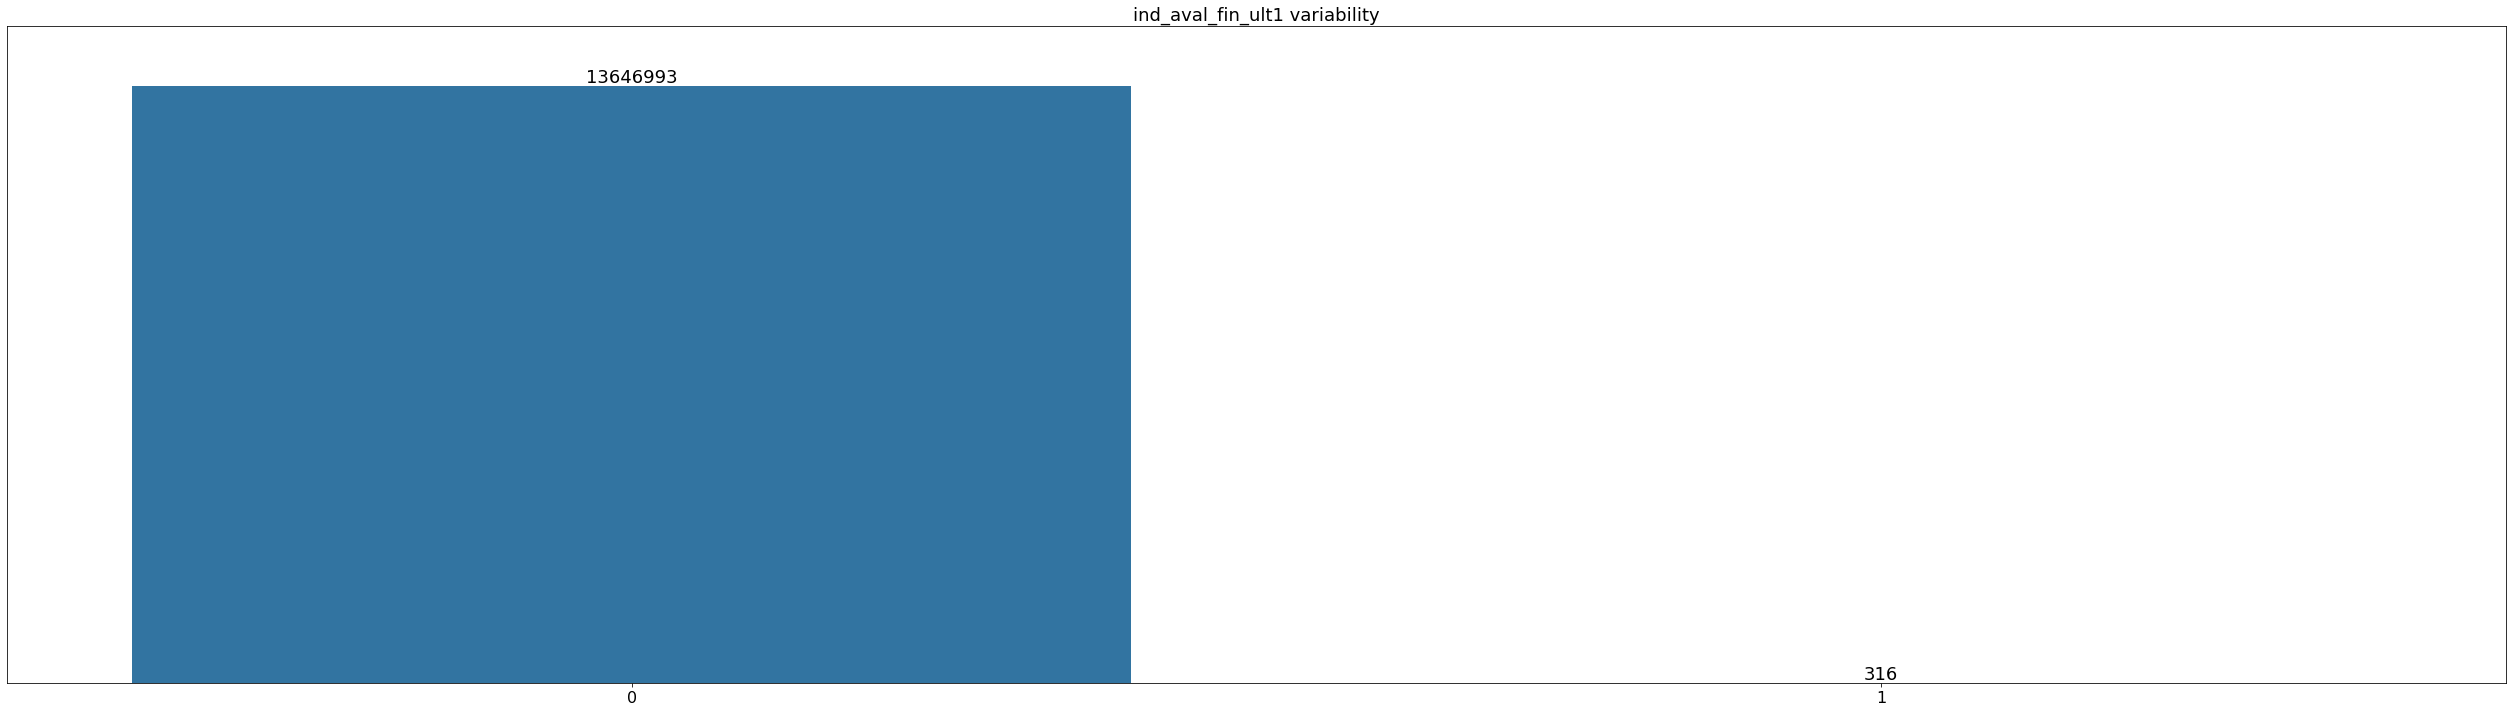

################ ind_cco_fin_ult1 ################


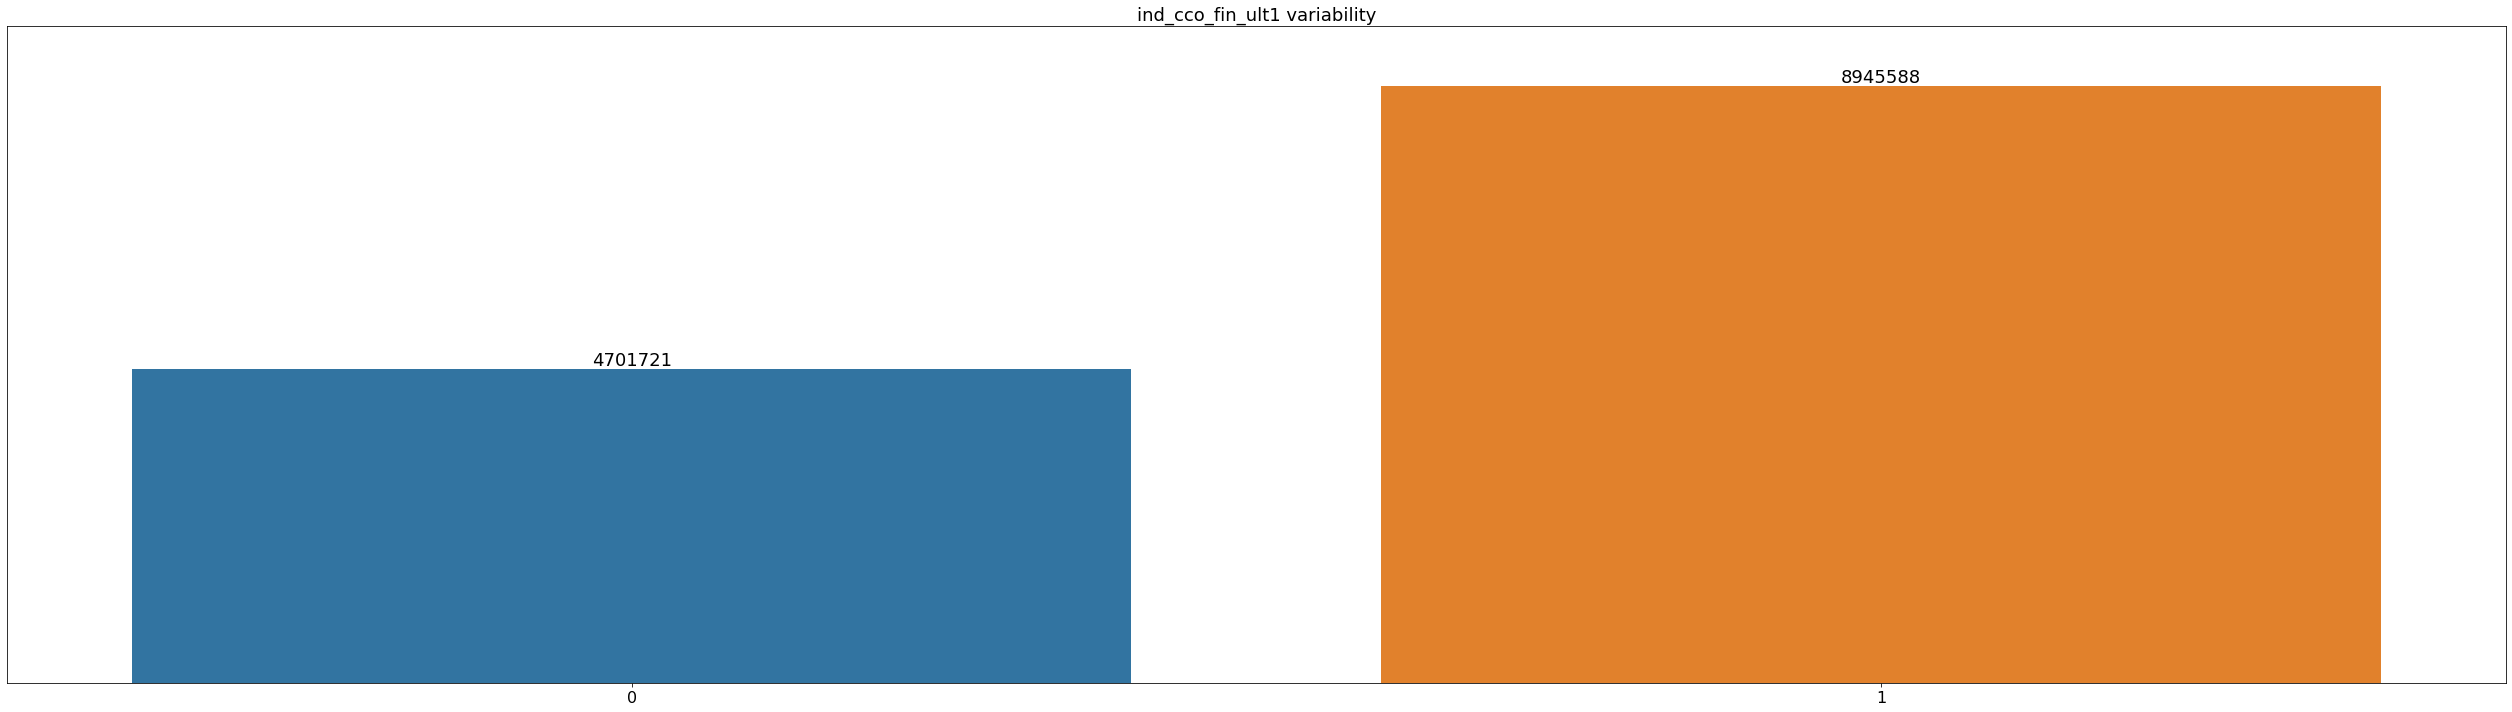

############### ind_cder_fin_ult1 ################


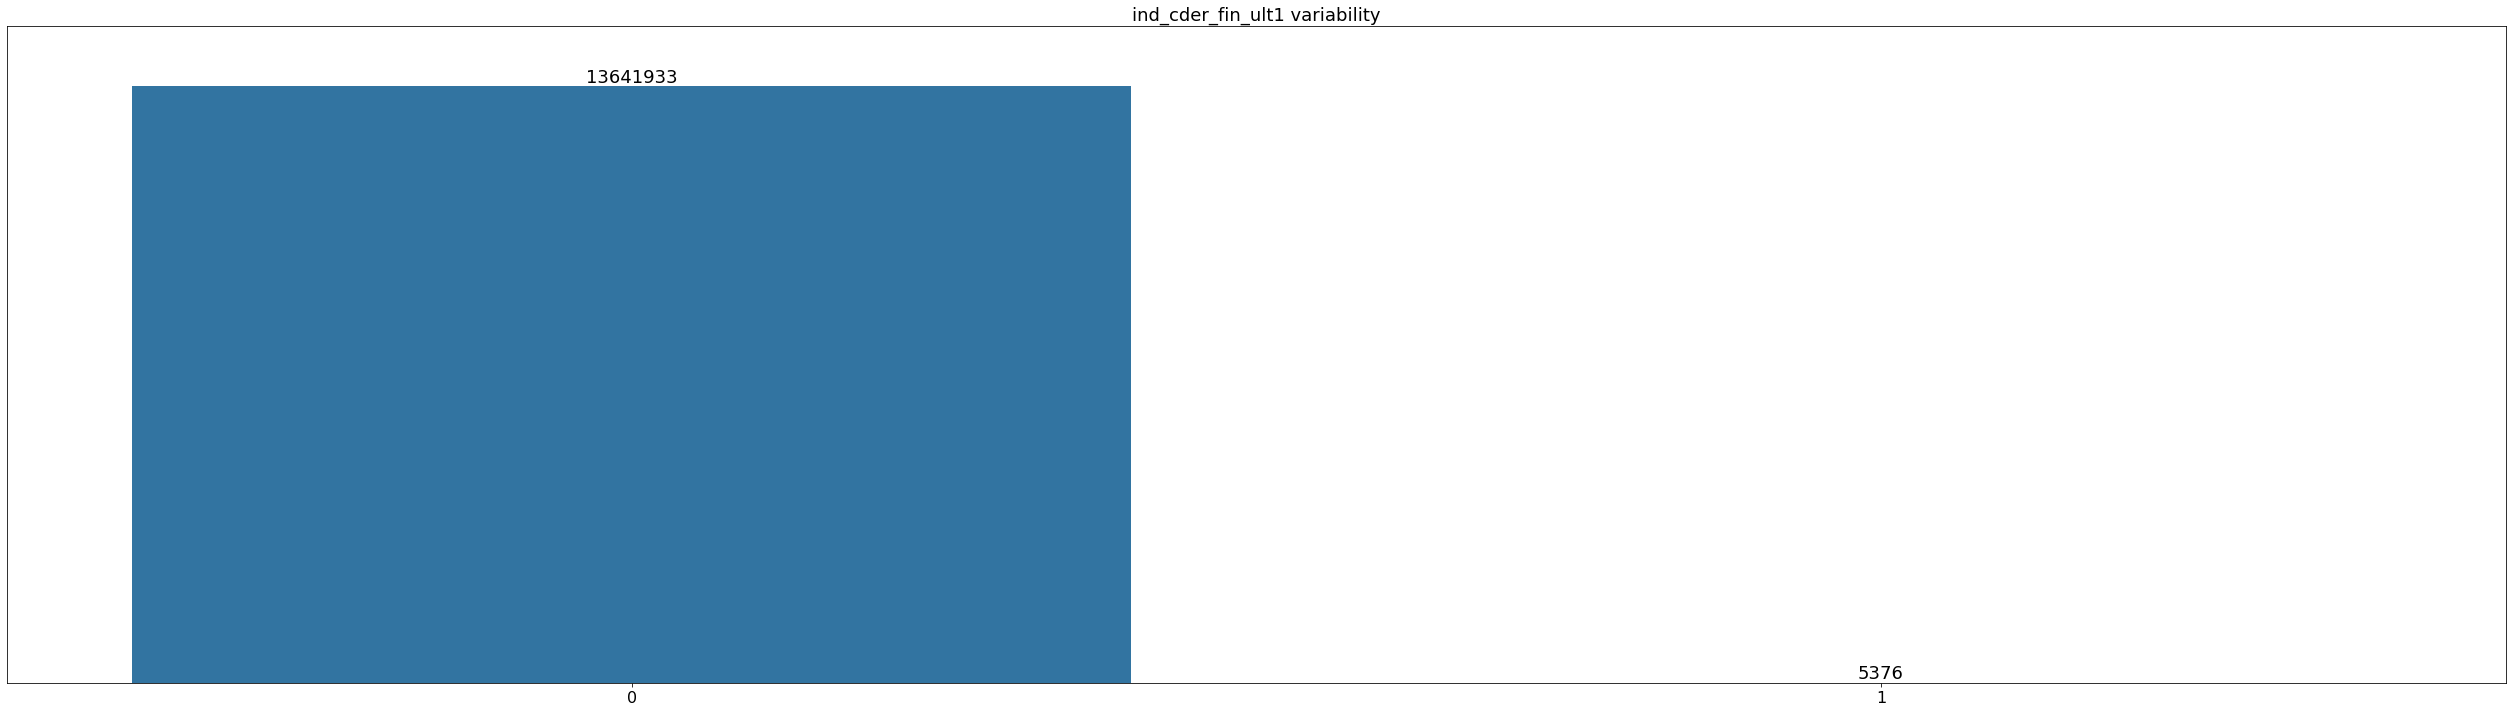

################ ind_cno_fin_ult1 ################


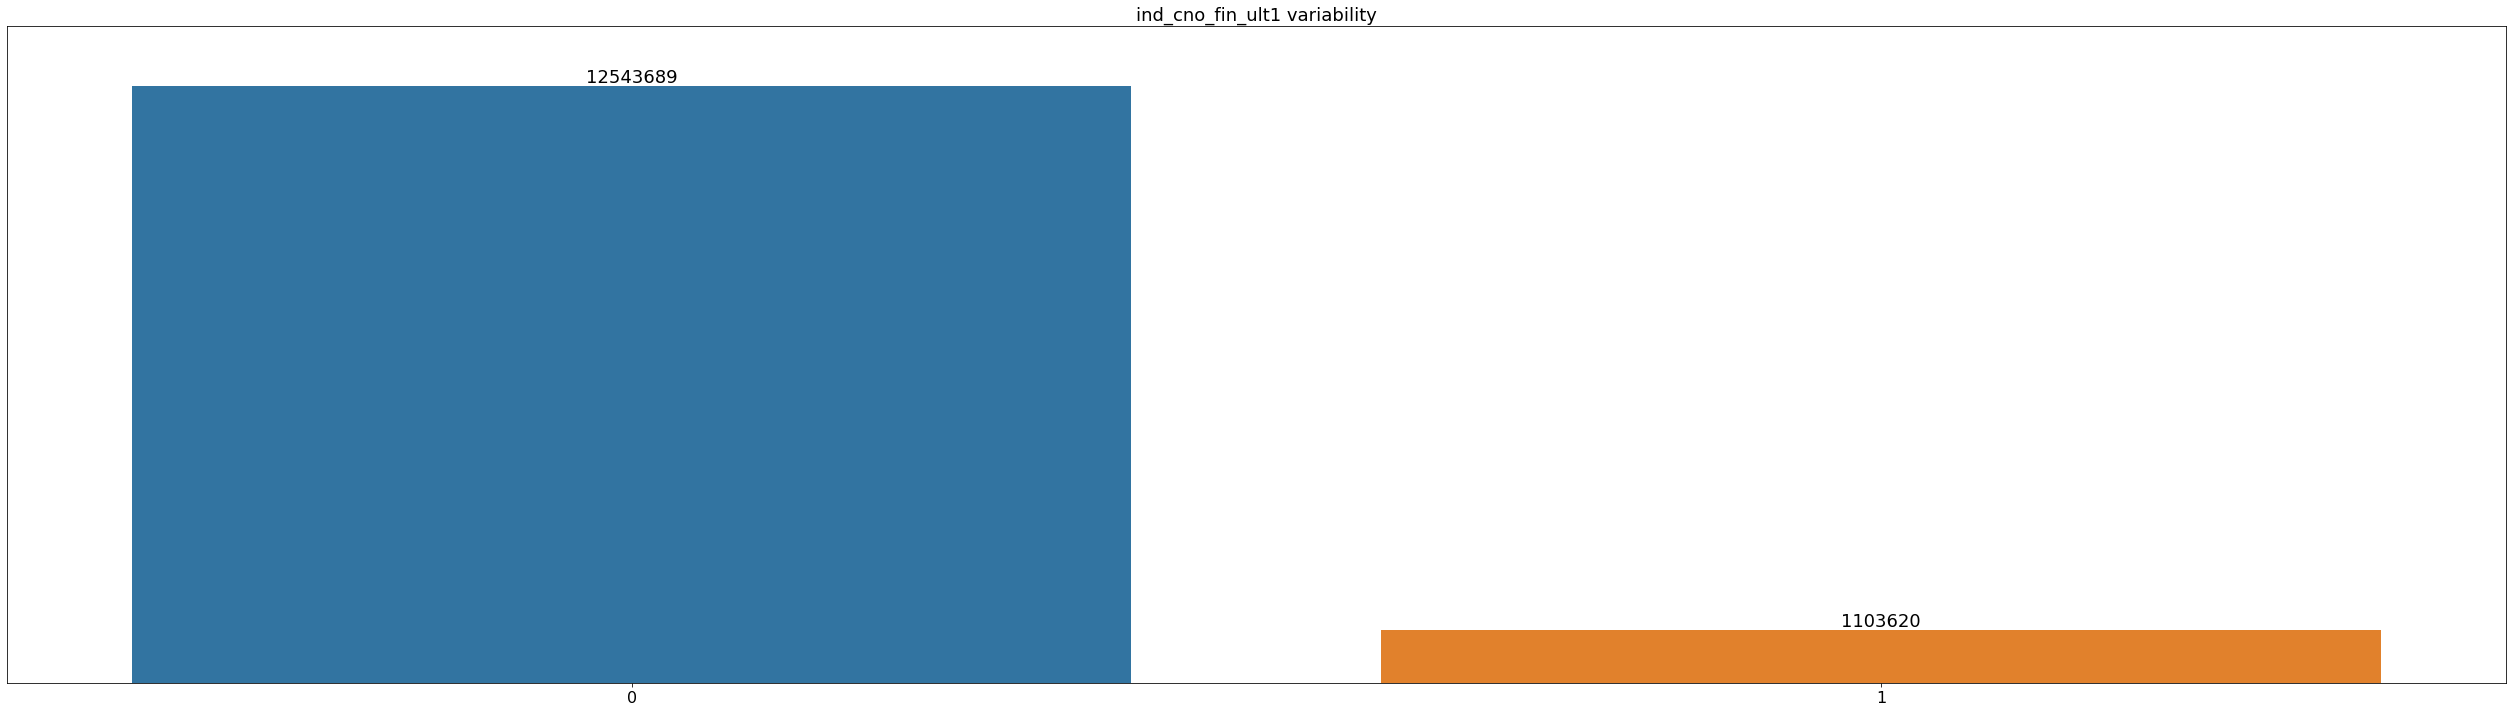

############### ind_ctju_fin_ult1 ################


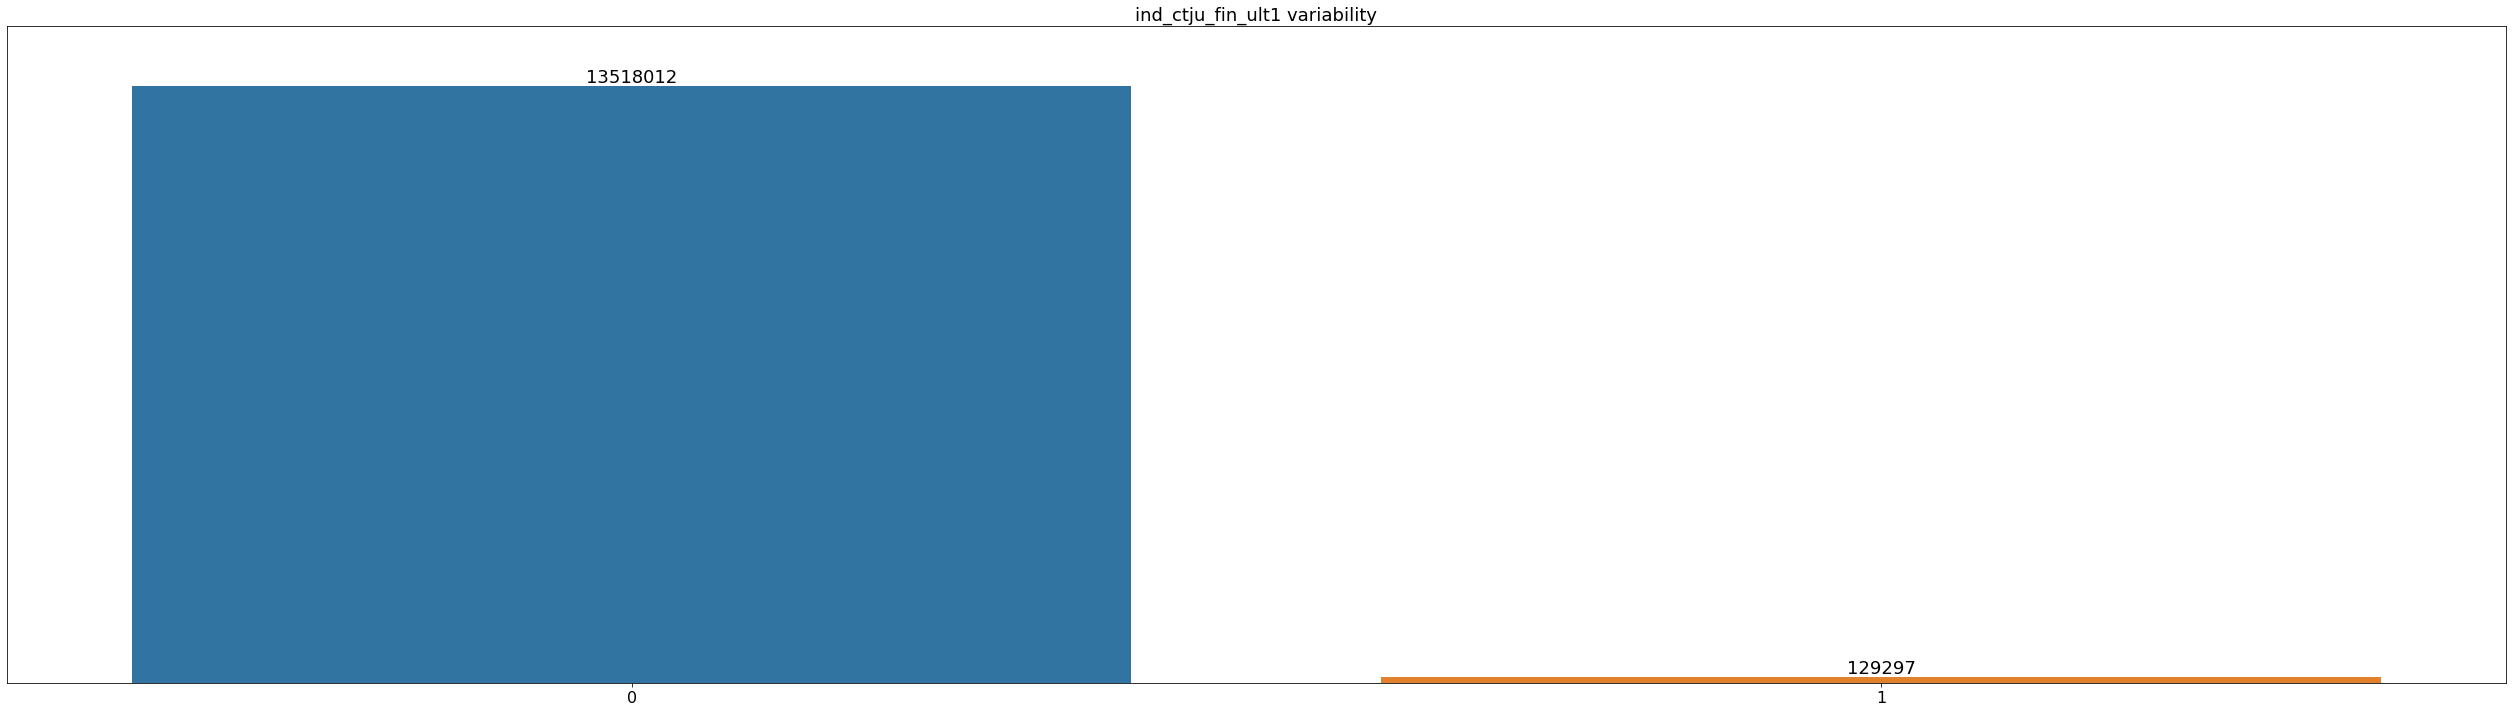

############### ind_ctma_fin_ult1 ################


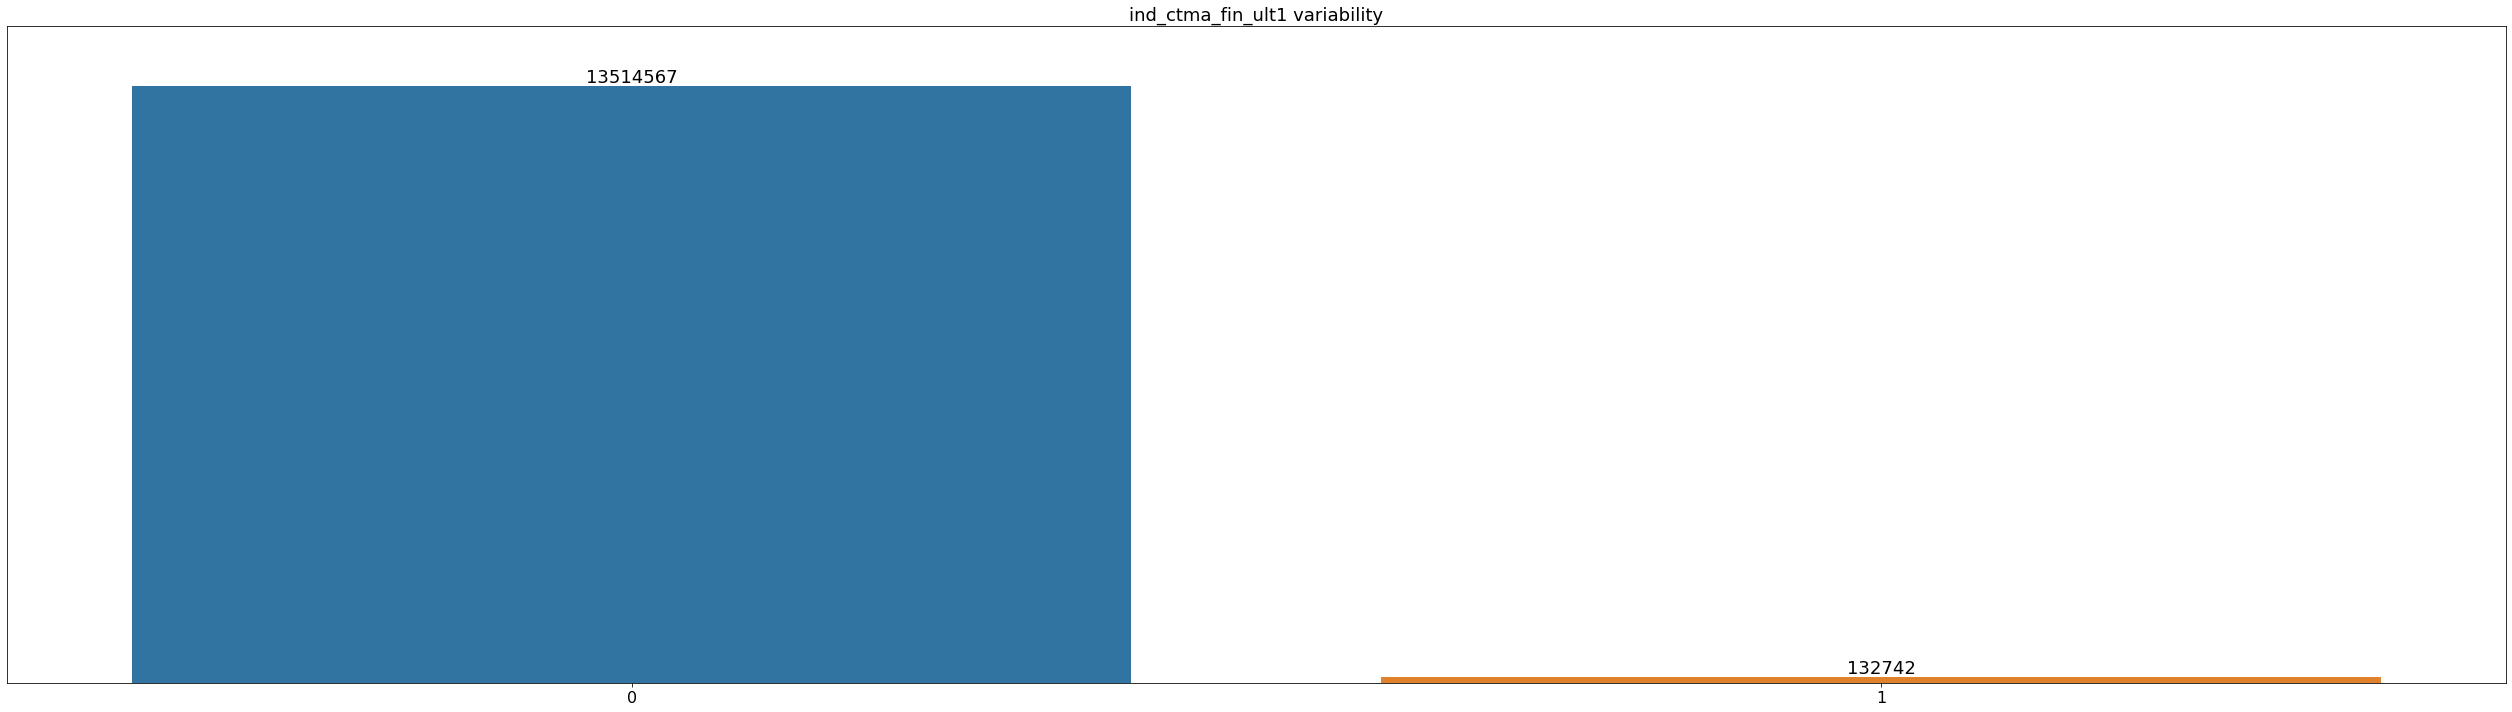

############### ind_ctop_fin_ult1 ################


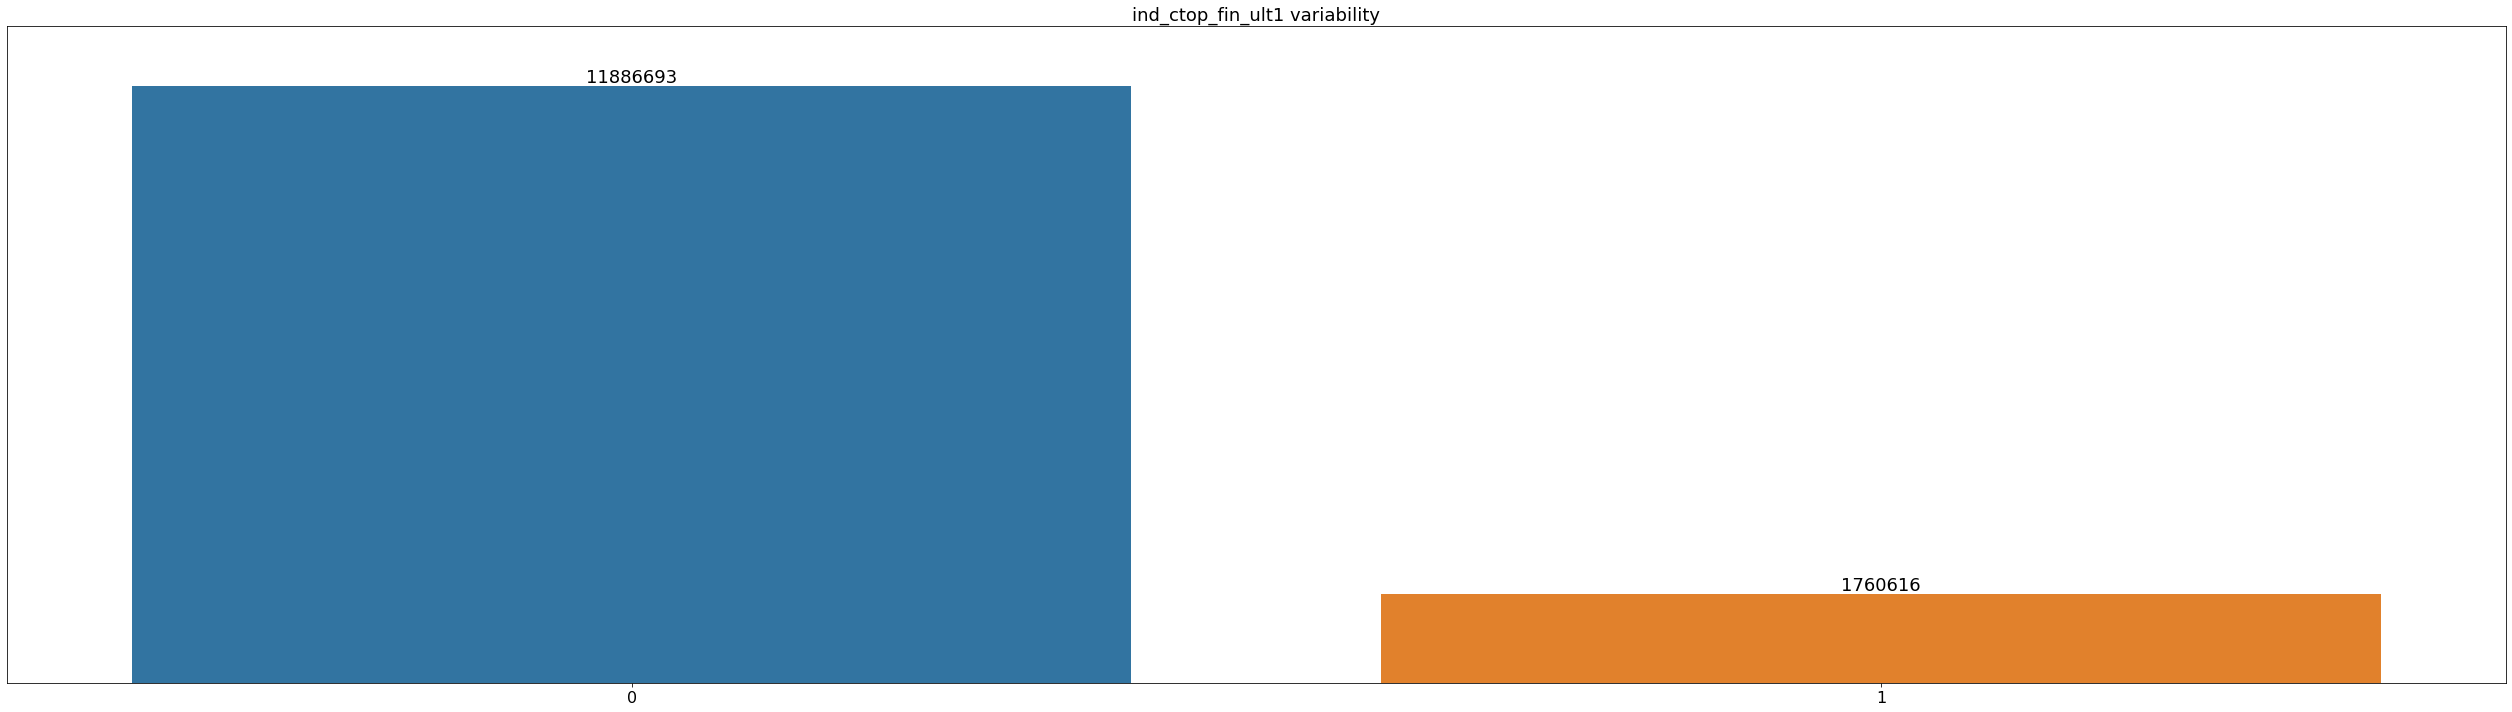

############### ind_ctpp_fin_ult1 ################


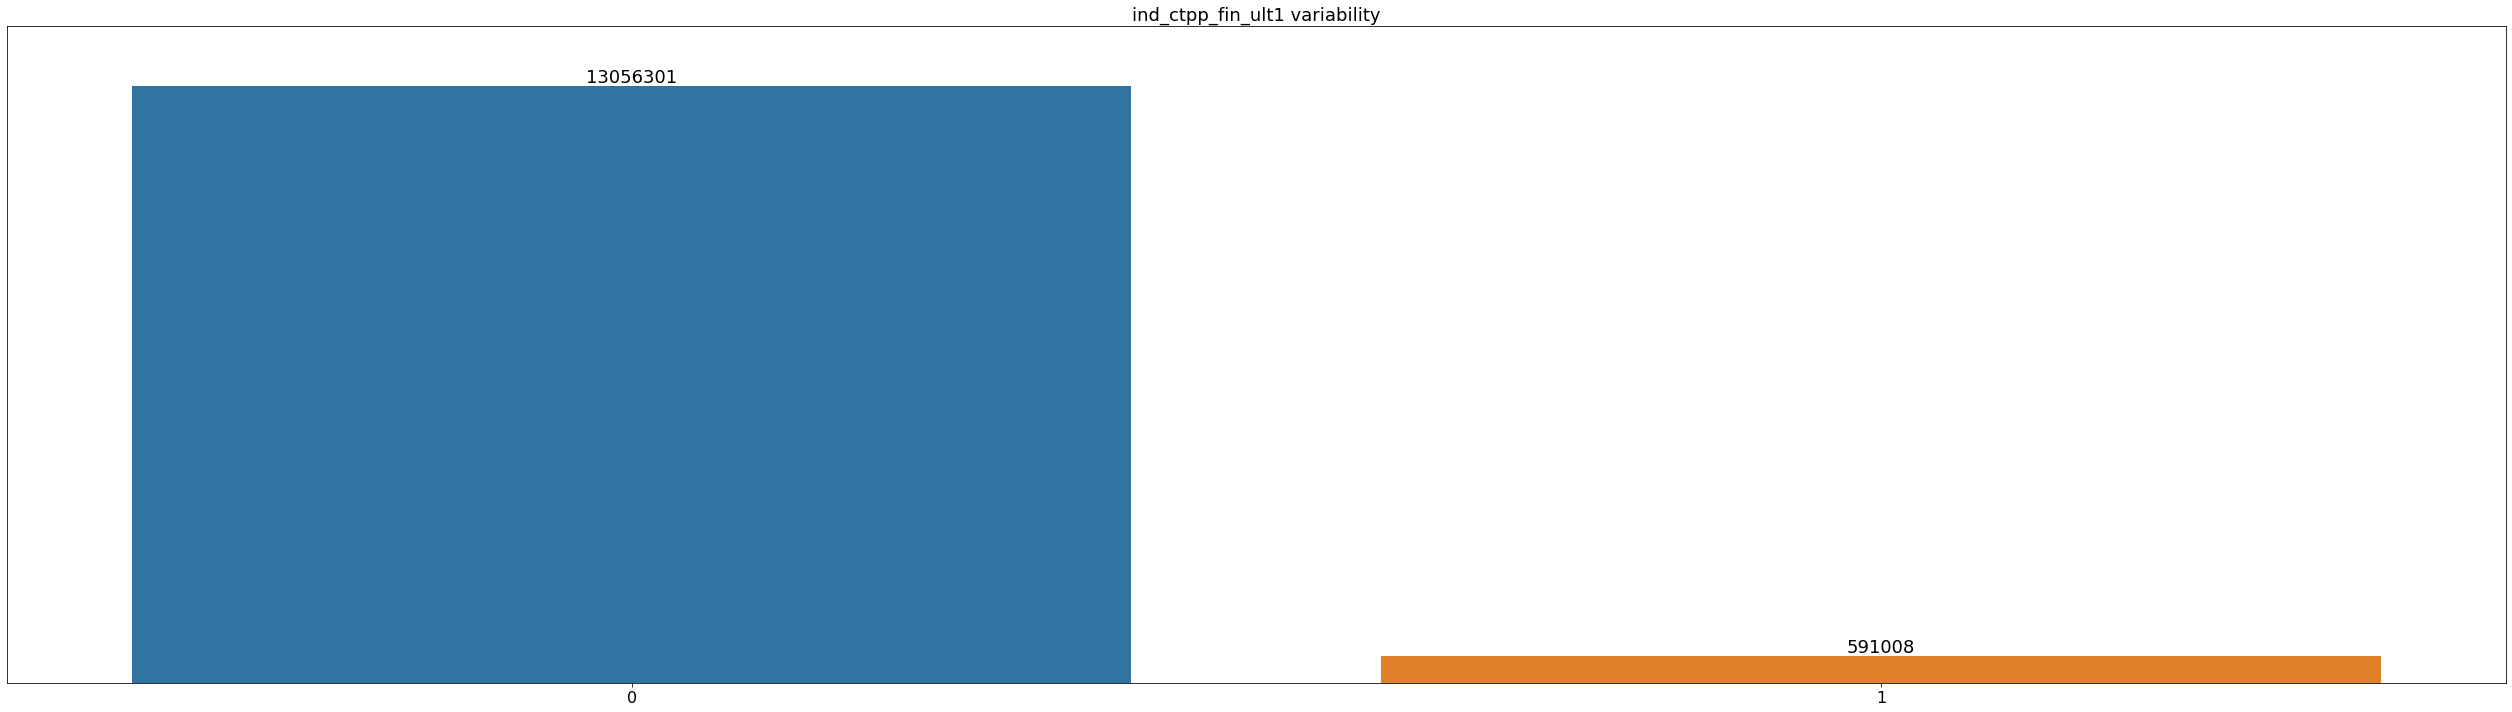

############### ind_deco_fin_ult1 ################


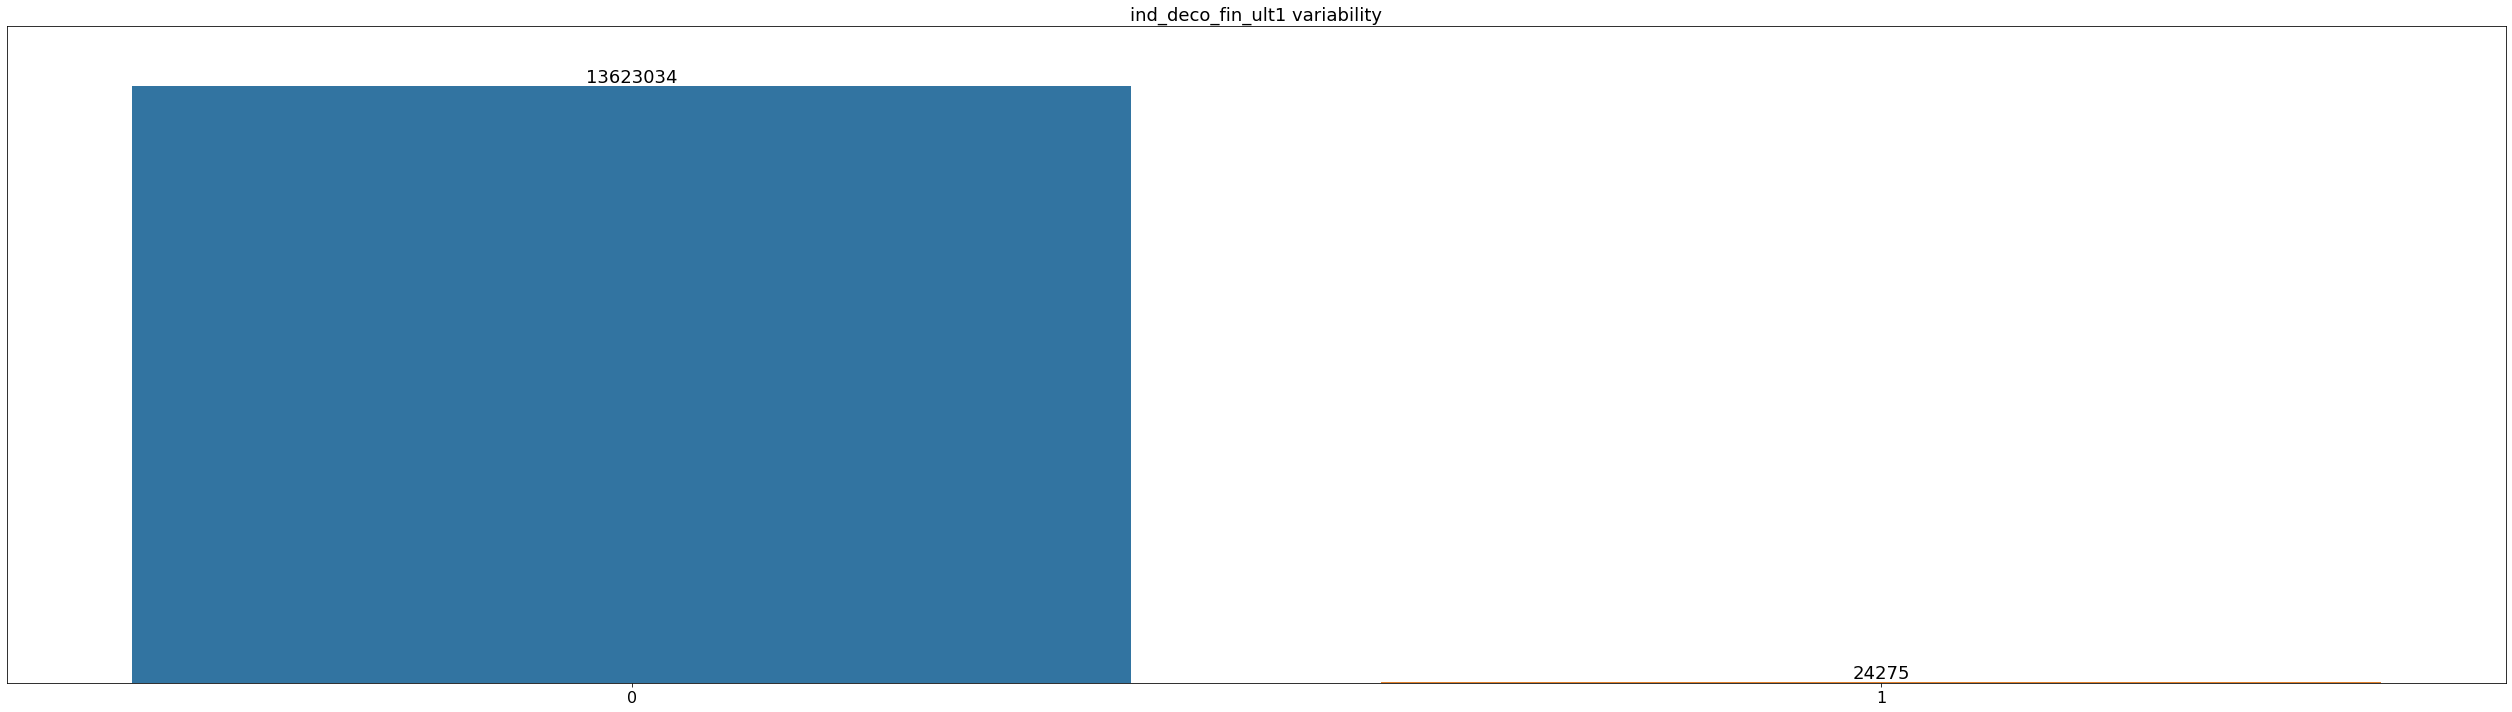

############### ind_deme_fin_ult1 ################


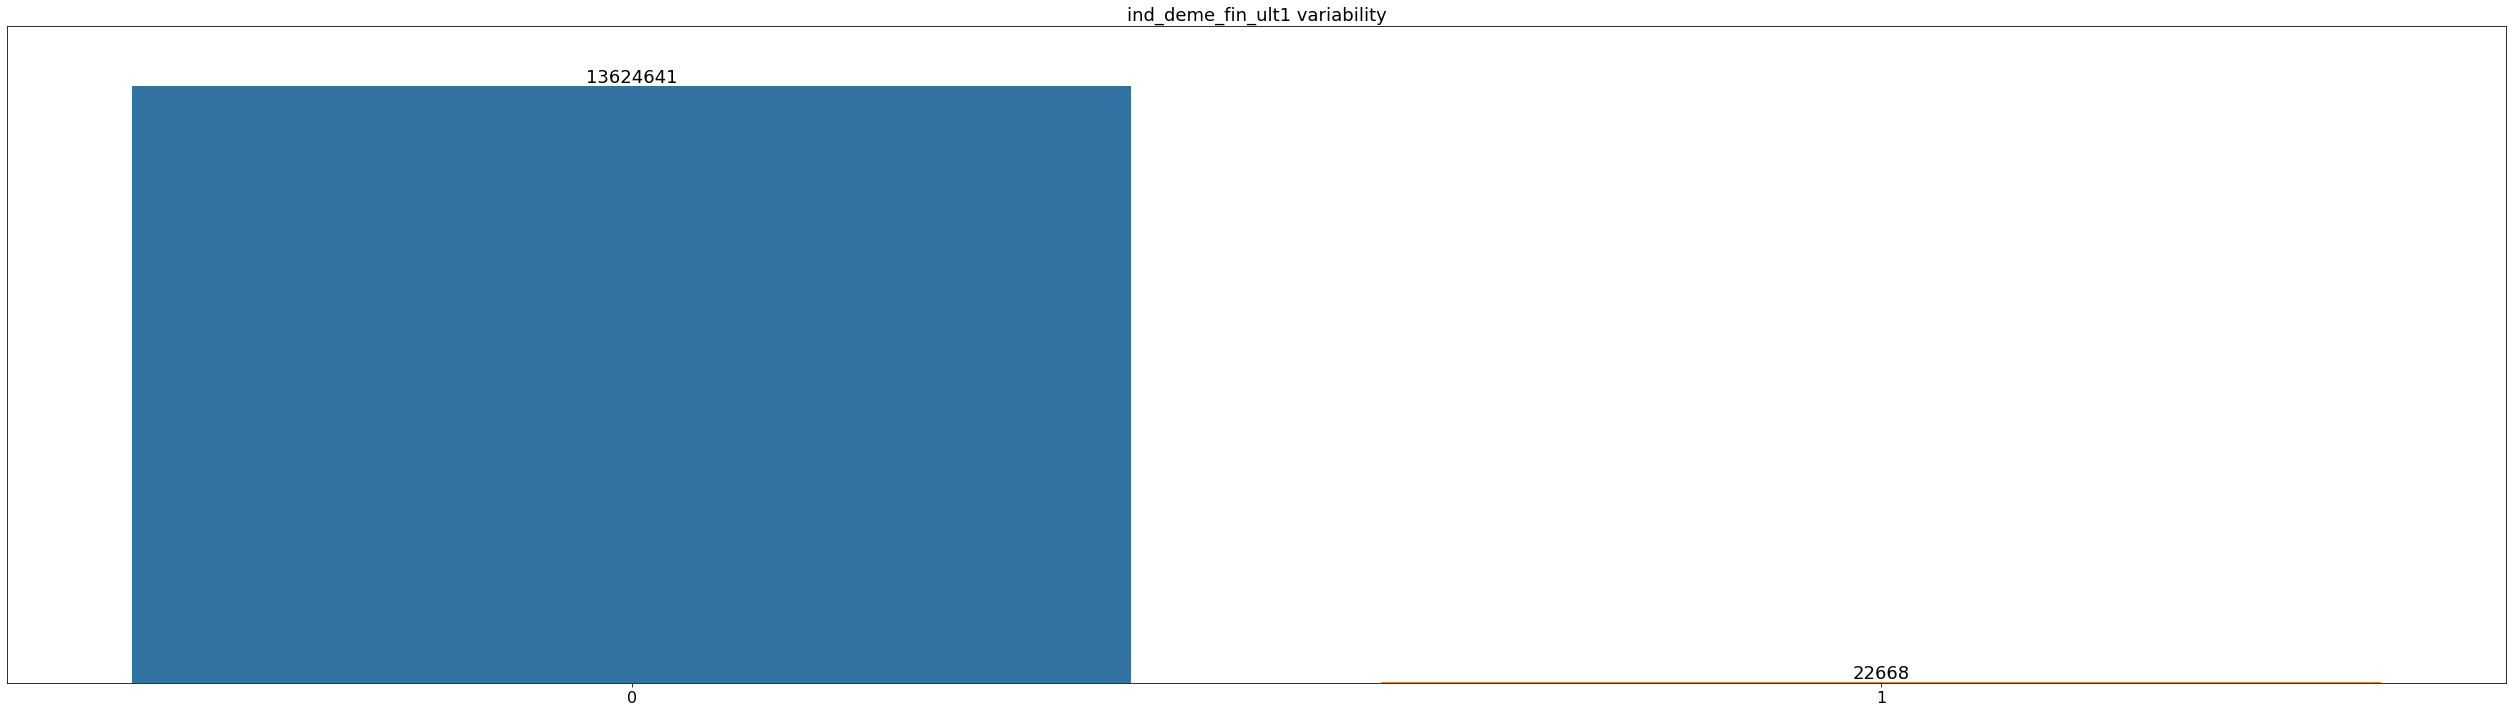

############### ind_dela_fin_ult1 ################


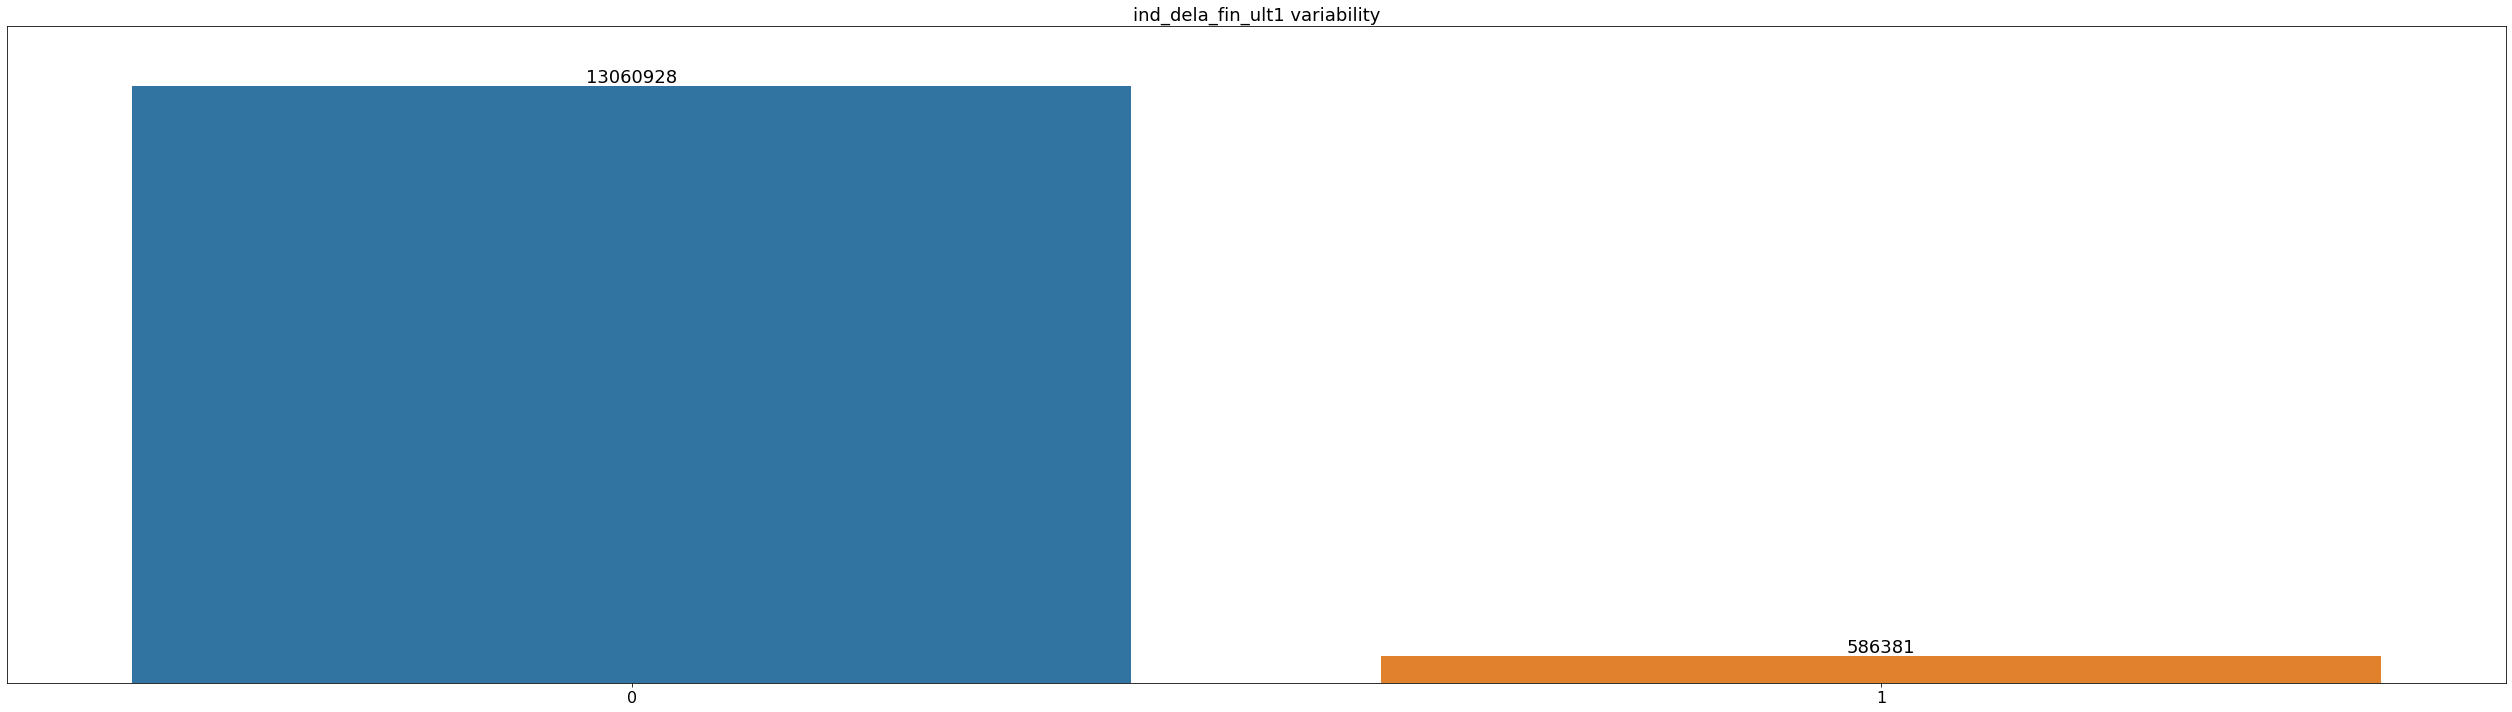

############### ind_ecue_fin_ult1 ################


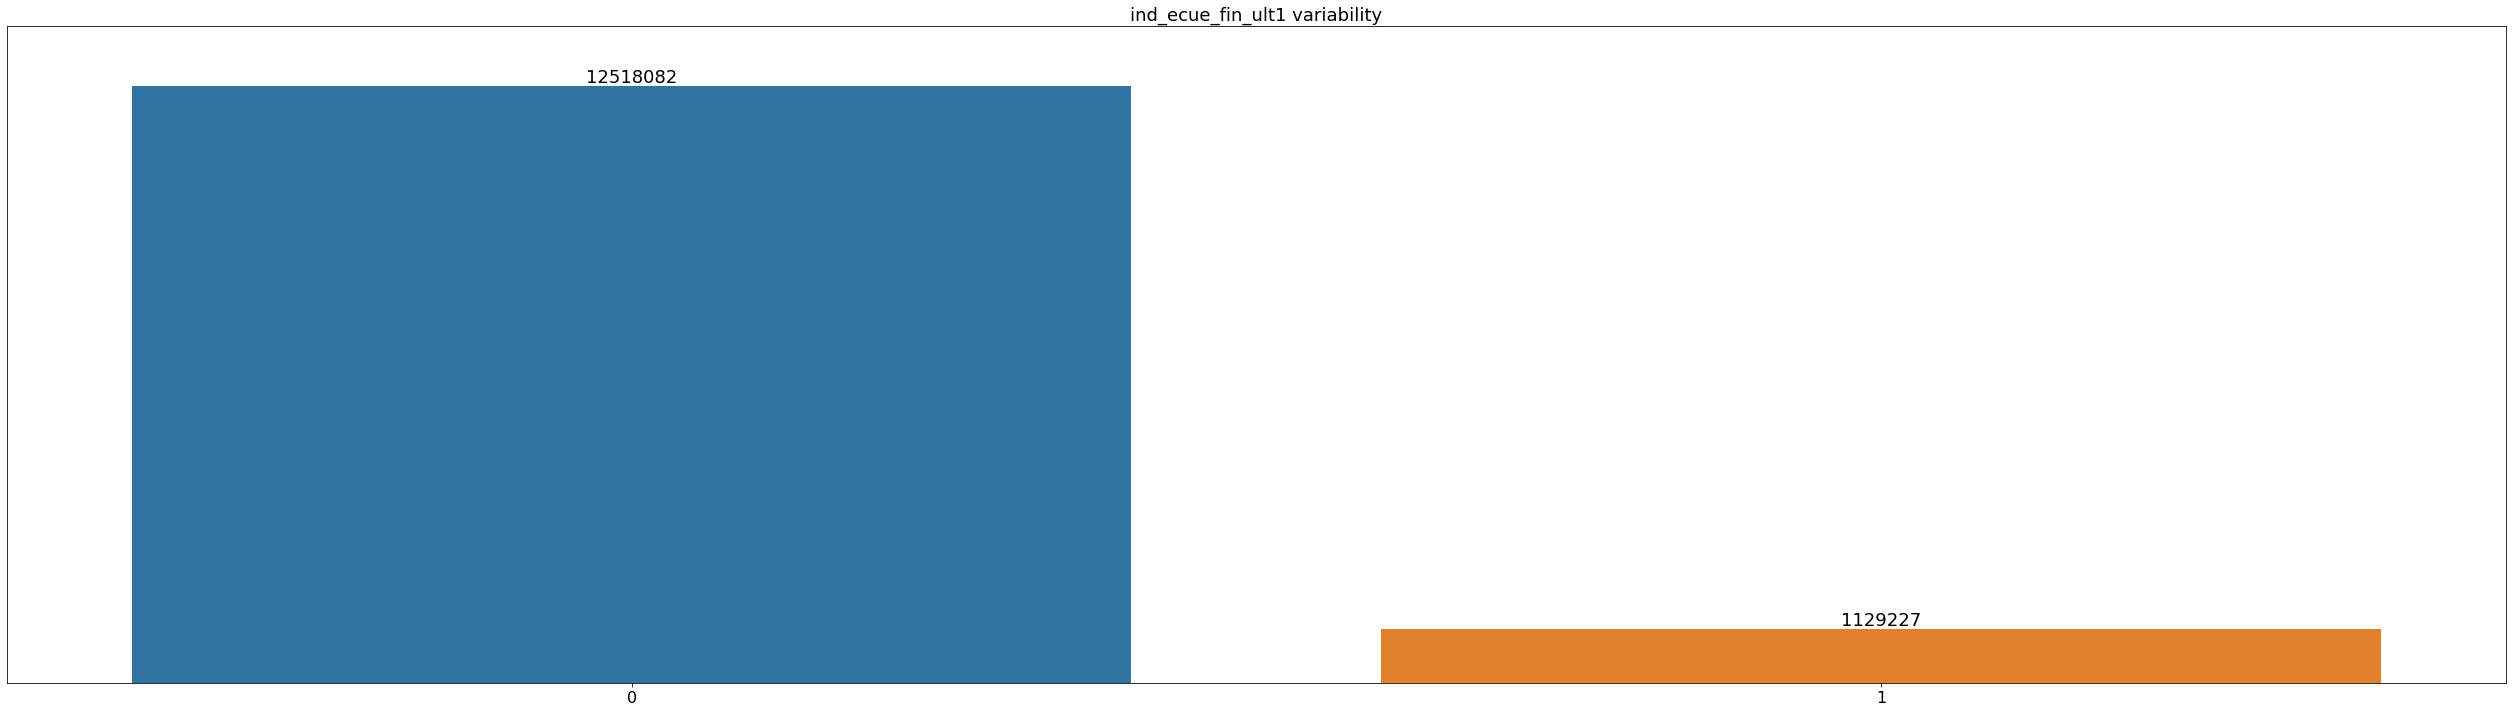

############### ind_fond_fin_ult1 ################


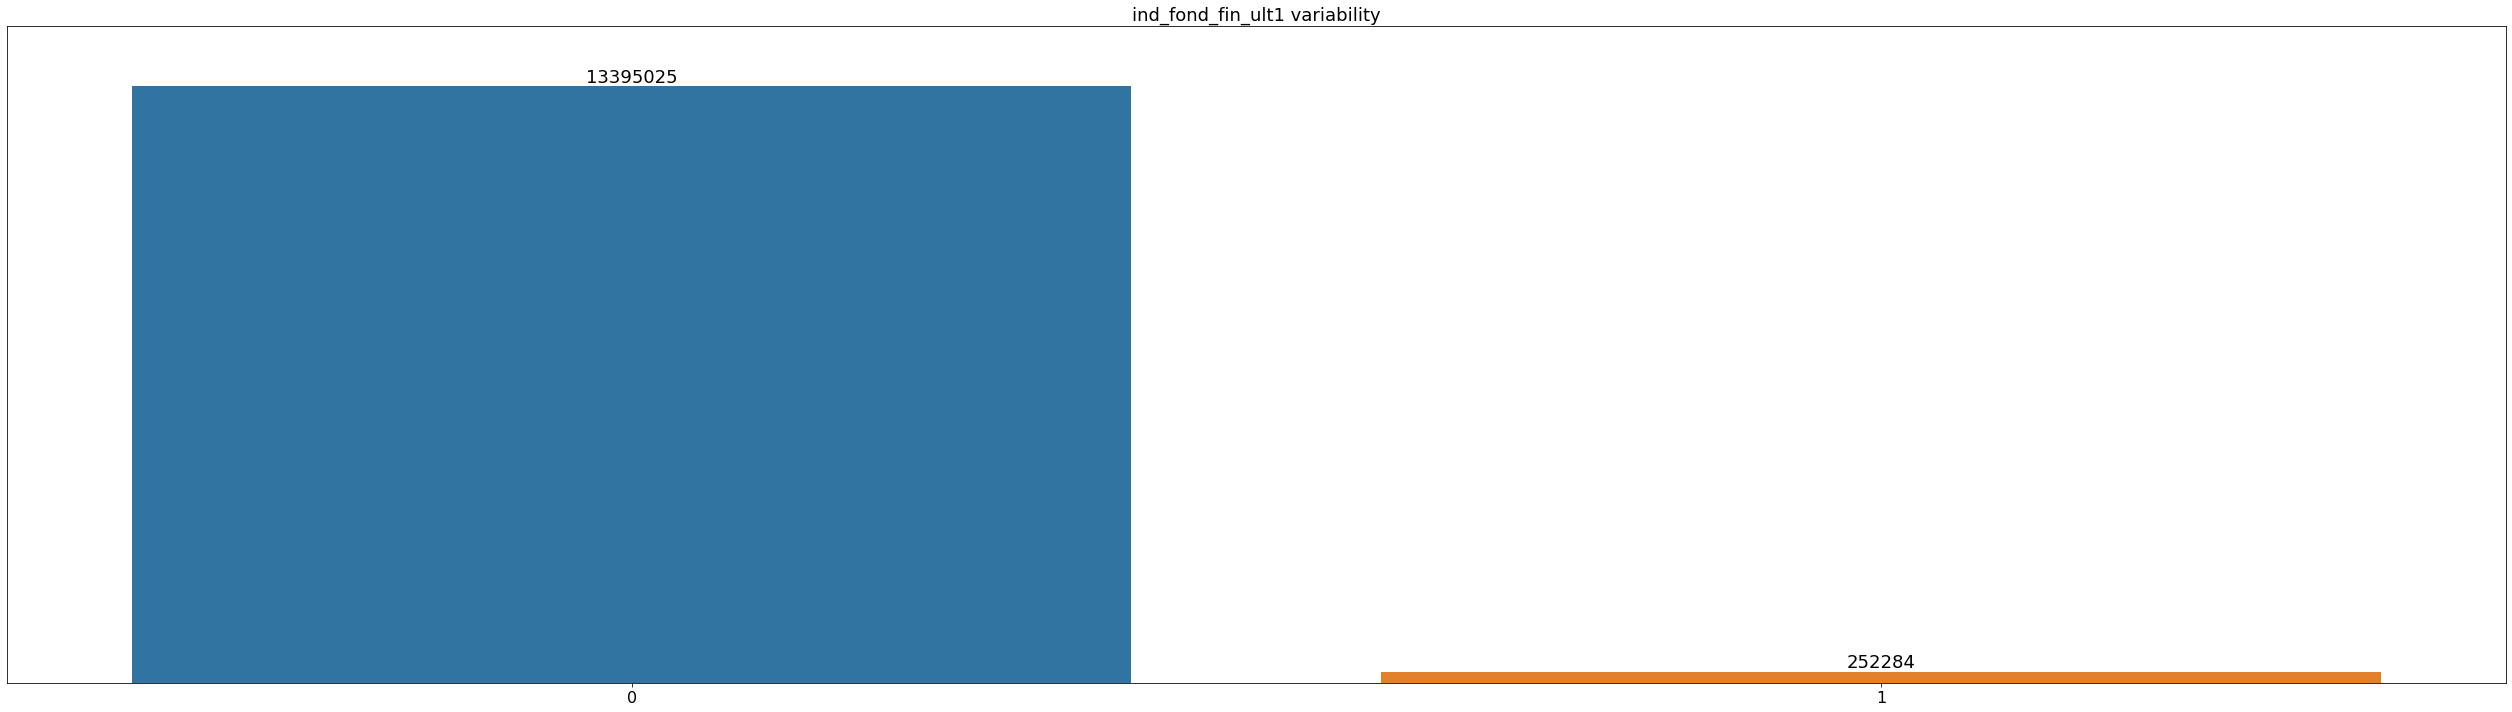

################ ind_hip_fin_ult1 ################


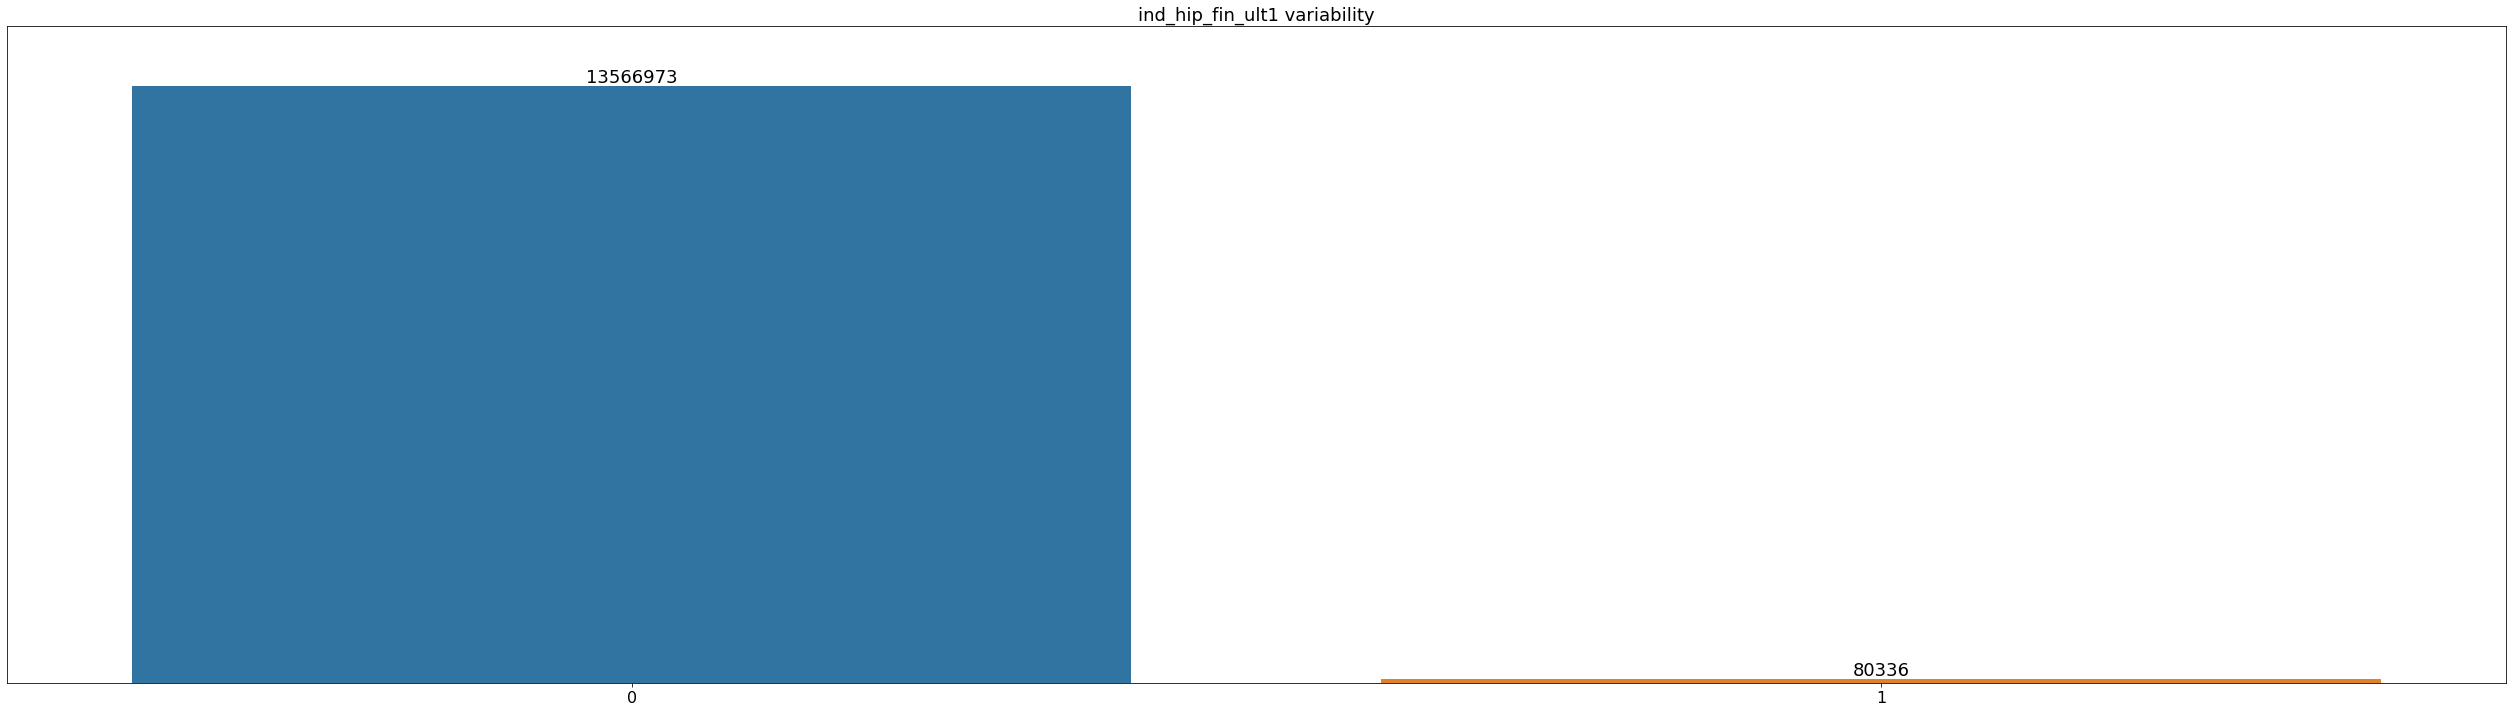

############### ind_plan_fin_ult1 ################


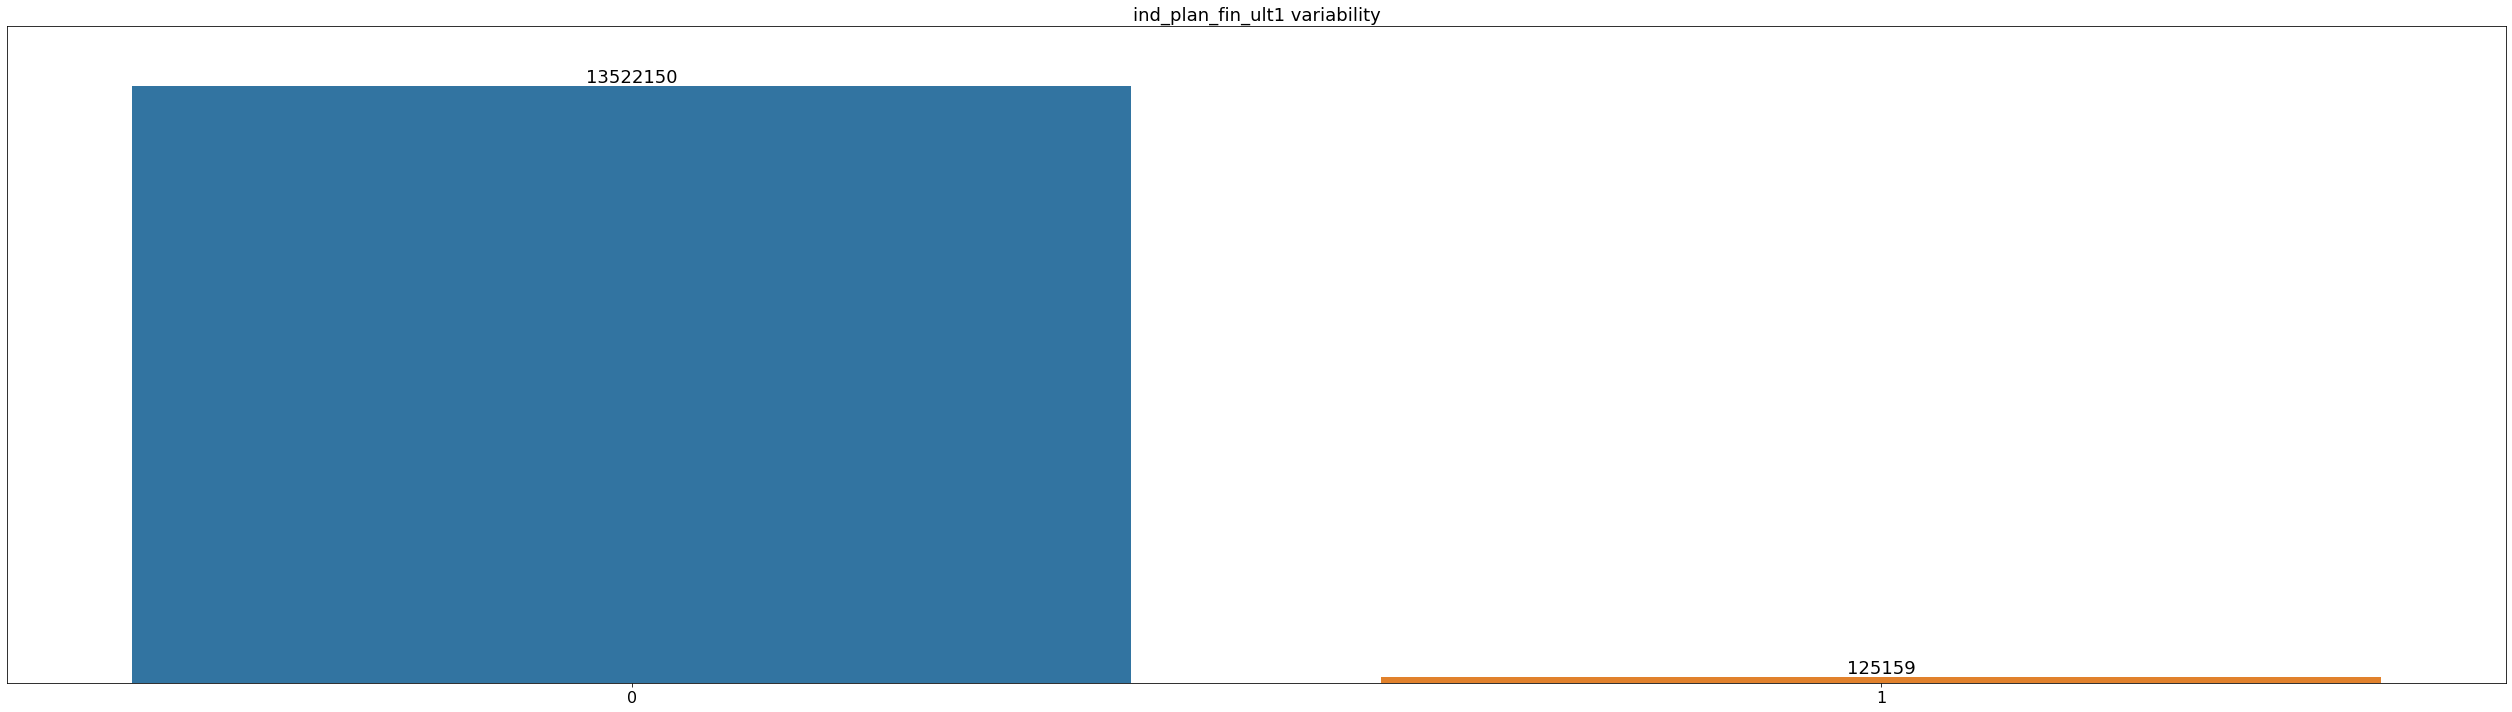

############### ind_pres_fin_ult1 ################


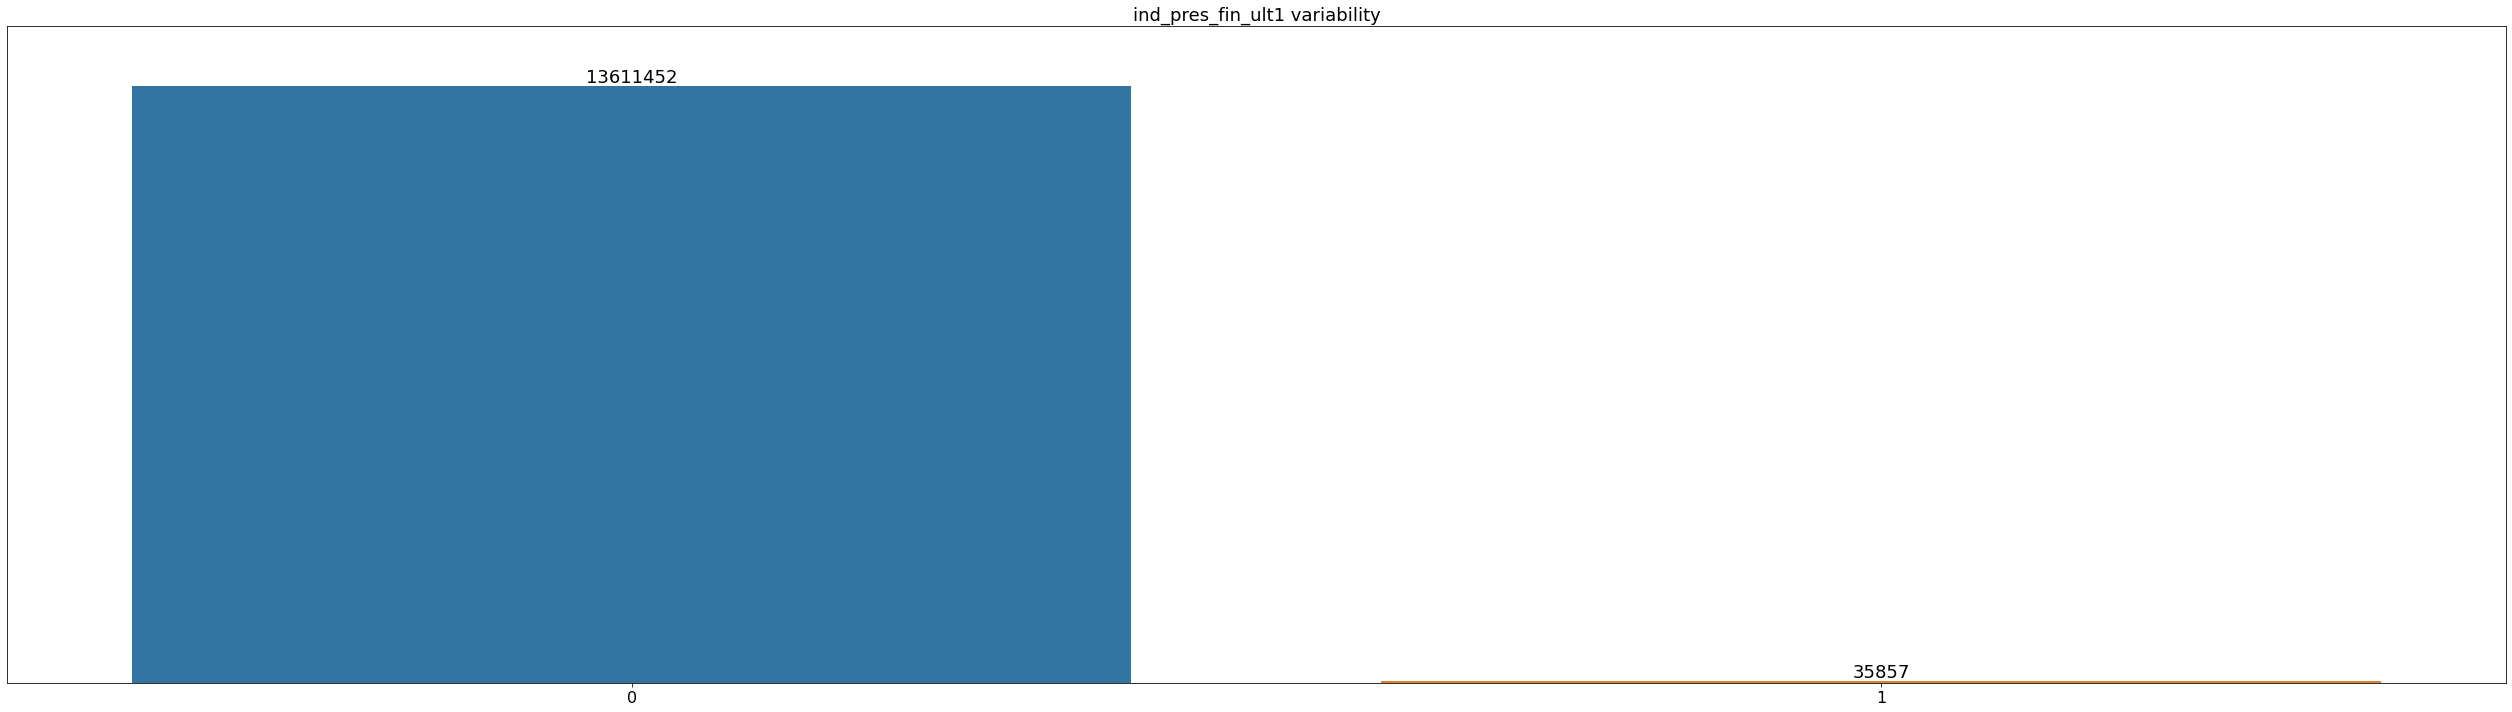

############### ind_reca_fin_ult1 ################


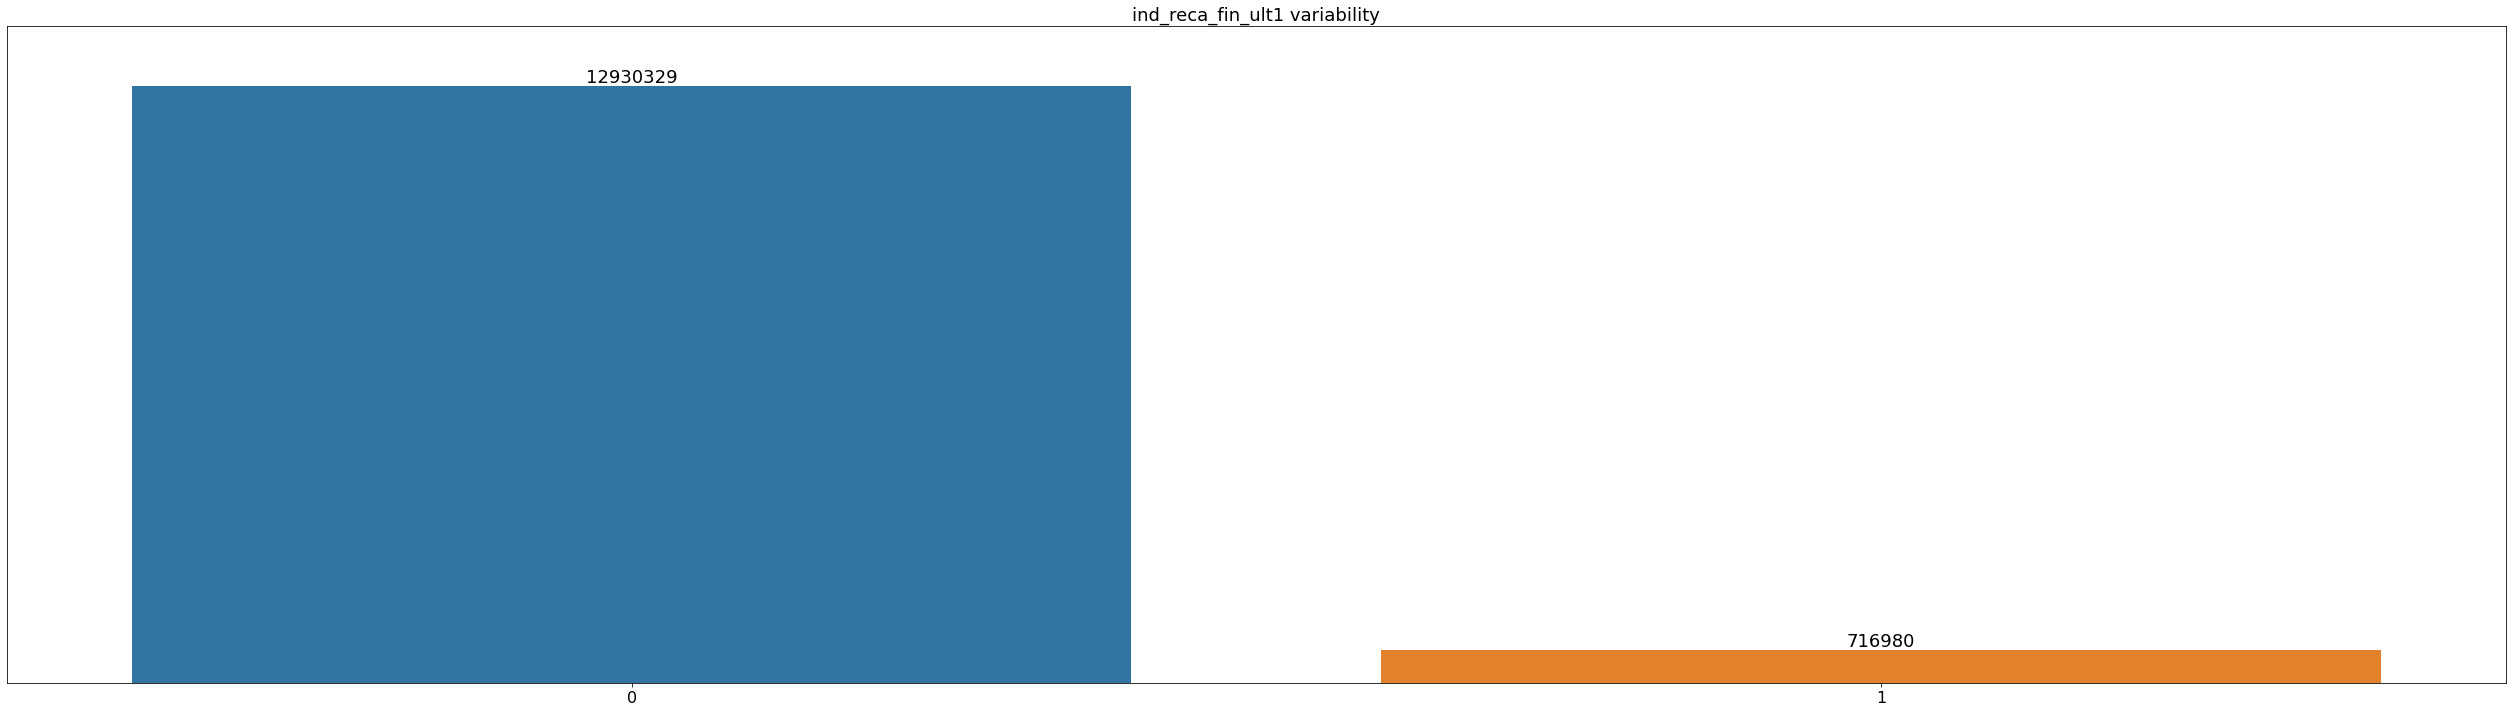

############### ind_tjcr_fin_ult1 ################


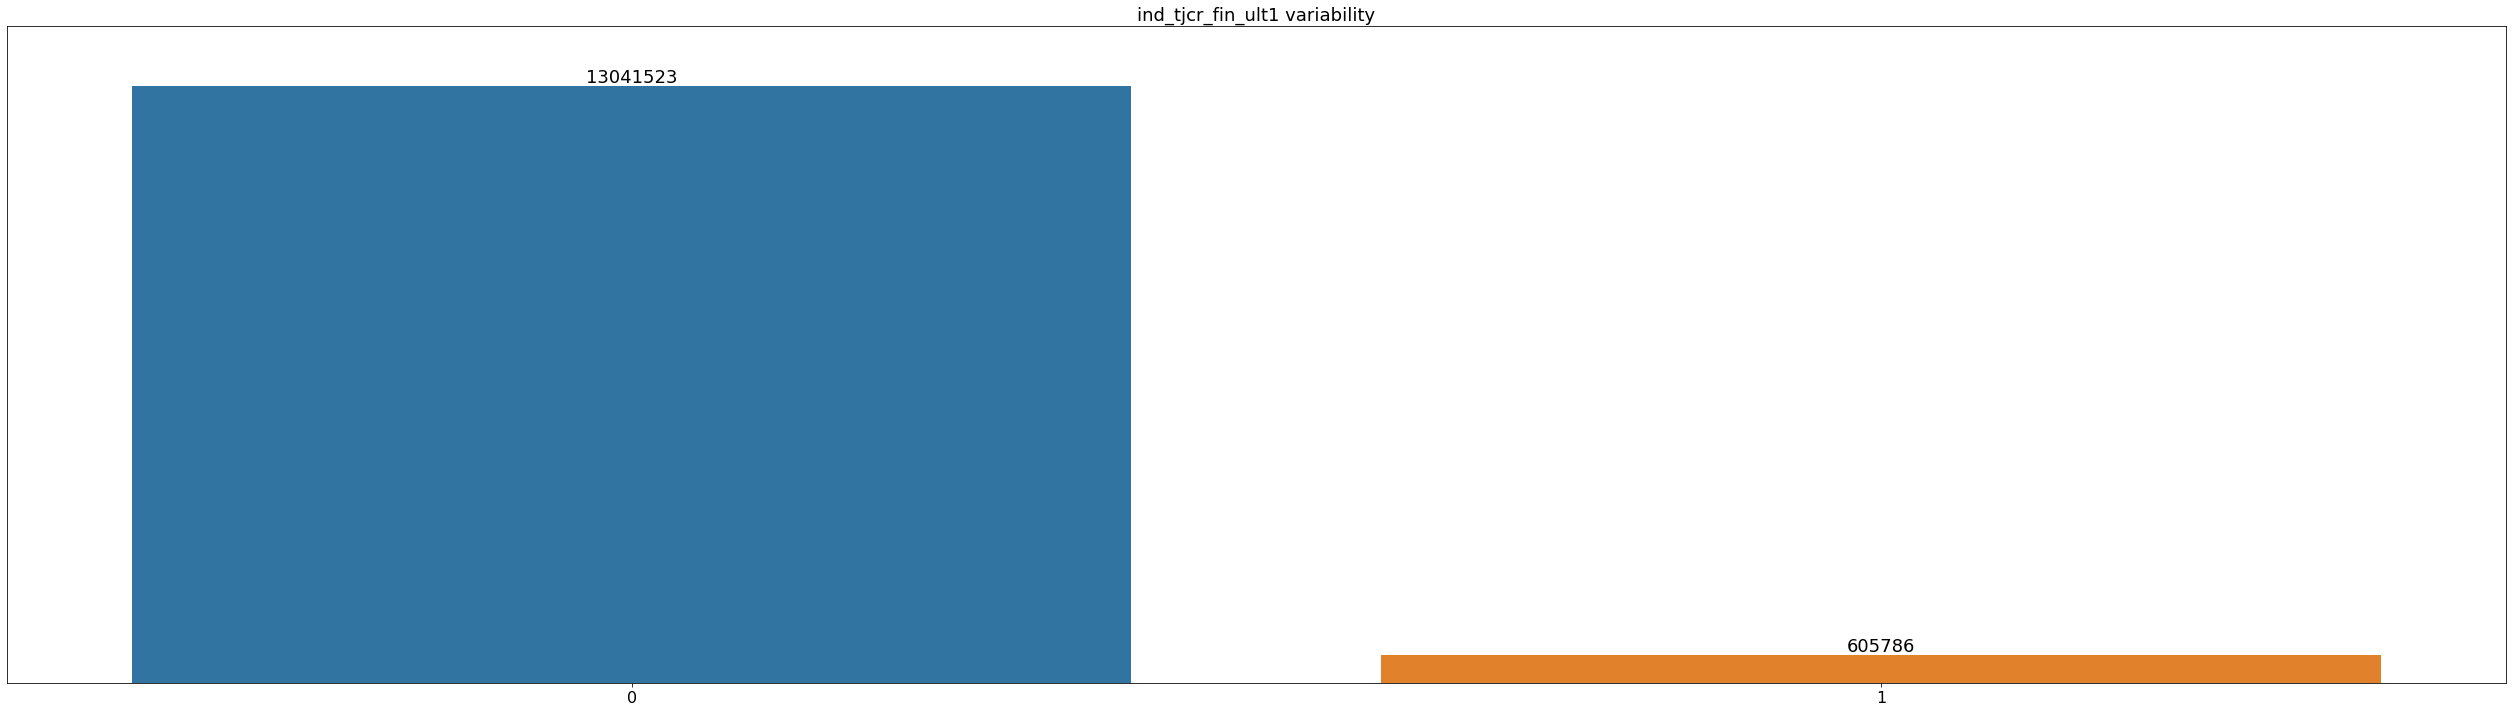

############### ind_valo_fin_ult1 ################


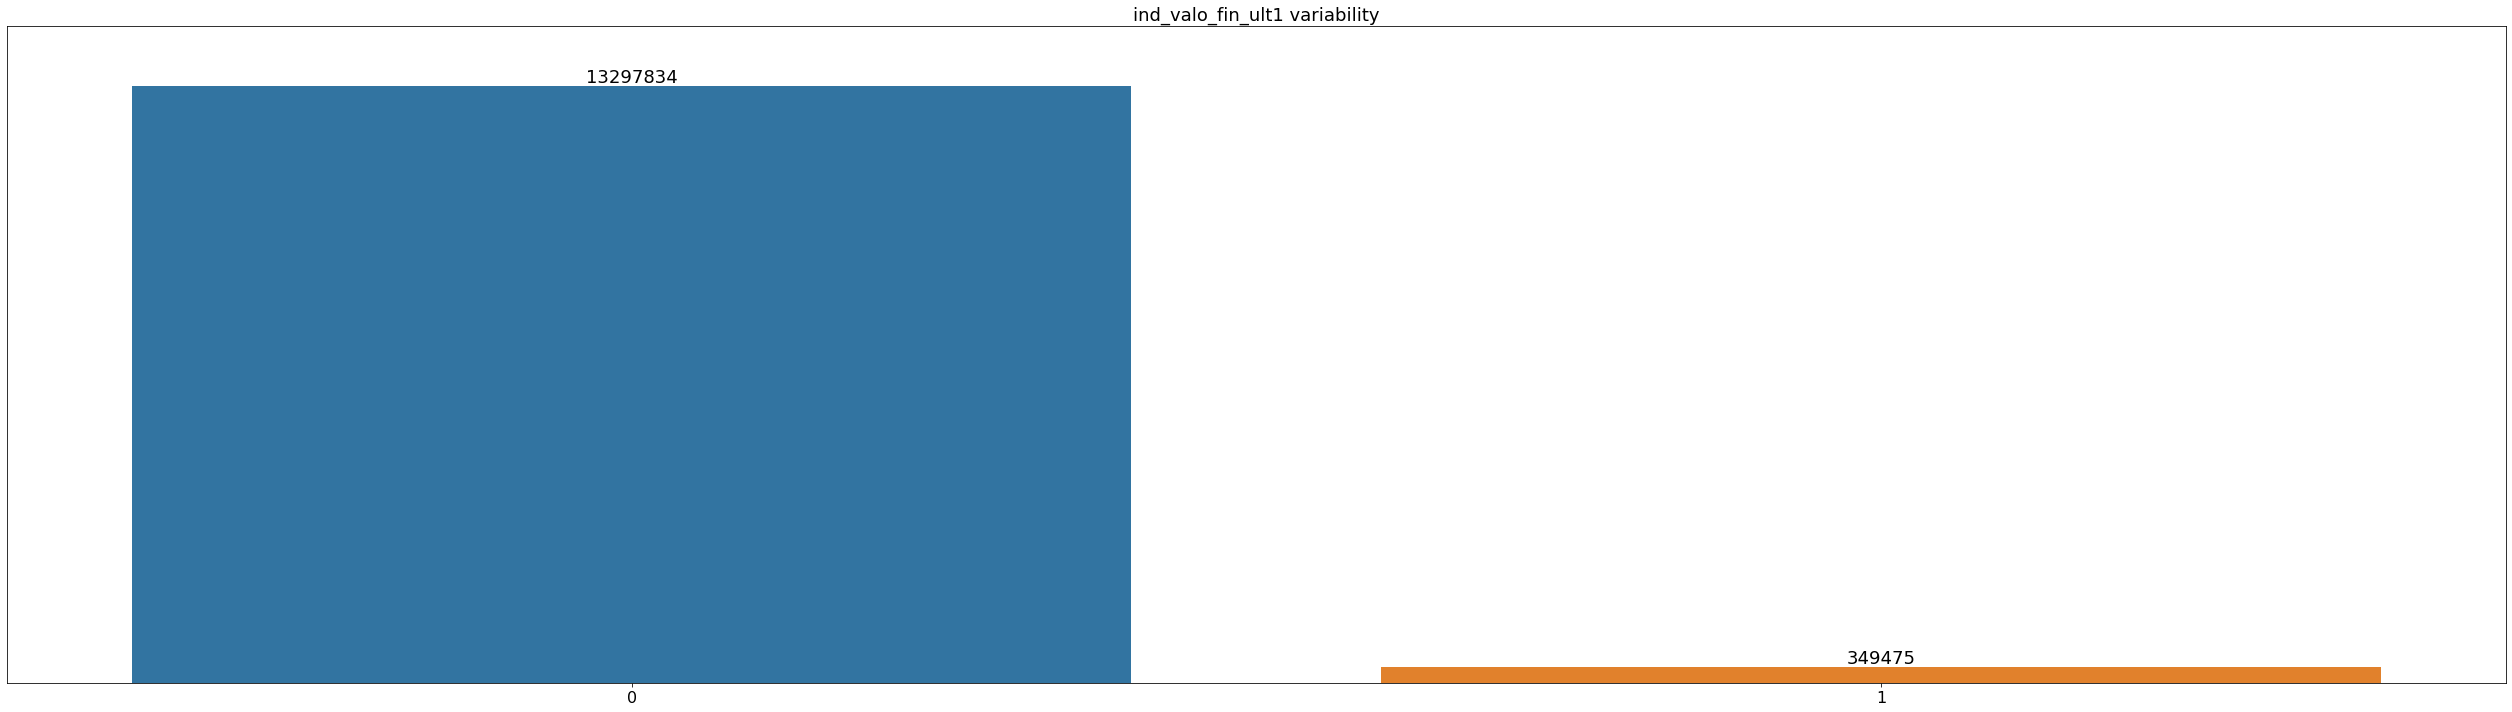

################ ind_viv_fin_ult1 ################


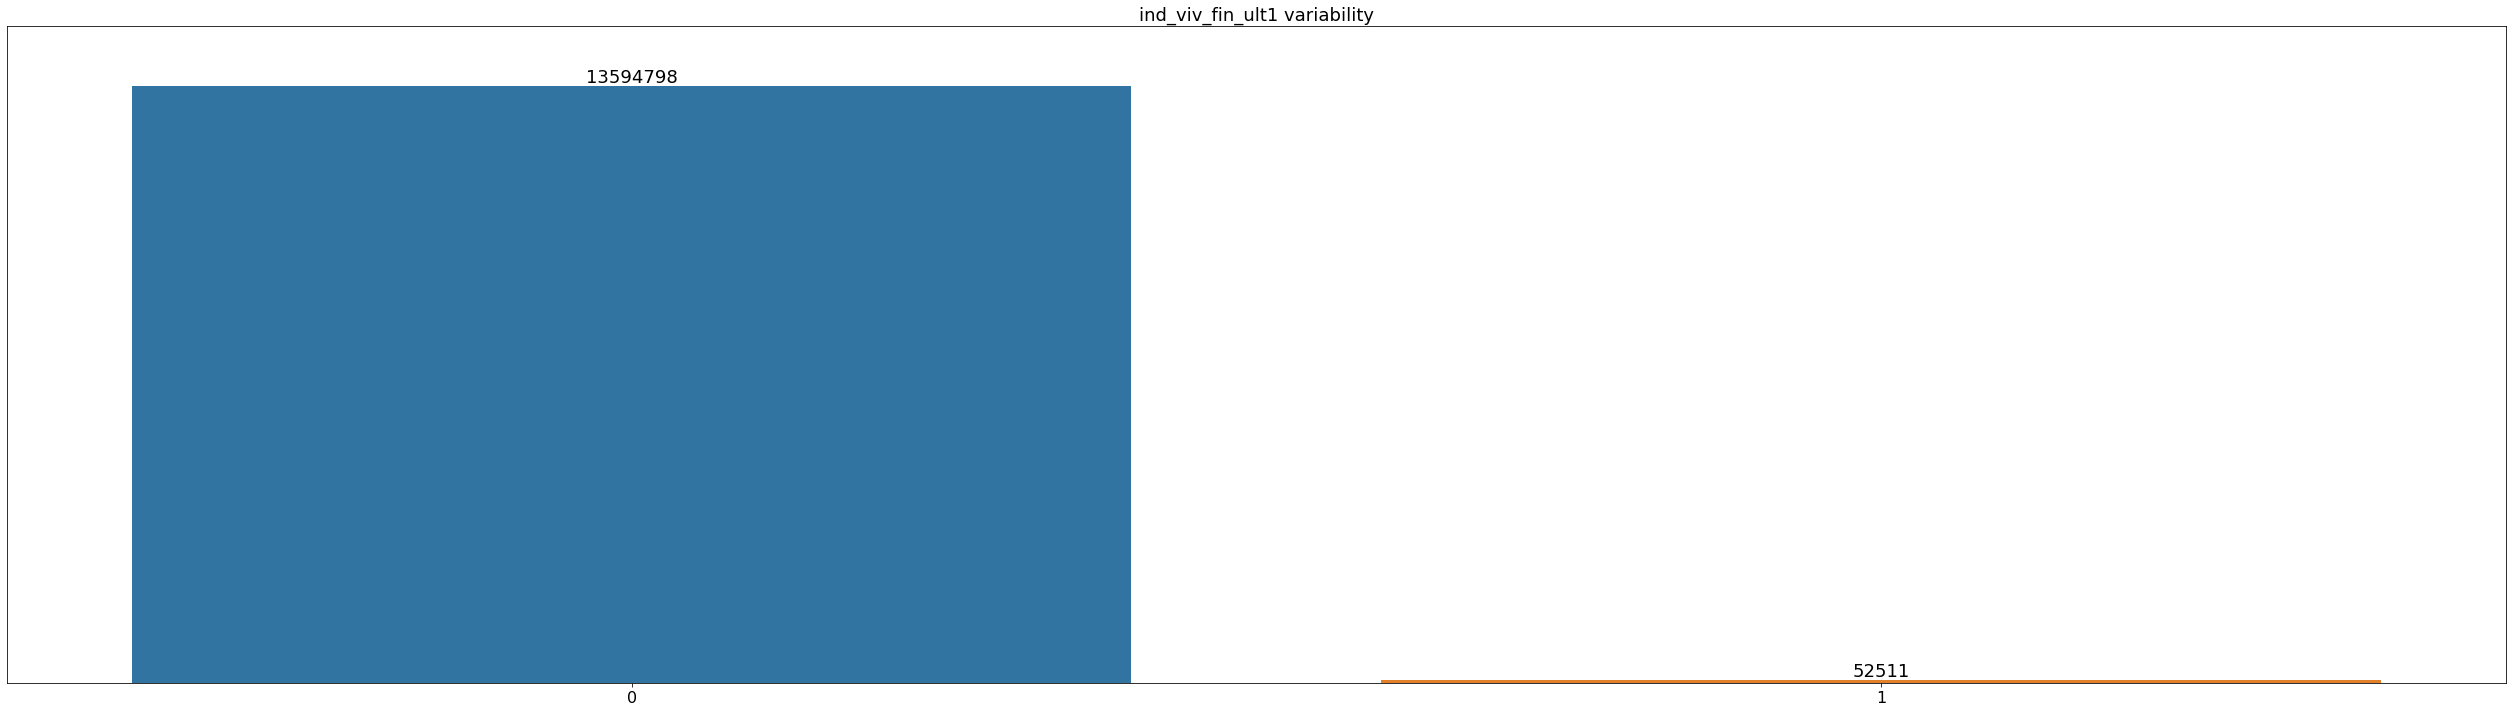

################ ind_nomina_ult1 #################


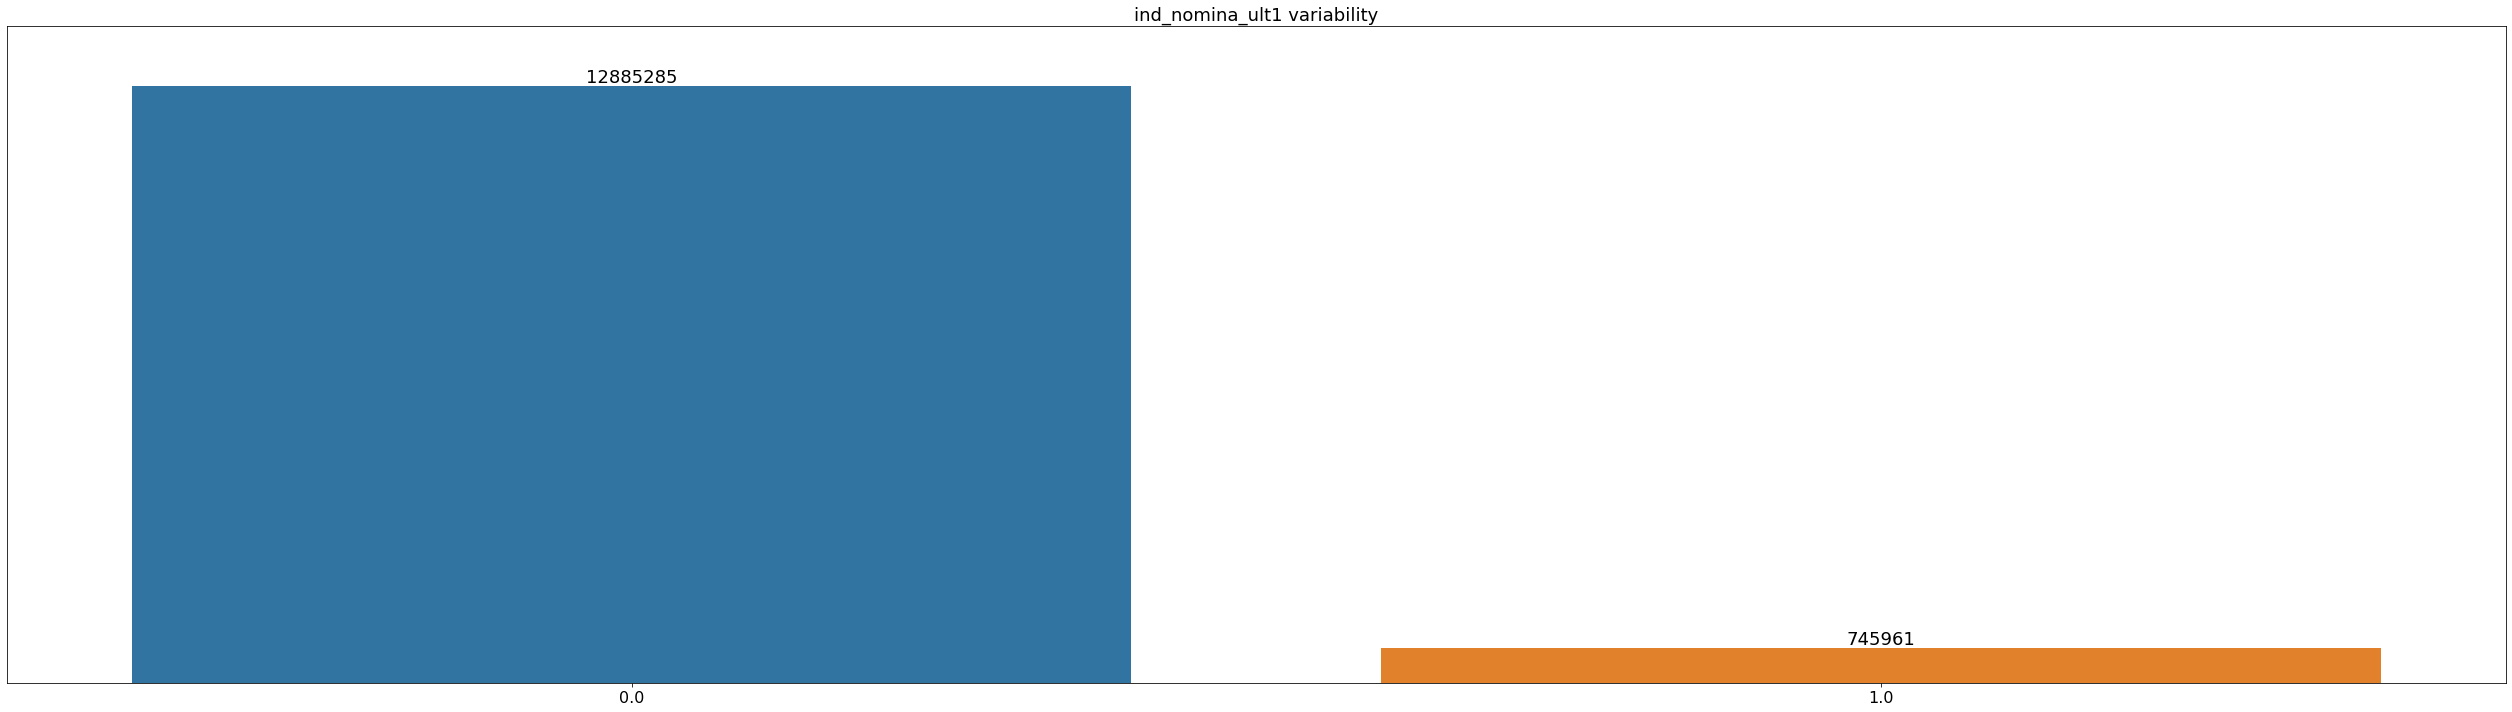

############### ind_nom_pens_ult1 ################


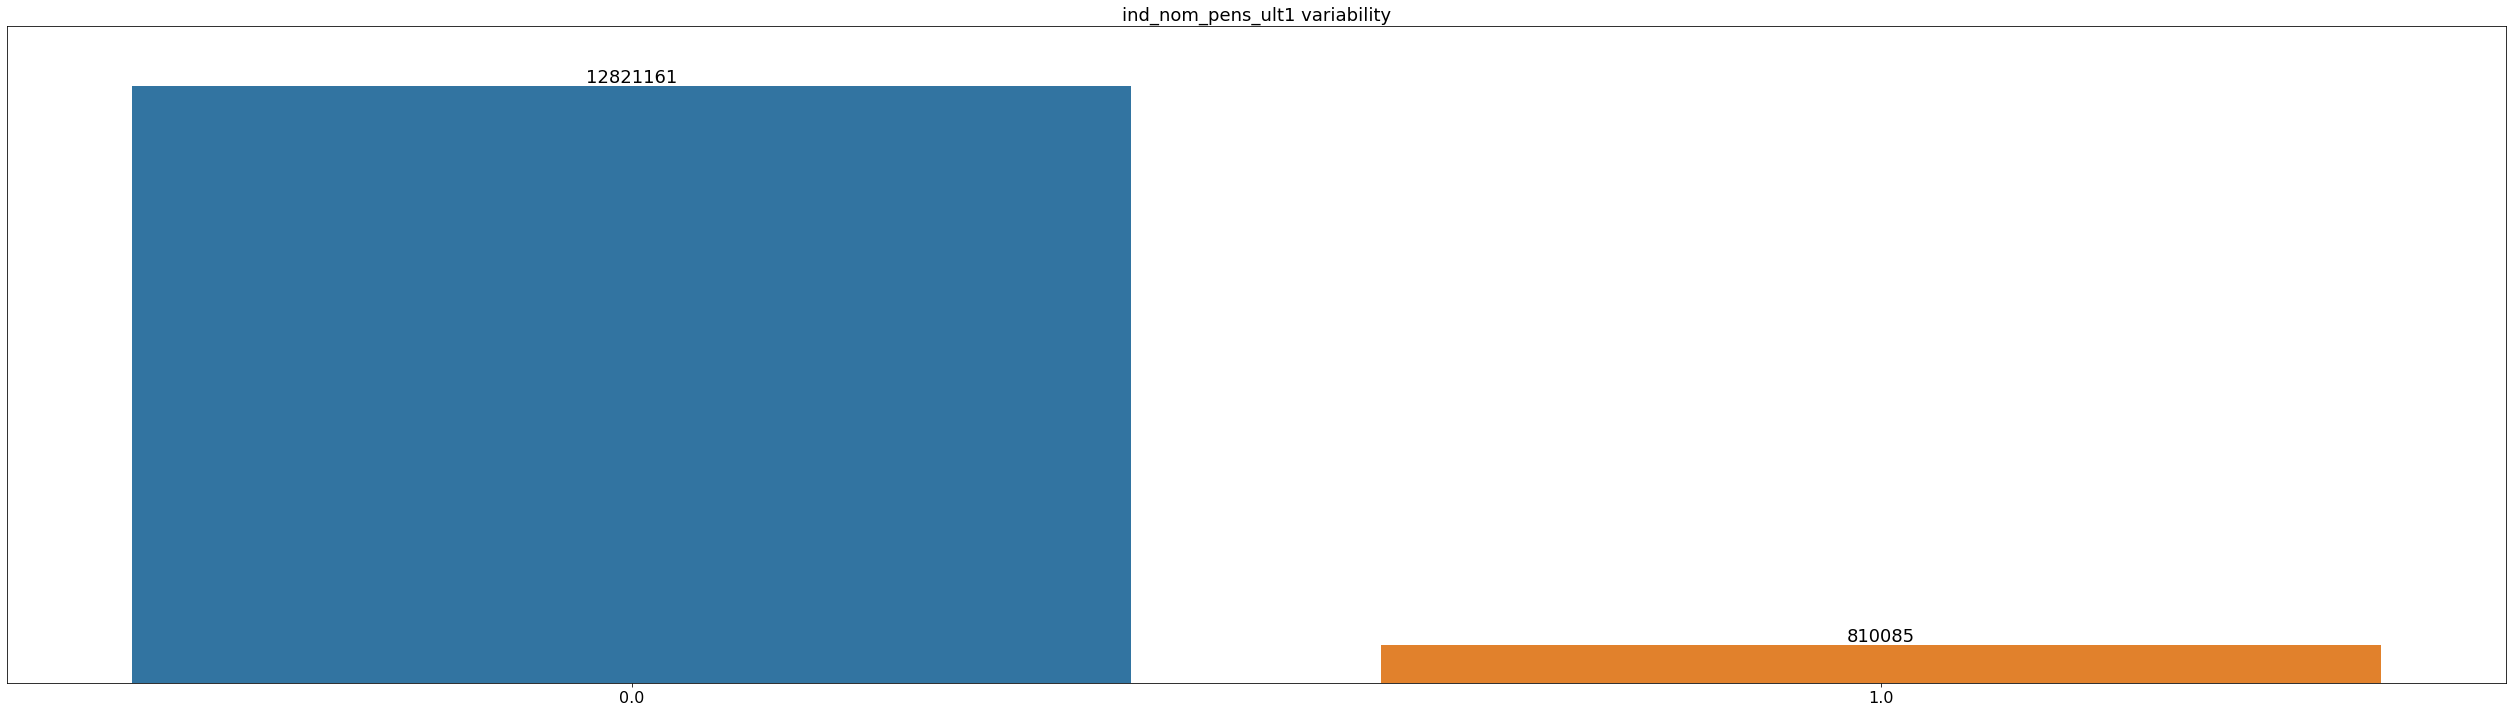

################ ind_recibo_ult1 #################


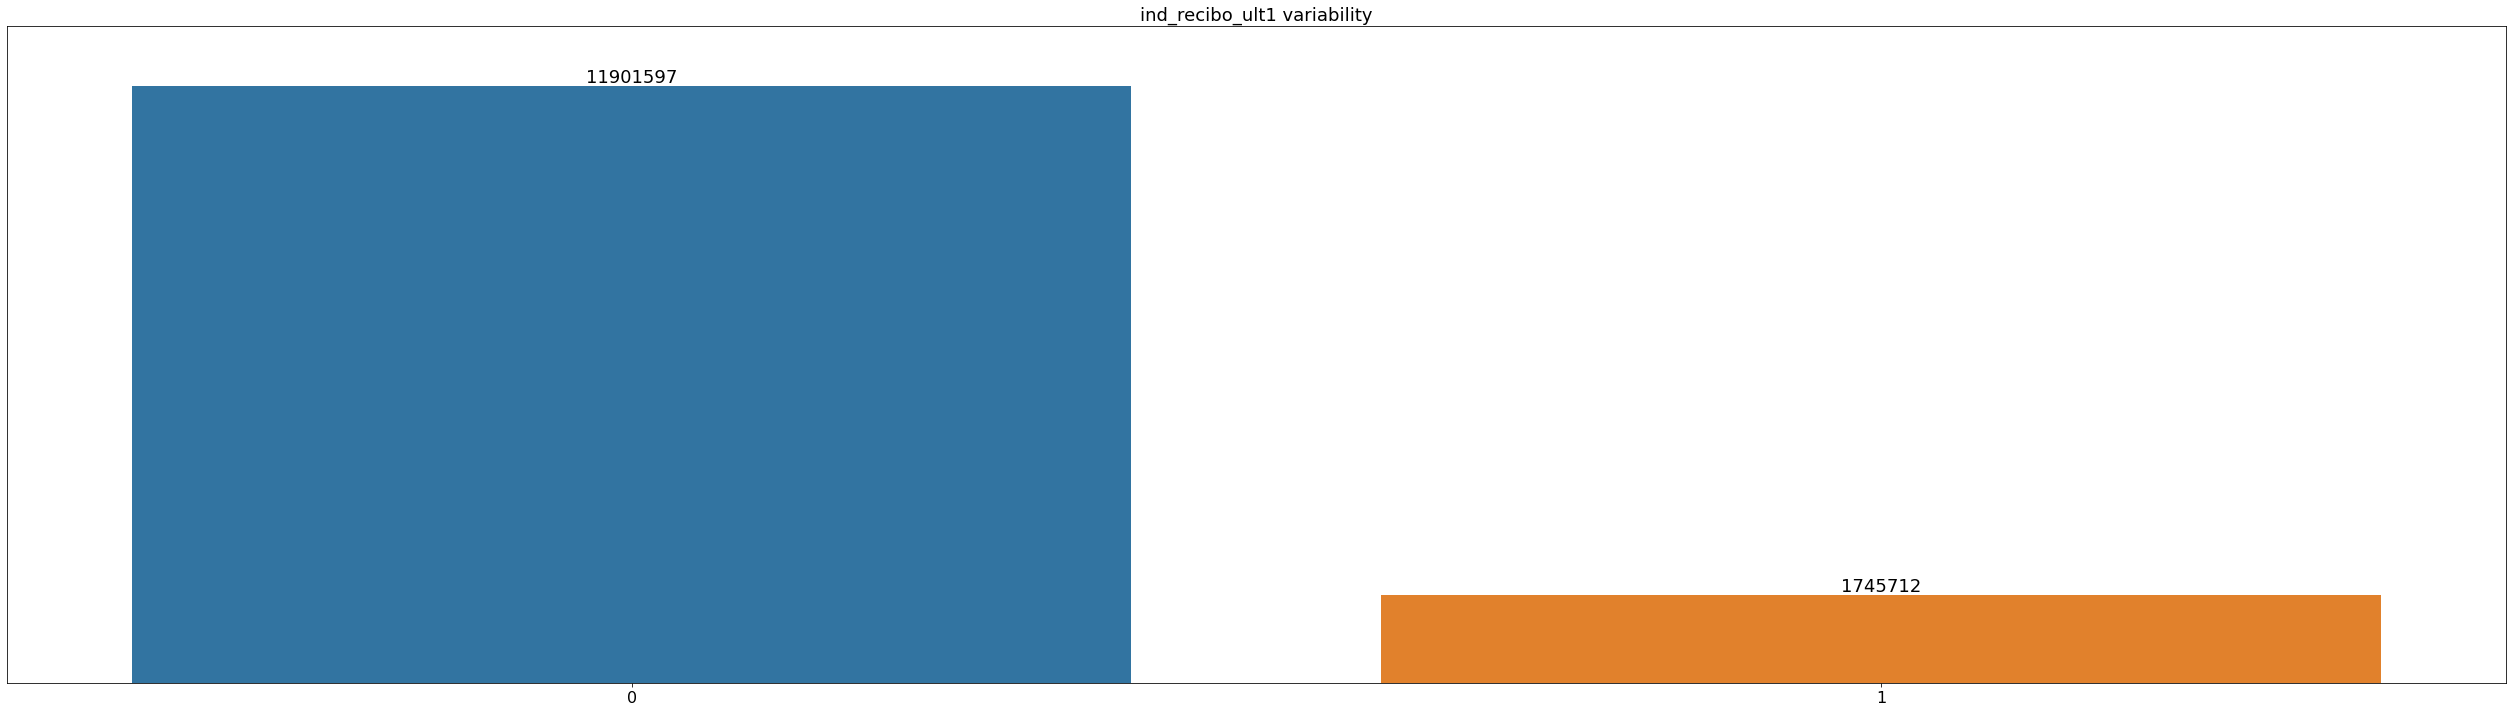

In [5]:
##### Now I check variability of some columns

columns = list(df)
for delete in ['fecha_dato','ncodpers','pais_residencia','fecha_alta','renta']:
    columns.remove(delete)
    
for col in columns:
    print(f' {col} '.center(50,'#'))
    countplot(col, values = True)

# Data Cleaning

In [6]:
##### Filtered by only currently active clients and from Spain
# I also filtered to obtain clients with information of whole 17 months (1 year and 4 months because 18th month
# is the one I'll try to predict) from users
# Number of persons ≠ number of transactions!

df = df.query('ind_actividad_cliente == 1')
df = df.query('pais_residencia == "ES"')
info_17 = df.ncodpers.value_counts()[df.ncodpers.value_counts()==17].index
df = df[df['ncodpers'].isin(info_17)].reset_index(drop = True)
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050617,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050623,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,49.0,ZAMORA,1.0,113538.81,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050626,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,8.0,BARCELONA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050610,N,ES,V,24,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,37.0,SALAMANCA,1.0,68318.46,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129065,2016-05-28,1166741,N,ES,H,22,2013-08-14,0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,47.0,VALLADOLID,1.0,40134.90,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5129066,2016-05-28,1166759,N,ES,H,22,2013-08-14,0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,46.0,VALENCIA,1.0,161098.71,03 - UNIVERSITARIO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5129067,2016-05-28,1166761,N,ES,H,23,2013-08-14,0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5129068,2016-05-28,1166778,N,ES,V,23,2013-08-14,0,33,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
##### Check % of NaNs of each column of the sataset

for col in df.columns:
    print(col, '=','{:.2%}'.format(df[col].isna().sum() / df.shape[0]))

fecha_dato = 0.00%
ncodpers = 0.00%
ind_empleado = 0.00%
pais_residencia = 0.00%
sexo = 0.00%
age = 0.00%
fecha_alta = 0.00%
ind_nuevo = 0.00%
antiguedad = 0.00%
indrel = 0.00%
ult_fec_cli_1t = 100.00%
indrel_1mes = 0.00%
tiprel_1mes = 0.00%
indresi = 0.00%
indext = 0.00%
conyuemp = 99.97%
canal_entrada = 0.00%
indfall = 0.00%
tipodom = 0.00%
cod_prov = 0.00%
nomprov = 0.00%
ind_actividad_cliente = 0.00%
renta = 14.77%
segmento = 0.00%
ind_ahor_fin_ult1 = 0.00%
ind_aval_fin_ult1 = 0.00%
ind_cco_fin_ult1 = 0.00%
ind_cder_fin_ult1 = 0.00%
ind_cno_fin_ult1 = 0.00%
ind_ctju_fin_ult1 = 0.00%
ind_ctma_fin_ult1 = 0.00%
ind_ctop_fin_ult1 = 0.00%
ind_ctpp_fin_ult1 = 0.00%
ind_deco_fin_ult1 = 0.00%
ind_deme_fin_ult1 = 0.00%
ind_dela_fin_ult1 = 0.00%
ind_ecue_fin_ult1 = 0.00%
ind_fond_fin_ult1 = 0.00%
ind_hip_fin_ult1 = 0.00%
ind_plan_fin_ult1 = 0.00%
ind_pres_fin_ult1 = 0.00%
ind_reca_fin_ult1 = 0.00%
ind_tjcr_fin_ult1 = 0.00%
ind_valo_fin_ult1 = 0.00%
ind_viv_fin_ult1 = 0.00%
ind_nomina_ult1 = 

In [8]:
##### Creation of two variables date-time related
# Customers are more likely to buy products at certain months of the year (seasonality)

df['fecha_dato'] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df['fecha_alta'] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")

df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["year_month"] = df["fecha_dato"].apply(lambda x: str(x.year) + '_' + str(x.month))

In [9]:
##### Two columns has a big number of NaNs that will cause NaNs-imputation problems so I delete them

print('Before:',df.shape)
for col in ['ult_fec_cli_1t','conyuemp']:
    del df[col]
print('After:',df.shape)

Before: (5129070, 50)
After: (5129070, 48)


In [10]:
##### Then I delete rows where sexo, canal_entrada, segmento or nomprov values are NaN

print('Before:',df.shape)
for col in ['sexo','canal_entrada','segmento','nomprov']:
    df.dropna(axis = 0, subset = [col], inplace = True)
    
df.reset_index(drop = True, inplace = True)
print('After:',df.shape)

Before: (5129070, 48)
After: (5128898, 48)


In [11]:
##### I delete some columns that don't seem relevant to the model

print('Before:',df.shape)
features_deleted = ["cod_prov",'ind_actividad_cliente',"indrel_1mes",'indresi',"tipodom","ind_empleado",
                    "pais_residencia","indrel","indext","indfall","ind_nuevo"]

df.drop(features_deleted, axis = "columns", inplace = True)
print('After:',df.shape)

Before: (5128898, 48)
After: (5128898, 37)


In [12]:
##### I also delete the products that nobody buys

print('Before:',df.shape)
features_deleted = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cder_fin_ult1','ind_ctju_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
                    'ind_pres_fin_ult1','ind_viv_fin_ult1']

df.drop(features_deleted, axis = "columns", inplace = True)
print('After:',df.shape)

Before: (5128898, 37)
After: (5128898, 29)


In [13]:
##### Replace of missing values using most frequent imputation strategy

print(f'Nº of missing values before replacement: {df.isna().sum().sum()}')

col_imp = [col for col in df.columns if df[col].isna().sum() != 0]
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
for col in col_imp:
    df[col] = imputer.fit_transform(df[[col]])

print(f'Nº of missing values after replacement: {df.isna().sum().sum()}')

Nº of missing values before replacement: 757689
Nº of missing values after replacement: 0


In [14]:
##### Due to imputation strategy, I reapply previous filter to prevent unexpected values 

info_17 = df.ncodpers.value_counts()[df.ncodpers.value_counts()==17].index
df = df[df['ncodpers'].isin(info_17)].reset_index(drop = True)
df

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,segmento,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,year_month
0,2015-01-28,1050614,V,23,2012-08-10,35,A,KHE,ZARAGOZA,451931.22,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,2015_1
1,2015-01-28,1050617,H,23,2012-08-10,35,A,KHE,ZARAGOZA,113316.66,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,2015_1
2,2015-01-28,1050623,H,23,2012-08-10,35,A,KHE,ZAMORA,113538.81,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,2015_1
3,2015-01-28,1050626,V,23,2012-08-10,35,A,KHE,BARCELONA,451931.22,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,2015_1
4,2015-01-28,1050610,V,24,2012-08-10,35,I,KHE,SALAMANCA,68318.46,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1,2015_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128674,2016-05-28,1166741,H,22,2013-08-14,33,A,KHE,VALLADOLID,40134.90,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,5,2016_5
5128675,2016-05-28,1166759,H,22,2013-08-14,33,A,KHE,VALENCIA,161098.71,03 - UNIVERSITARIO,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,5,2016_5
5128676,2016-05-28,1166761,H,23,2013-08-14,33,A,KHE,ZARAGOZA,451931.22,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,5,2016_5
5128677,2016-05-28,1166778,V,23,2013-08-14,33,A,KHE,ZARAGOZA,451931.22,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,5,2016_5


In [15]:
##### Change of dtype of numeric columns to int32

int_col = ['age','ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
           'ind_fond_fin_ult1','ind_hip_fin_ult1', 'ind_plan_fin_ult1','ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1','ind_nomina_ult1',
           'ind_nom_pens_ult1','ind_recibo_ult1','antiguedad']

df[int_col] = df[int_col].astype('int32')

In [16]:
##### Filter to get clients without age outliers values

print('Before:',df.shape)
df = df.query('age >= 18 & age <= 100')
print('After:',df.shape)

Before: (5128679, 29)
After: (5048060, 29)


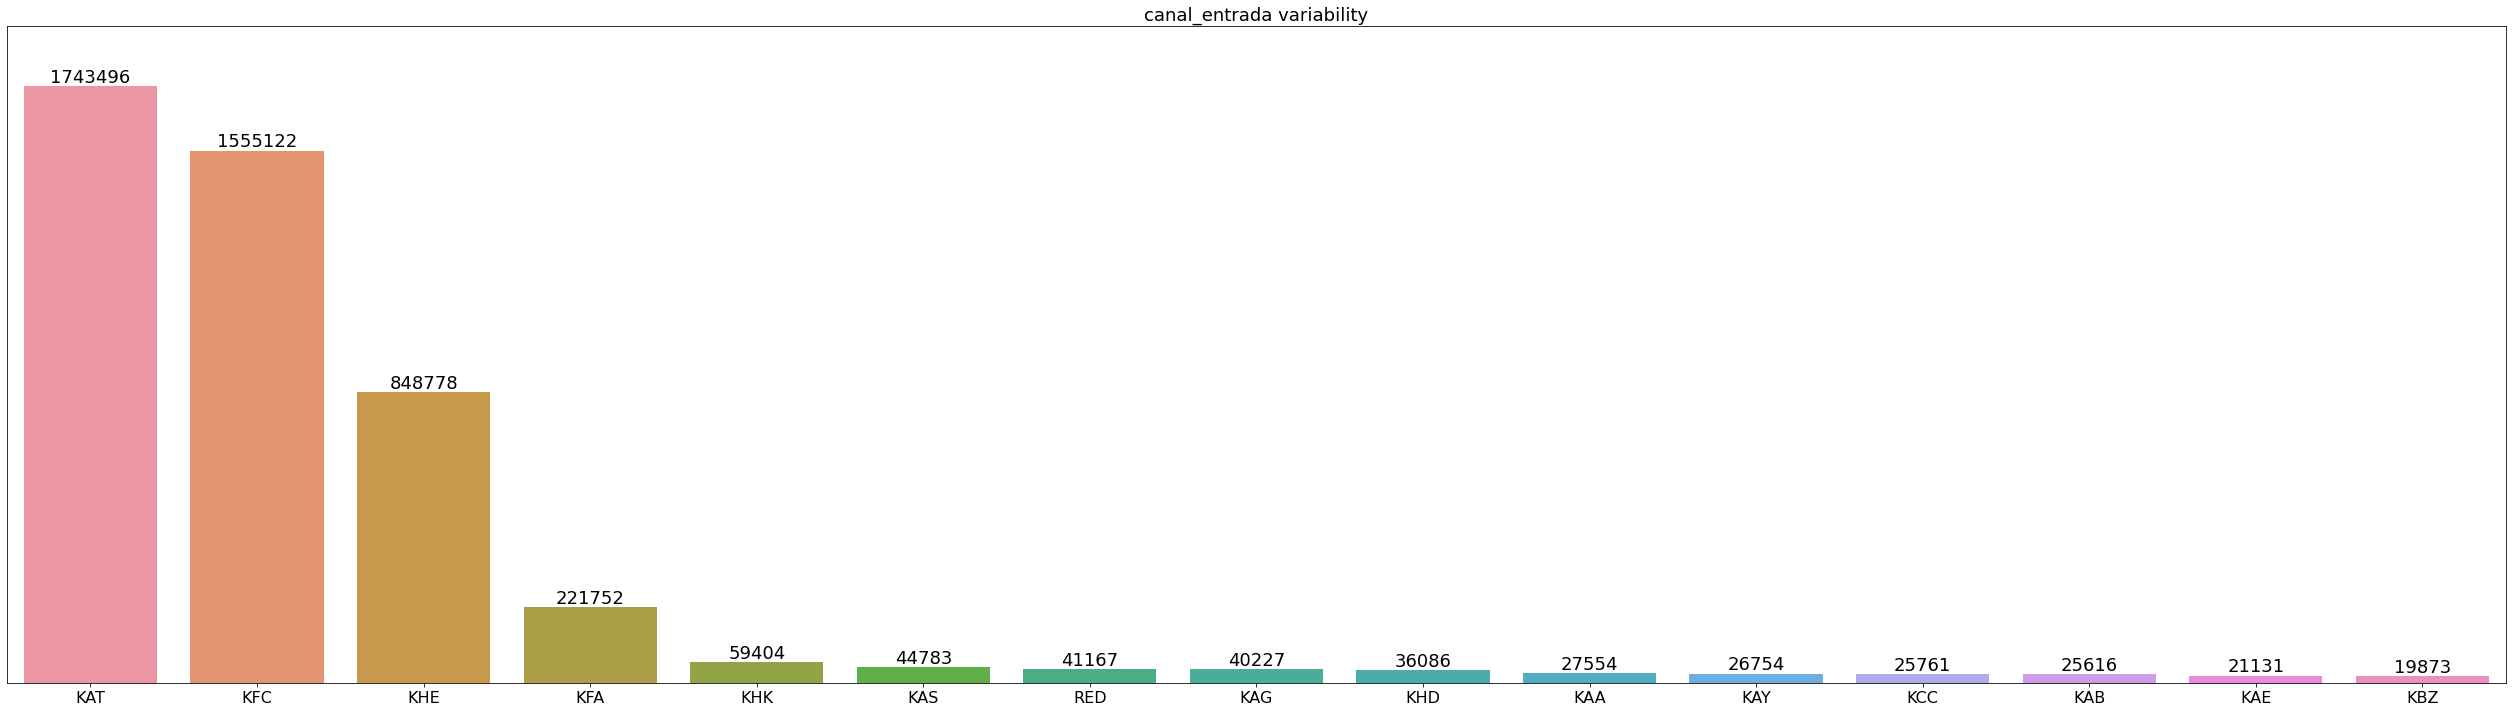

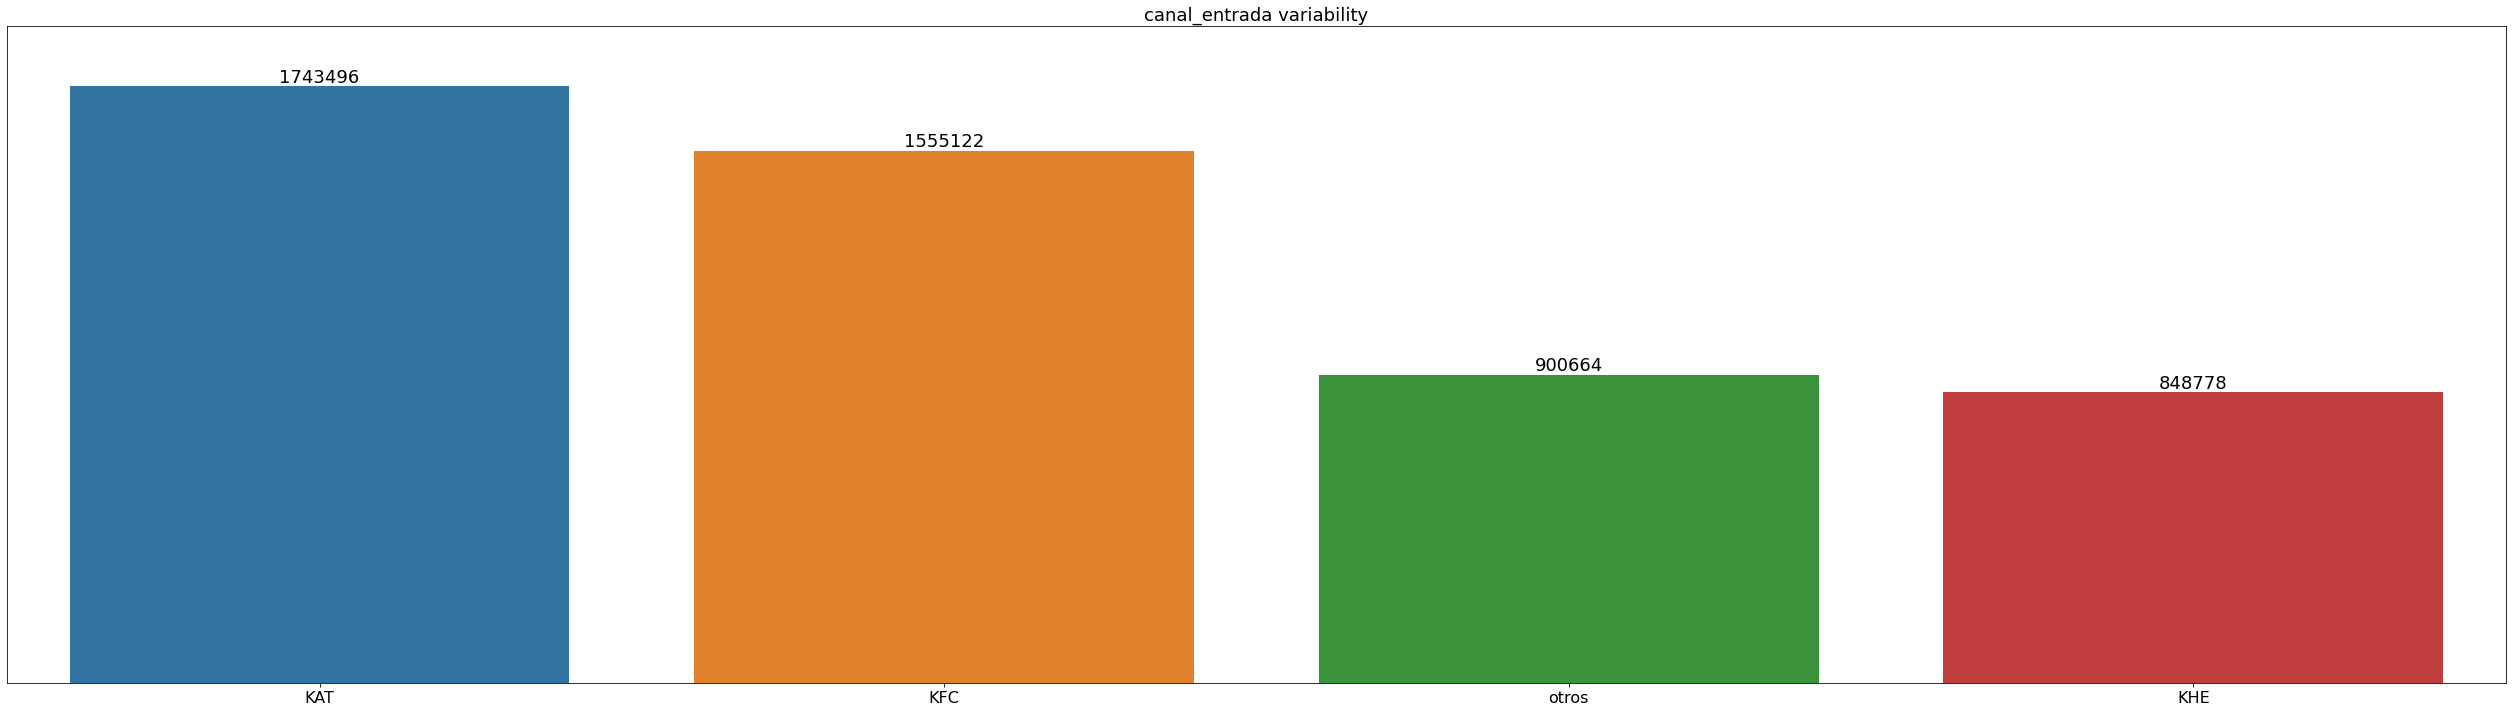

In [17]:
##### Binning of canal_entrada
# Keep only the 3 biggest values and convert the rest to the same unique group 'Others'

countplot('canal_entrada', values = True)

canal_entrada_values = list(df.canal_entrada.unique())
for col in ['KAT','KFC','KHE']:
    canal_entrada_values.remove(col)
df.canal_entrada = df.canal_entrada.replace(canal_entrada_values, 'otros')

countplot('canal_entrada', values = True)

#Exploratory Data Analysis

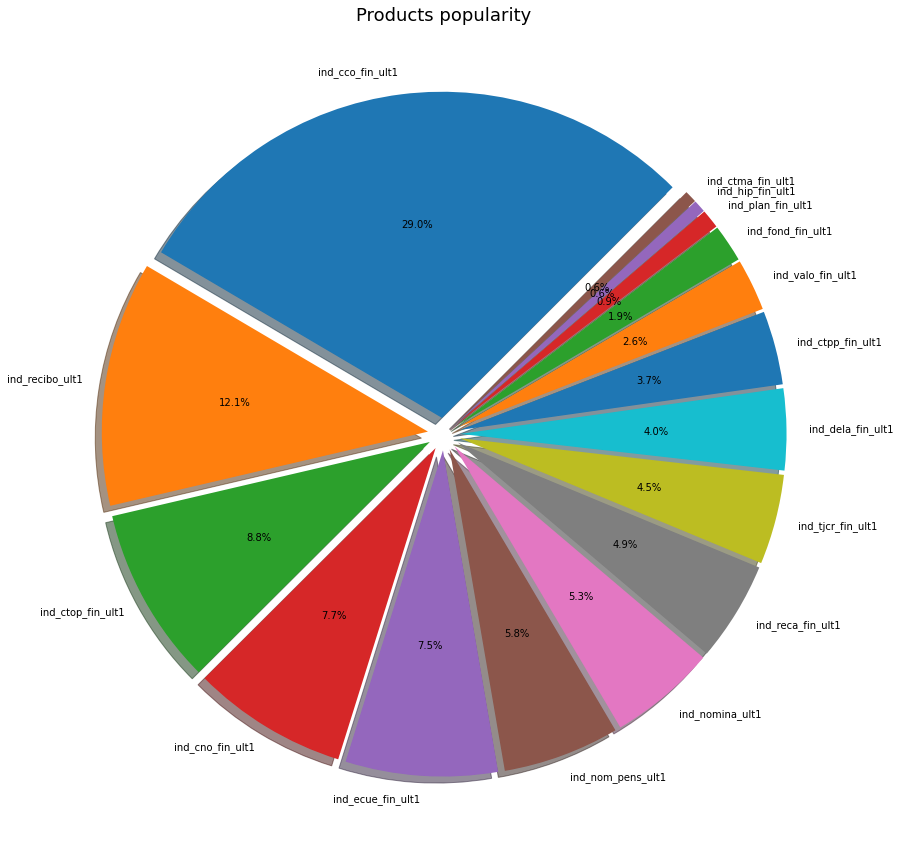

In [18]:
##### Products popularity

products_name = [i for i in list(df) if i.startswith('ind_')]
products_count = dict()
for col in products_name:
    products_count[col] = df[col].sum(axis=0)
products_count = dict(sorted(products_count.items(), key = lambda item: item[1], reverse=True))

plt.figure(figsize=(15, 15))
plt.title('Products popularity', fontsize = 18)
plt.pie(products_count.values(), labels = products_count.keys(), explode = [0.05 for i in range(len(products_count))],
        autopct='%.1f%%', shadow = True, labeldistance = 1.07, startangle = 45, rotatelabels = False)
plt.show()

## The top 5 products are:

- `Current Accounts` : 29%
- `Direct Debits`: 12.1%
- `Particular Accounts`: 8.8%
- `Payroll Accounts`: 7.7%
- `E-Accounts`: 7.5%

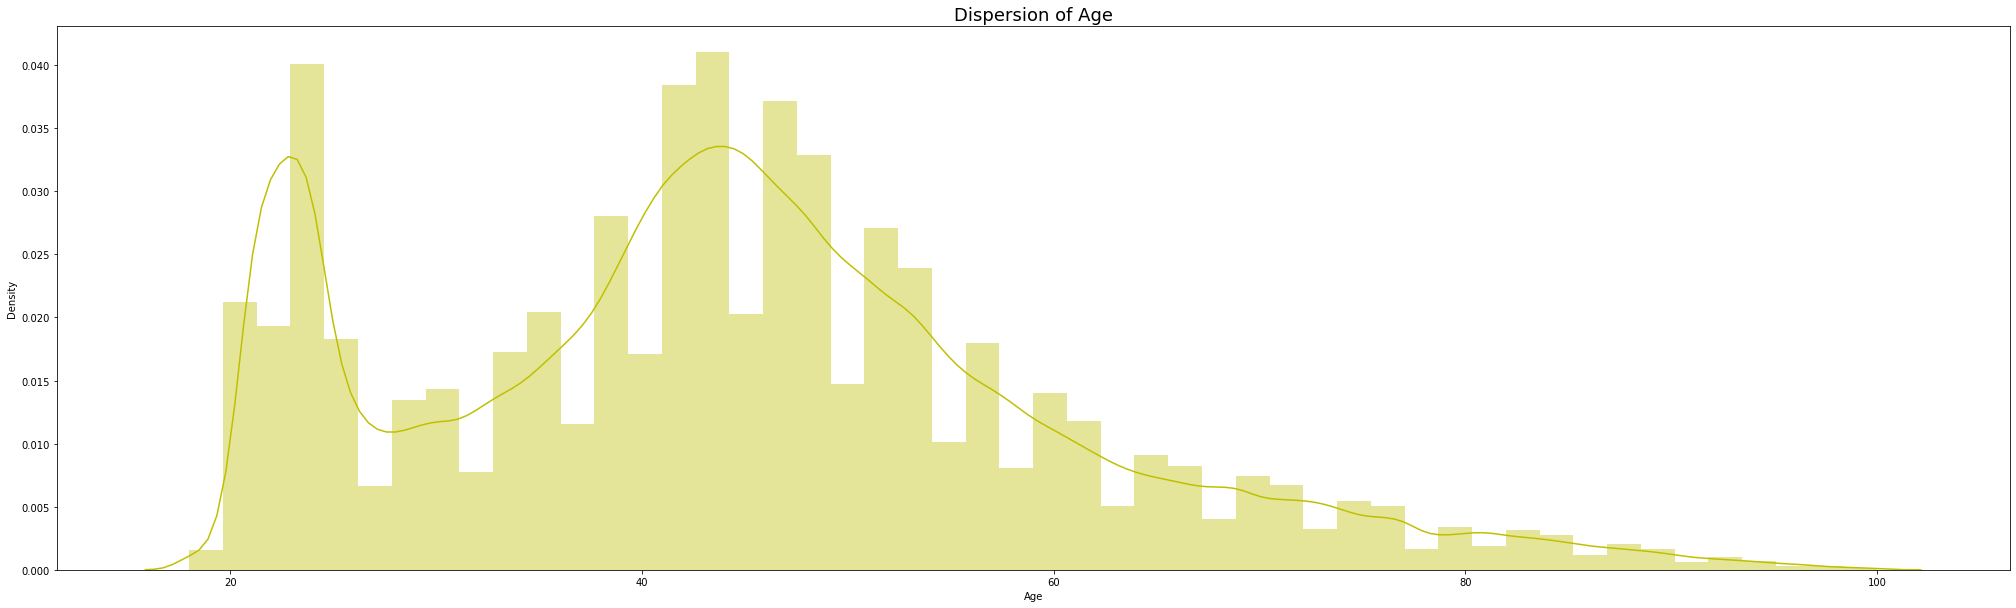

In [19]:
##### Age histogram to show client profile

plt.figure(figsize=(35, 10))
sns.distplot(df.age, axlabel = "Age", color = "y")
plt.title("Dispersion of Age", fontsize = 18)
plt.show()

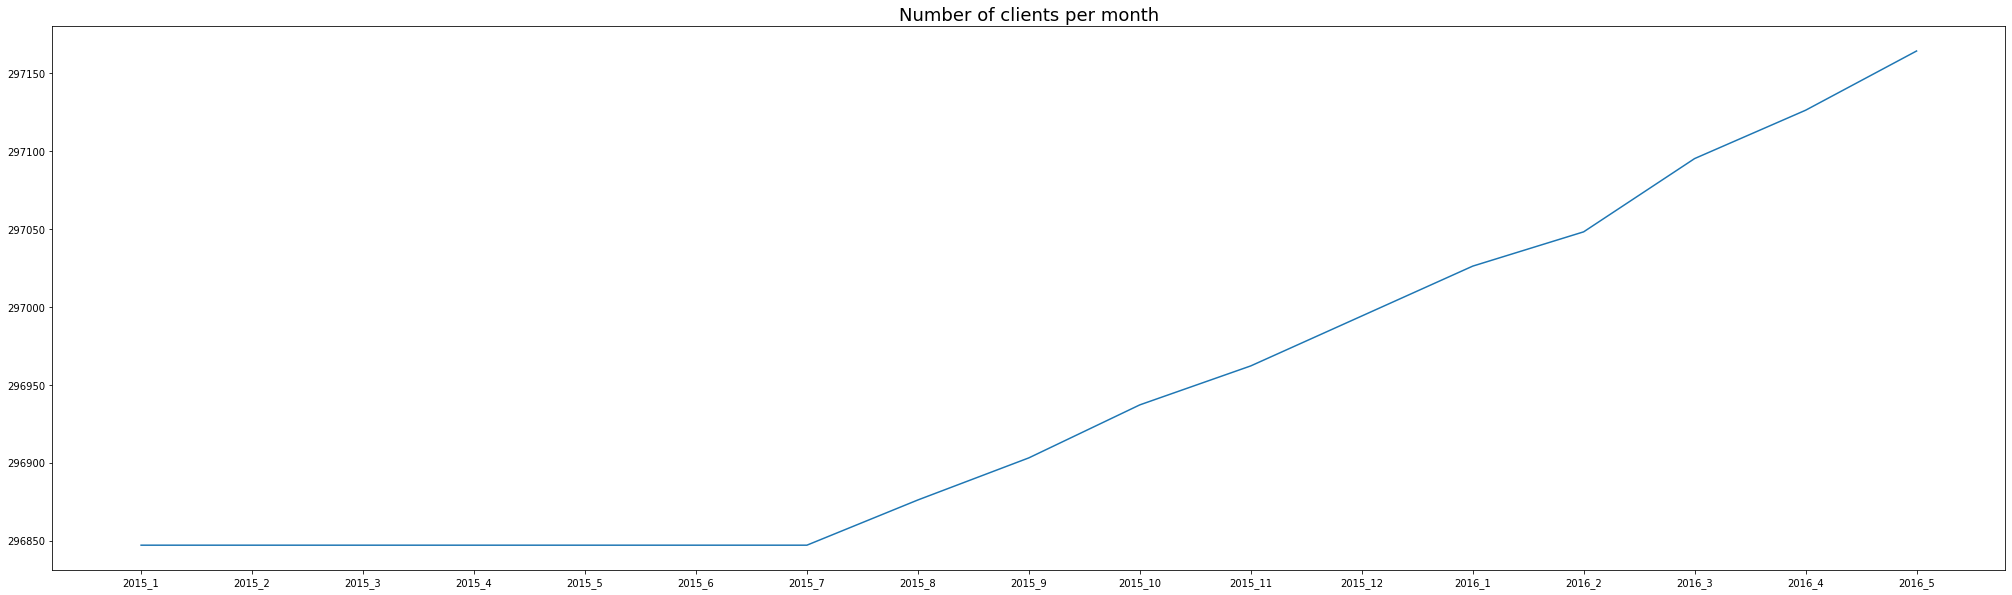

In [20]:
##### Number of clients per month

data = df.groupby(['year_month','ncodpers']).size().reset_index()['year_month'].value_counts()
data_2015_name = [f'2015_{i}' for i in range(1,13)]
data_2015_value = [data.loc[f'2015_{i}'] for i in range(1,13)]
data_2016_name = [f'2016_{i}' for i in range(1,6)]
data_2016_value = [data.loc[f'2016_{i}'] for i in range(1,6)]
data_name = data_2015_name + data_2016_name
data_value = data_2015_value + data_2016_value

plt.figure(figsize=(35, 10))
plot = sns.lineplot(x = data_name, y = data_value, sort = False)
plt.title("Number of clients per month", fontsize = 18)
plt.show()

In [22]:
df.to_pickle('/content/drive/MyDrive/DataGlacier-GroupProject/data_modelling_memred.pkl')
print('Done!')

Done!
